<a href="https://colab.research.google.com/github/samirp92/ADS1/blob/main/EDA_Ele_Power_Consumption_Forecasting_Student_ID_21072112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Forecasting Individual Household Electric Power Consumption*
*(Data loading, Data Preprocessing, Feature Engineering, EDA)*

# Import the required libraries

In [1]:
# Disable warnings in the notebook for maintaining clean output
import warnings
warnings.filterwarnings('ignore')

# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Set the working directory
working_directory = "/content/drive/MyDrive/Final Year Project"

In [4]:
# Load the data from google drive
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/household_power_consumption.txt", sep=';')
df

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254   240.43              4.0            0.0            0.0   
2075255    240.0              4.0            0.0            0.0   
2075256   239.82              3.8            0.0            0.0   
2075257    239.7              3.8            0.0            0.0   
2075258   239.55              3.8            0.0            0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [5]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Observation:-

+ All columns' data types show as "object" except Sub_metering_3 so that needs to be converted to the appropriate data type.

In [6]:
# Check Summary statistics
df.describe(include='all')

Date      Time Global_active_power Global_reactive_power  \
count     2075259   2075259             2075259               2075259   
unique       1442      1440                6534                   896   
top     6/12/2008  17:24:00                   ?                 0.000   
freq         1440      1442               25979                472786   
mean          NaN       NaN                 NaN                   NaN   
std           NaN       NaN                 NaN                   NaN   
min           NaN       NaN                 NaN                   NaN   
25%           NaN       NaN                 NaN                   NaN   
50%           NaN       NaN                 NaN                   NaN   
75%           NaN       NaN                 NaN                   NaN   
max           NaN       NaN                 NaN                   NaN   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
count   2075259          2075259        2075259        2075259    2.049280e+06  
unique     5168              377            153            145             NaN  
top           ?            1.000          0.000          0.000             NaN  
freq      25979           169406        1840611        1408274             NaN  
mean        NaN              NaN            NaN            NaN    6.458447e+00  
std         NaN              NaN            NaN            NaN    8.437154e+00  
min         NaN              NaN            NaN            NaN    0.000000e+00  
25%         NaN              NaN            NaN            NaN    0.000000e+00  
50%         NaN              NaN            NaN            NaN    1.000000e+00  
75%         NaN              NaN            NaN            NaN    1.700000e+01  
max         NaN              NaN            NaN            NaN    3.100000e+01

Observation:-
+ The dataset has missing values represented by '?' in several columns.
+ There are a significant number of these ? entries, for example, Global_active_power has 25,979 instances of ?.

# Data Preprocessing

In [7]:
# Replace '?' with NaN values
df.replace('?', np.nan, inplace=True)

In [8]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [9]:
# Check Summary statistics
df.describe(include='all')

Date      Time  Global_active_power  Global_reactive_power  \
count     2075259   2075259         2.049280e+06           2.049280e+06   
unique       1442      1440                  NaN                    NaN   
top     6/12/2008  17:24:00                  NaN                    NaN   
freq         1440      1442                  NaN                    NaN   
mean          NaN       NaN         1.091615e+00           1.237145e-01   
std           NaN       NaN         1.057294e+00           1.127220e-01   
min           NaN       NaN         7.600000e-02           0.000000e+00   
25%           NaN       NaN         3.080000e-01           4.800000e-02   
50%           NaN       NaN         6.020000e-01           1.000000e-01   
75%           NaN       NaN         1.528000e+00           1.940000e-01   
max           NaN       NaN         1.112200e+01           1.390000e+00   

             Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
count   2.049280e+06      2.049280e+06    2.049280e+06    2.049280e+06   
unique           NaN               NaN             NaN             NaN   
top              NaN               NaN             NaN             NaN   
freq             NaN               NaN             NaN             NaN   
mean    2.408399e+02      4.627759e+00    1.121923e+00    1.298520e+00   
std     3.239987e+00      4.444396e+00    6.153031e+00    5.822026e+00   
min     2.232000e+02      2.000000e-01    0.000000e+00    0.000000e+00   
25%     2.389900e+02      1.400000e+00    0.000000e+00    0.000000e+00   
50%     2.410100e+02      2.600000e+00    0.000000e+00    0.000000e+00   
75%     2.428900e+02      6.400000e+00    0.000000e+00    1.000000e+00   
max     2.541500e+02      4.840000e+01    8.800000e+01    8.000000e+01   

        Sub_metering_3  
count     2.049280e+06  
unique             NaN  
top                NaN  
freq               NaN  
mean      6.458447e+00  
std       8.437154e+00  
min       0.000000e+00  
25%       0.000000e+00  
50%       1.000000e+00  
75%       1.700000e+01  
max       3.100000e+01

In [10]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [11]:
# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Data Imputation

In [12]:
# Check Null Values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Observation:-
+ There are total 25979 rows which are Null (nearly 1.25% of the total rows)
+ For this problem, I will use either forward or backward fill because The records are taken every minute.

In [13]:
# Fill NaN values using the mean for each column
df.fillna(df.mean(), inplace=True)

In [14]:
# Check Summary statistics
df.describe(include='all')

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

# Data Visualization

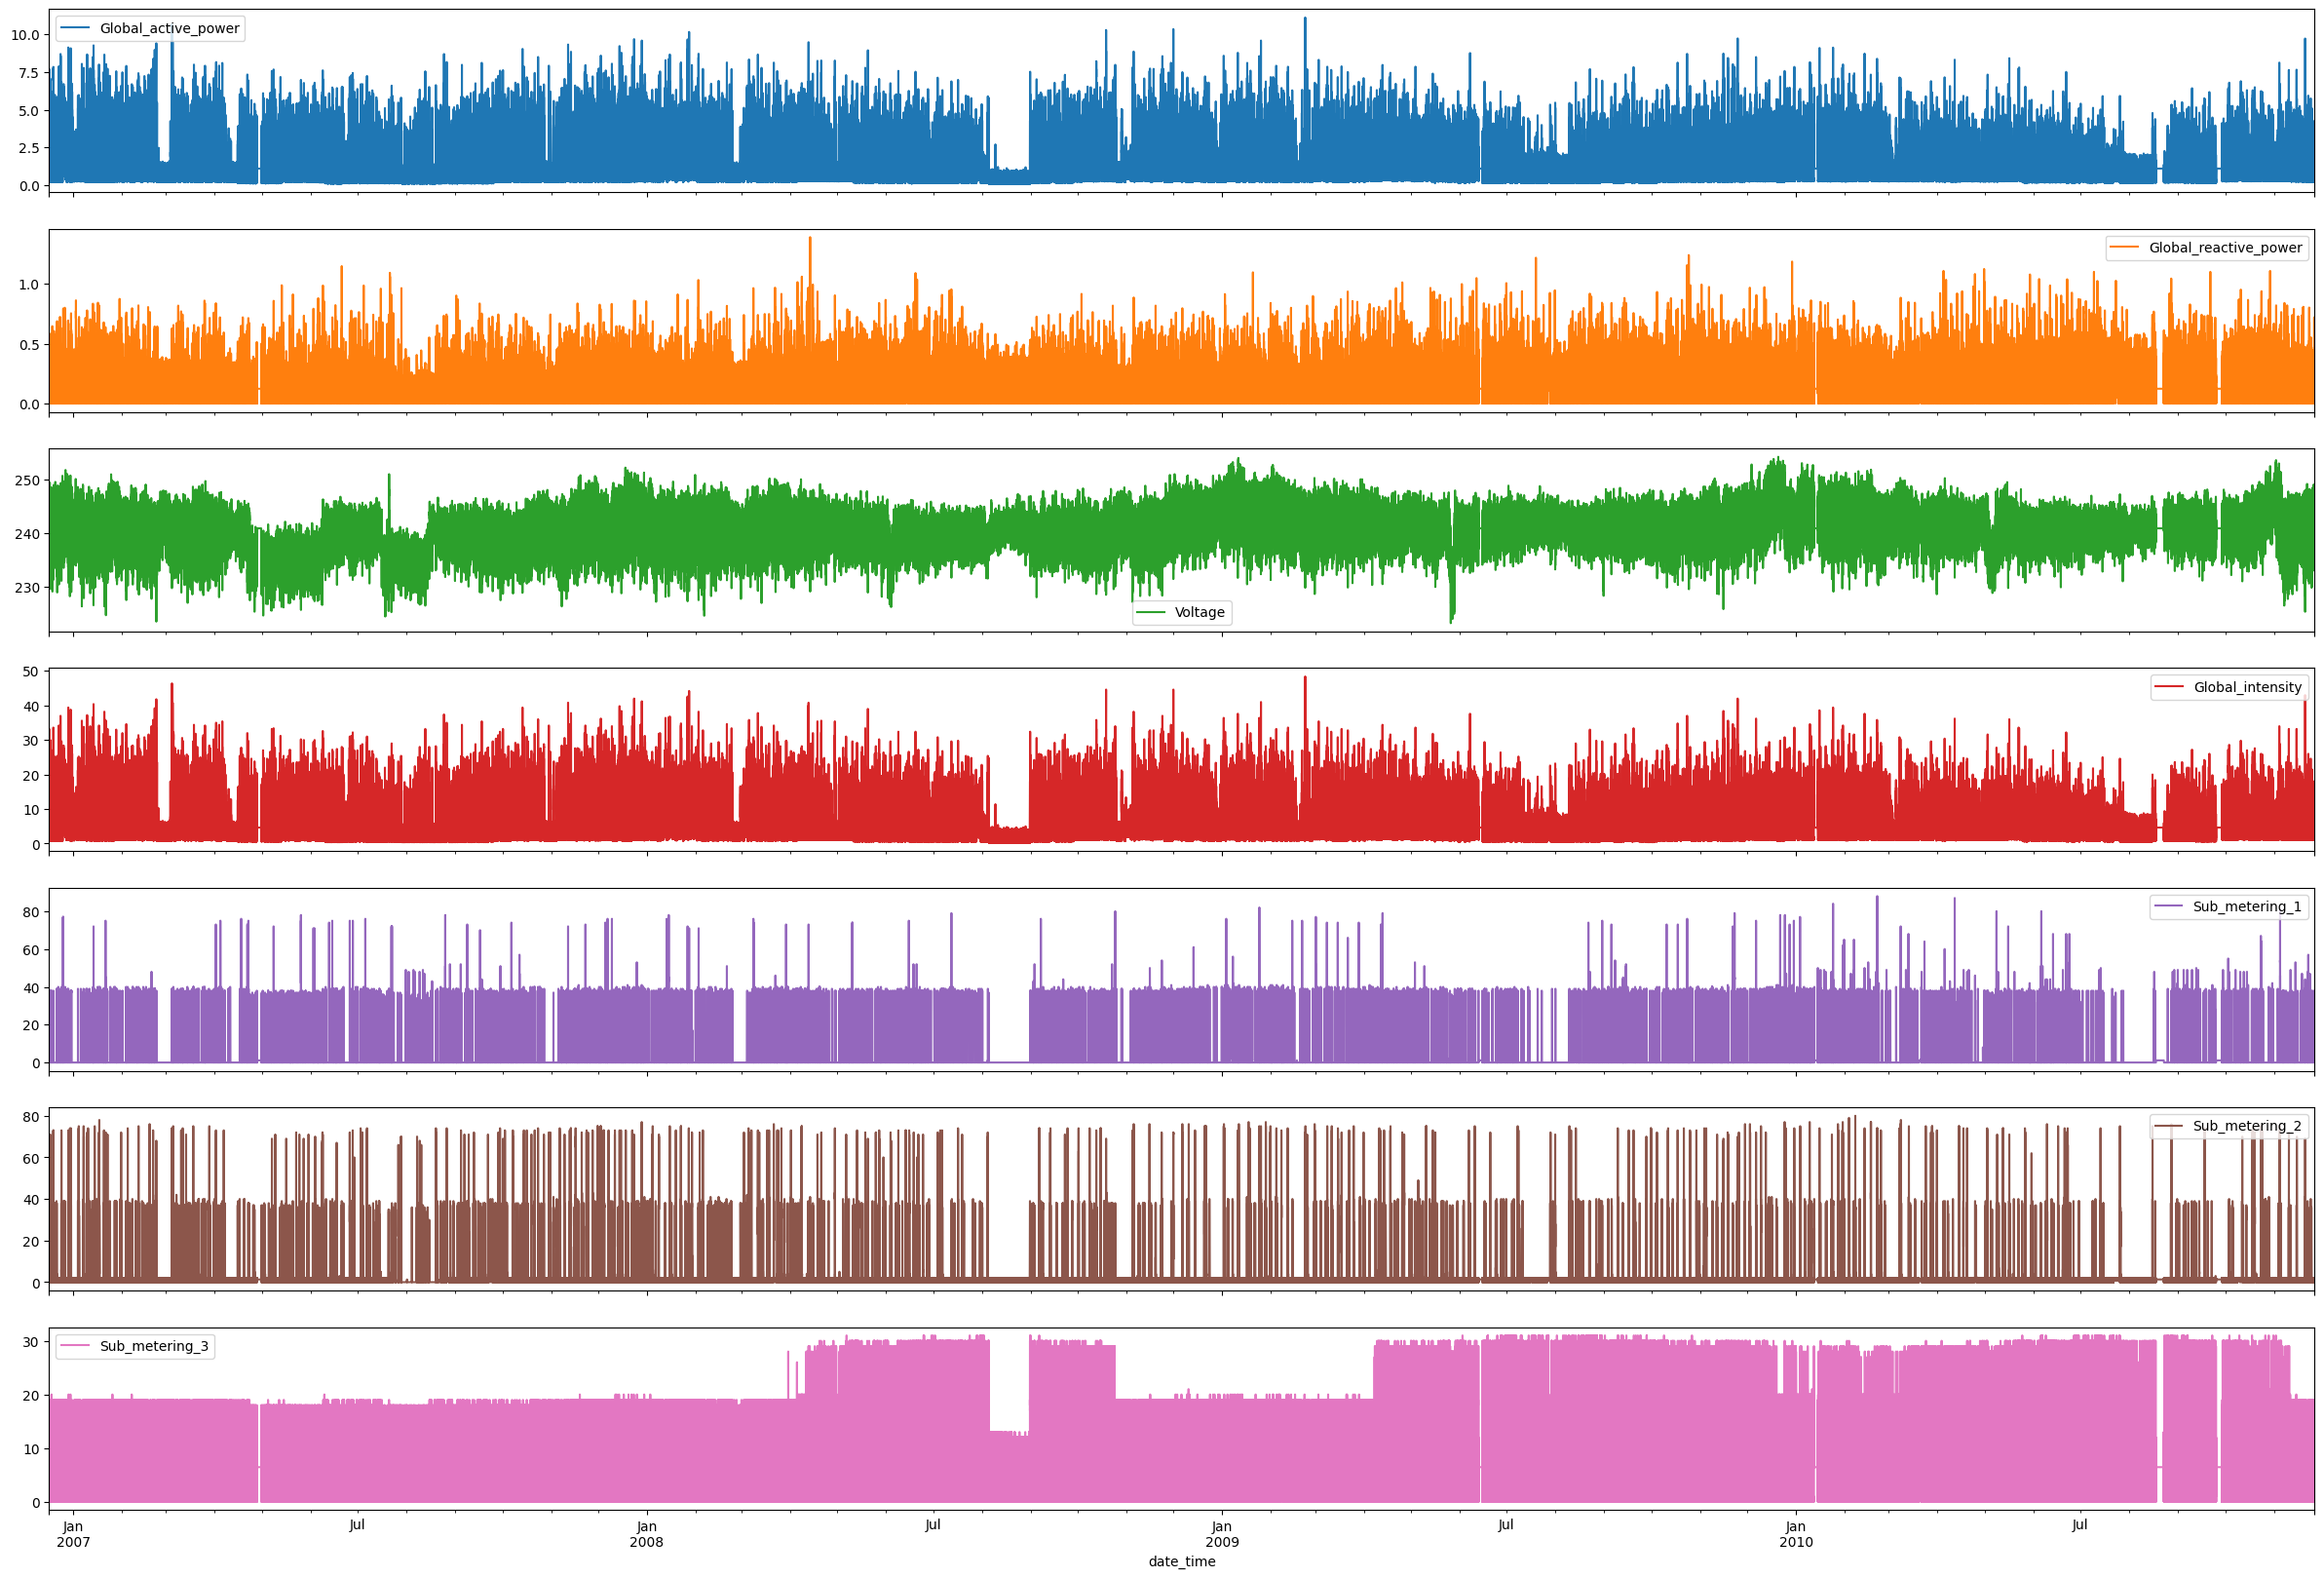

In [15]:
# Visualize the data
df.plot(subplots=True, figsize=(30,20))
plt.show()

Observation:-

Global Active Power:
+ It is observed that there is an yearly seasonal pattern in this feature with some spikes.

Global Reactive Power:
+ It is observed that there is a yearly seasonal pattern in this feature (with some spikes) but showing less variation as compared Global_active_power.

Voltage:
+ It is observed that there is a strong repeating seasonal pattern in this feature across every year.
At the beginning of every year it fluctuates a lot between 250 and 260 volts, but in between (near July) in every year it kinds of reduces and then spikes again as the year ends.

Global Intensity:
+ It is observed that the values do spike towards the beginning of each year but then go somewhat constant and then increase again during the end of each year.

Sub_metering_1:
+ This feature represents the kitchen area of the house. It is observed that values for this feature are strongly constant throughout every year with some spikes representing heavy usage of the kitchen during those time stamps.

Sub_metering_2:
+ This feature represents the laundry area of the house. It is observed that values for this feature are in periodic intervals throughout every year with some spikes representing heavy usage of laundry area during those time stamps.

Sub_metering_3:
+ This feature represents the electric water heater and the air conditioner in the house.
+ For the year 2007: It is observed that the values almost remain constant throughout the year. electric water heater and air conditioner are equivalently used in their respective seasons.
For the year 2008: It is observed that the temperature increased as compared to previous. Hence, both devices were used extensively in their respective seasons.
+ For the Year 2009 and 2010: It is observed that from the month of May-2009 to November-2010 temperature became pretty ferocious (during both summer and winter) and both the appliances were used extensively.

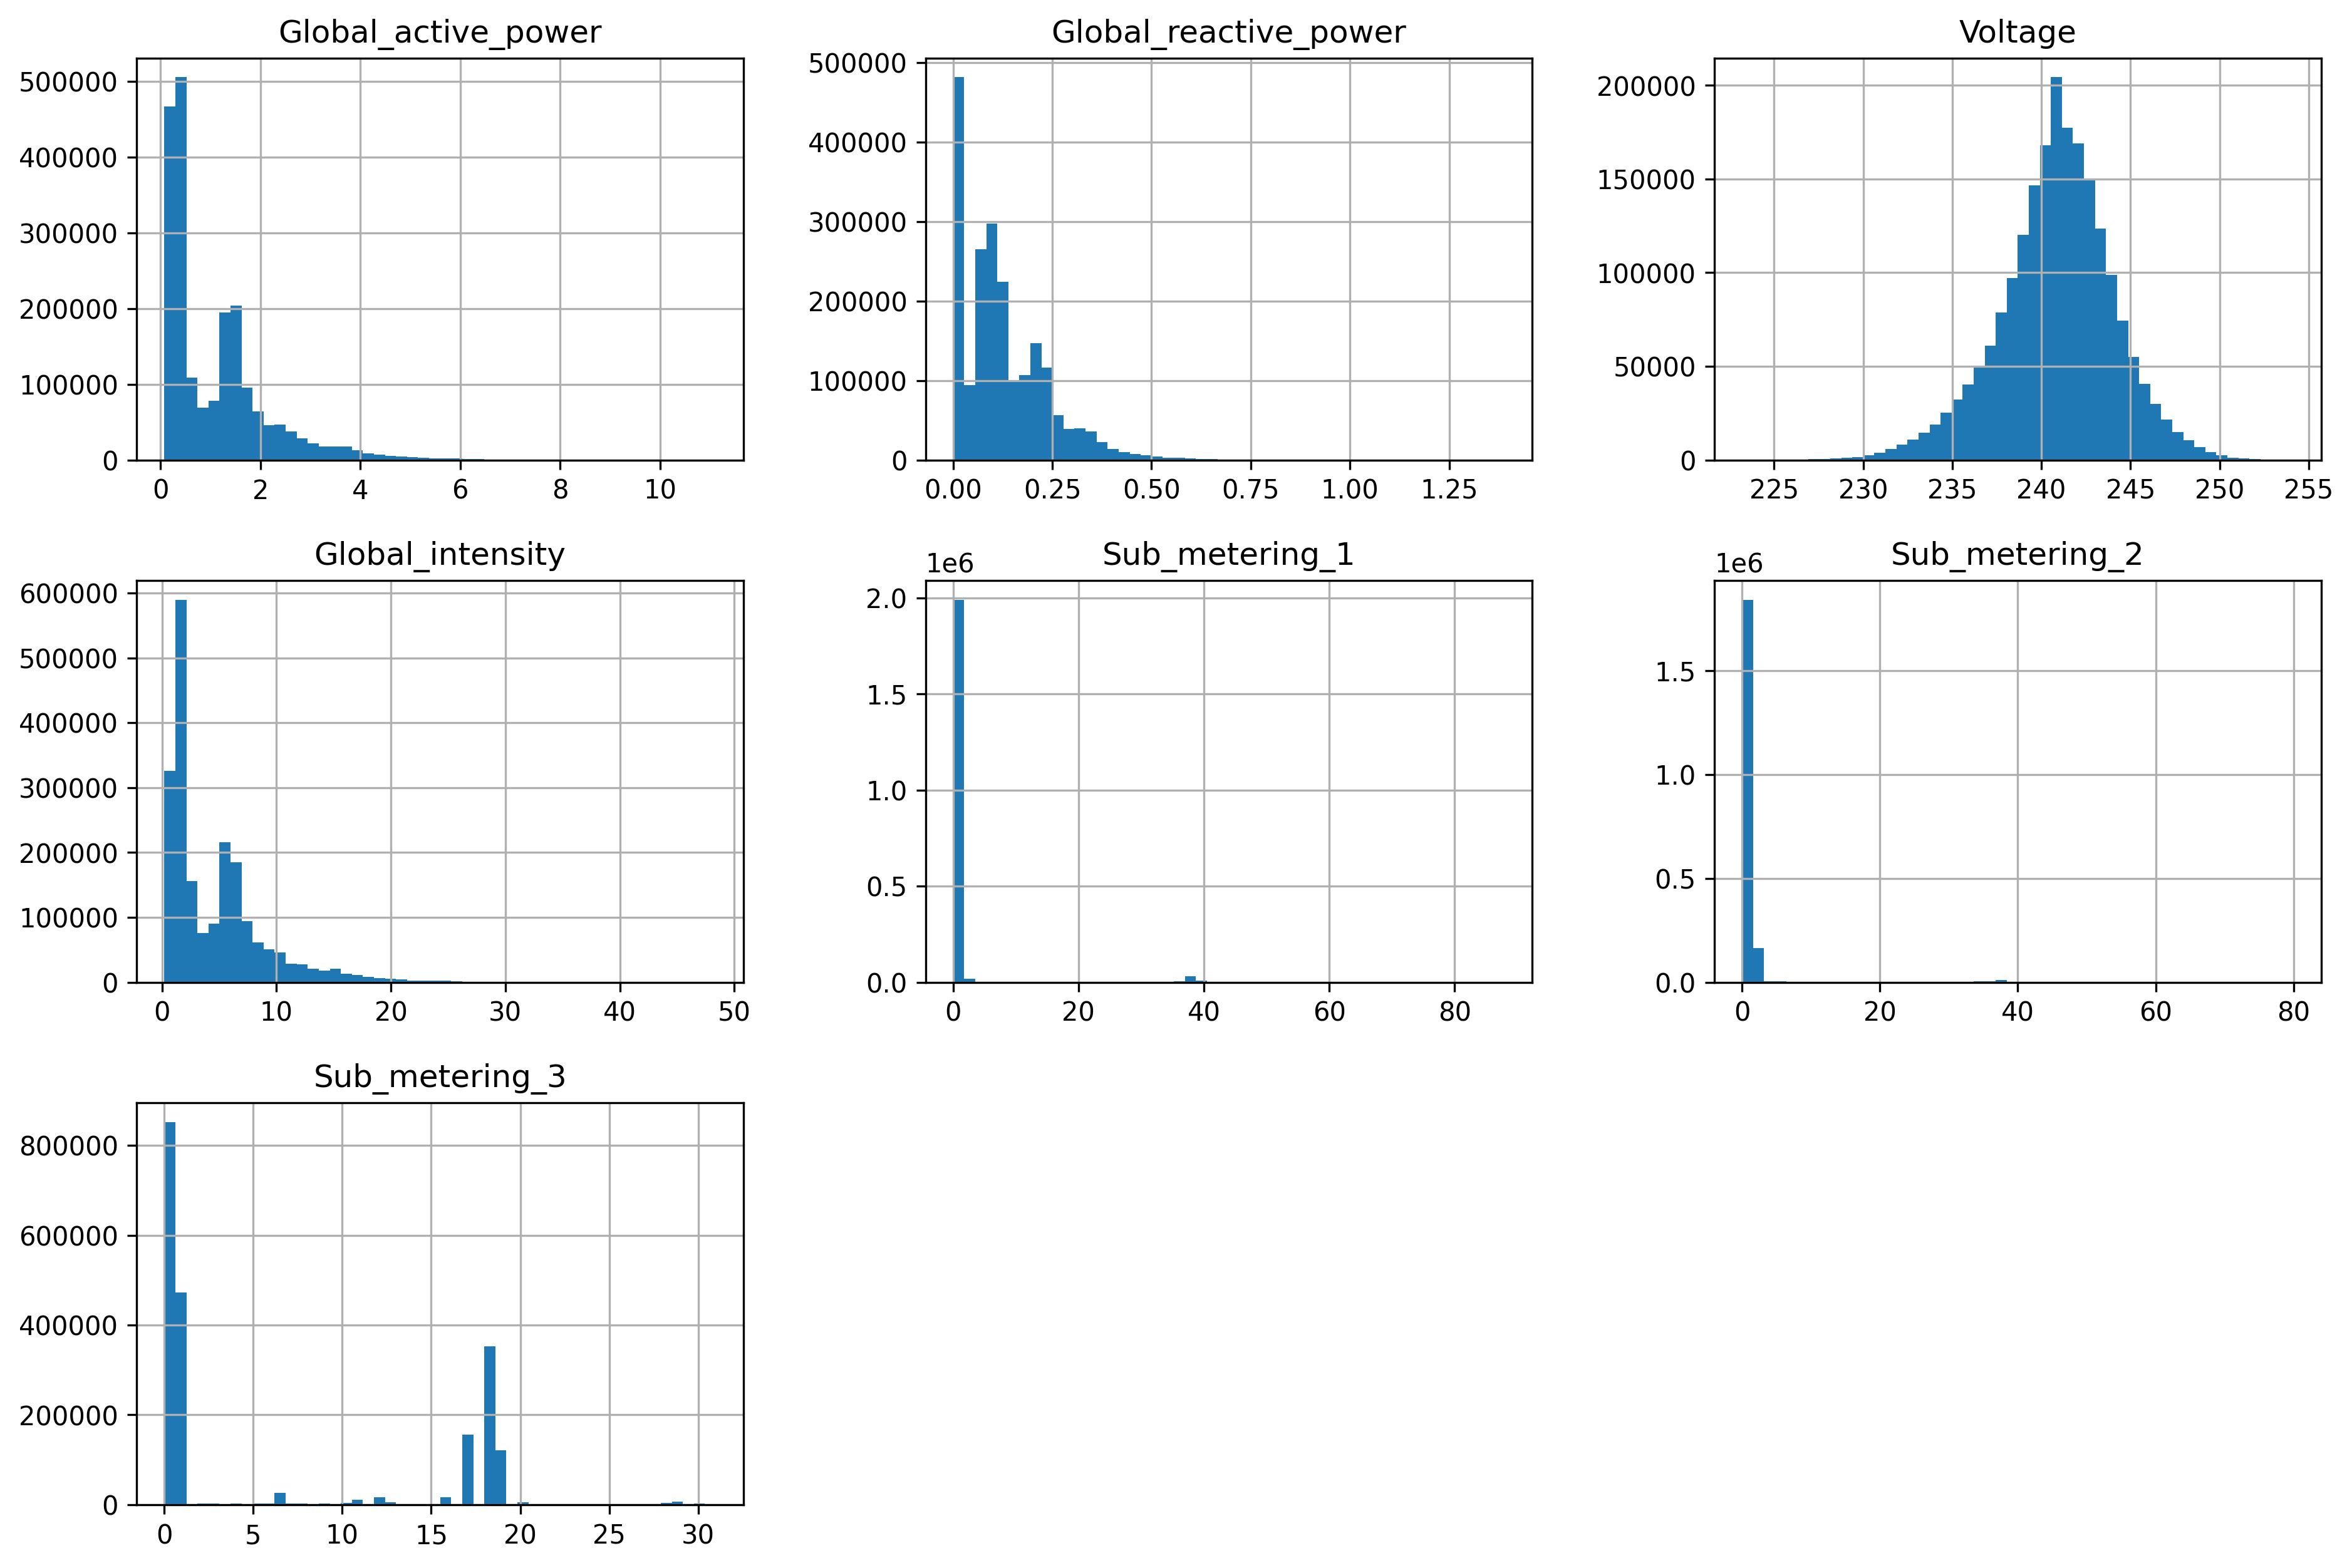

In [16]:
# See the distribution of data
df.hist(figsize=(15, 10), bins=50)
plt.gcf().set_dpi(300)

Observation:-
+ Voltage has close to normal distribution.
+ Global_active_power, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3 and Global_reactive_power have skewed distribution towards low values.

Text(0.5, 1.0, 'Correlation Matrix')

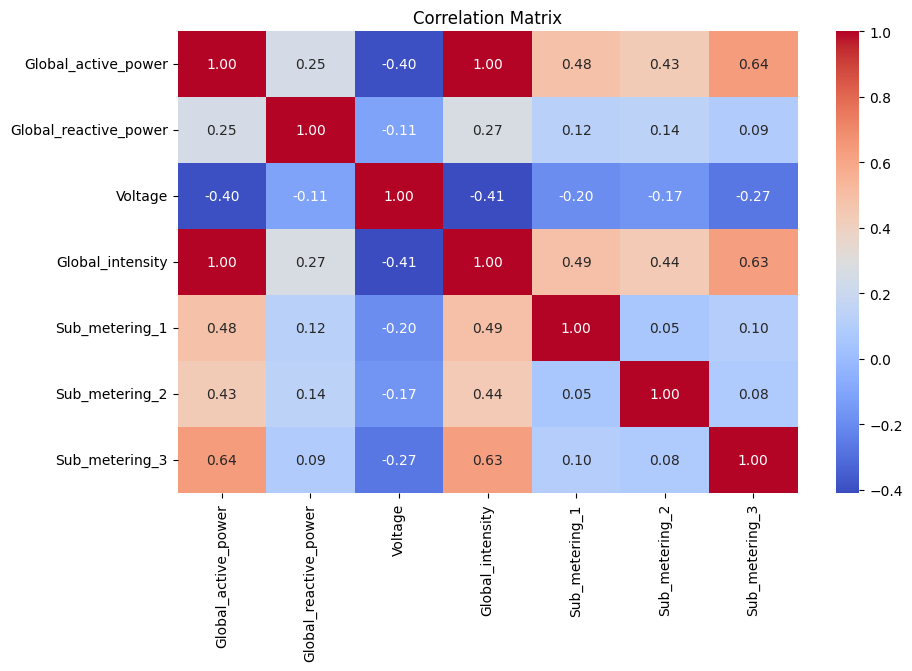

In [17]:
# Plot the heatmap for Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
#plt.gcf().set_dpi(200)

# Feature Engineering

In [18]:
# Create new columns for minute, hour, year, quarter, month, and day
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['day'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

Note:-
+ (Global_active_power*1000/60 - Sub_metering_1 - Sub_metering_2 - Sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3

In [19]:
# Creating new variable for remaining power consumption in watt hour
equation1 = (df['Global_active_power']*1000/60)
equation2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Sub_metering_4'] = equation1 - equation2
df

Global_active_power  Global_reactive_power  Voltage  \
date_time                                                                  
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
date_time                                                               
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  minute  hour  day  week_of_year  \
date_time                                                              
2006-12-16 17:24:00            17.0      24    17   16            50   
2006-12-16 17:25:00            16.0      25    17   16            50   
2006-12-16 17:26:00            17.0      26    17   16            50   
2006-12-16 17:27:00            17.0      27    17   16            50   
2006-12-16 17:28:00            17.0      28    17   16            50   
...                             ...     ...   ...  ...           ...   
2010-11-26 20:58:00             0.0      58    20   26            47   
2010-11-26 20:59:00             0.0      59    20   26            47   
2010-11-26 21:00:00             0.0       0    21   26            47   
2010-11-26 21:01:00             0.0       1    21   26            47   
2010-11-26 21:02:00             0.0       2    21   26            47   

                     day_of_week  month  quarter  year  day_of_year  \
date_time                                                             
2006-12-16 17:24:00            5     12        4  2006          350   
2006-12-16 17:25:00            5     12        4  2006          350   
2006-12-16 17:26:00            5     12        4  2006          350   
2006-12-16 17:27:00            5     12        4  2006          350   
2006-12-16 17:28:00            5     12        4  2006          350   
...                          ...    ...      ...   ...          ...   
2010-11-26 20:58:00            4     11        4  2010          330   
2010-11-26 20:59:00            4     11        4  2010          330   
2010-11-26 21:00:00            4     11        4  2010          330   
2010-11-26 21:01:00            4     11        4  2010          330   
2010-11-26 21:02:00            4     11        4  2010          330   

                     Sub_metering_4  
date_time                            
2006-12-16 17:24:00       52.266667  
2006-12-16 17:25:00       72.333333  
2006-12-16 17:26:00       70.566667  
2006-12-16 17:27:00       71.80

In [20]:
# Make new dataFrame
df1 = df[["Global_active_power", "Global_reactive_power", "Global_intensity",
          "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Sub_metering_4"]]

In [21]:
# Resample the data for more meaningful time series analysis
daily_resampled = df.resample('D').mean()
weekly_resampled = df.resample('W').mean()
monthly_resampled = df.resample('M').mean()
yearly_resampled = df.resample('Y').mean()

In [22]:
# Define a function to plot the visualization, distribution and correlation of resampled data
def df_visu_dist_corr(df, resample_type, title):

  # Resample the data
  df_resampled = df.resample(resample_type).mean()

  print('Shape after %s resampling of data : %s ' %(title, df_resampled.shape))

  # Plot Resampled Data set
  df_resampled.plot(subplots=True, figsize=(30,20))
  plt.suptitle("Visualization of %s resampled Data" %title, fontsize=30, color='blue')
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

  # Plot distribution
  print(' \n\n************************************************ %s Resampled distribution Plot **************************************************' %title, end="\n\n")
  df_resampled.hist(figsize=(15, 10), bins=50)
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.gcf().set_dpi(300)
  plt.show()

  # Plot correlation plot
  print(' \n\n************************************************ %s Resampled correlation Plot **************************************************' %title, end="\n\n")
  plt.figure(figsize=(10,6))
  sns.heatmap(df_resampled.corr(), annot=True, fmt=".2f")
  plt.show()

# Visualization, distribution and correlation of resampled data

Shape after Daily resampling of data : (1442, 7) 


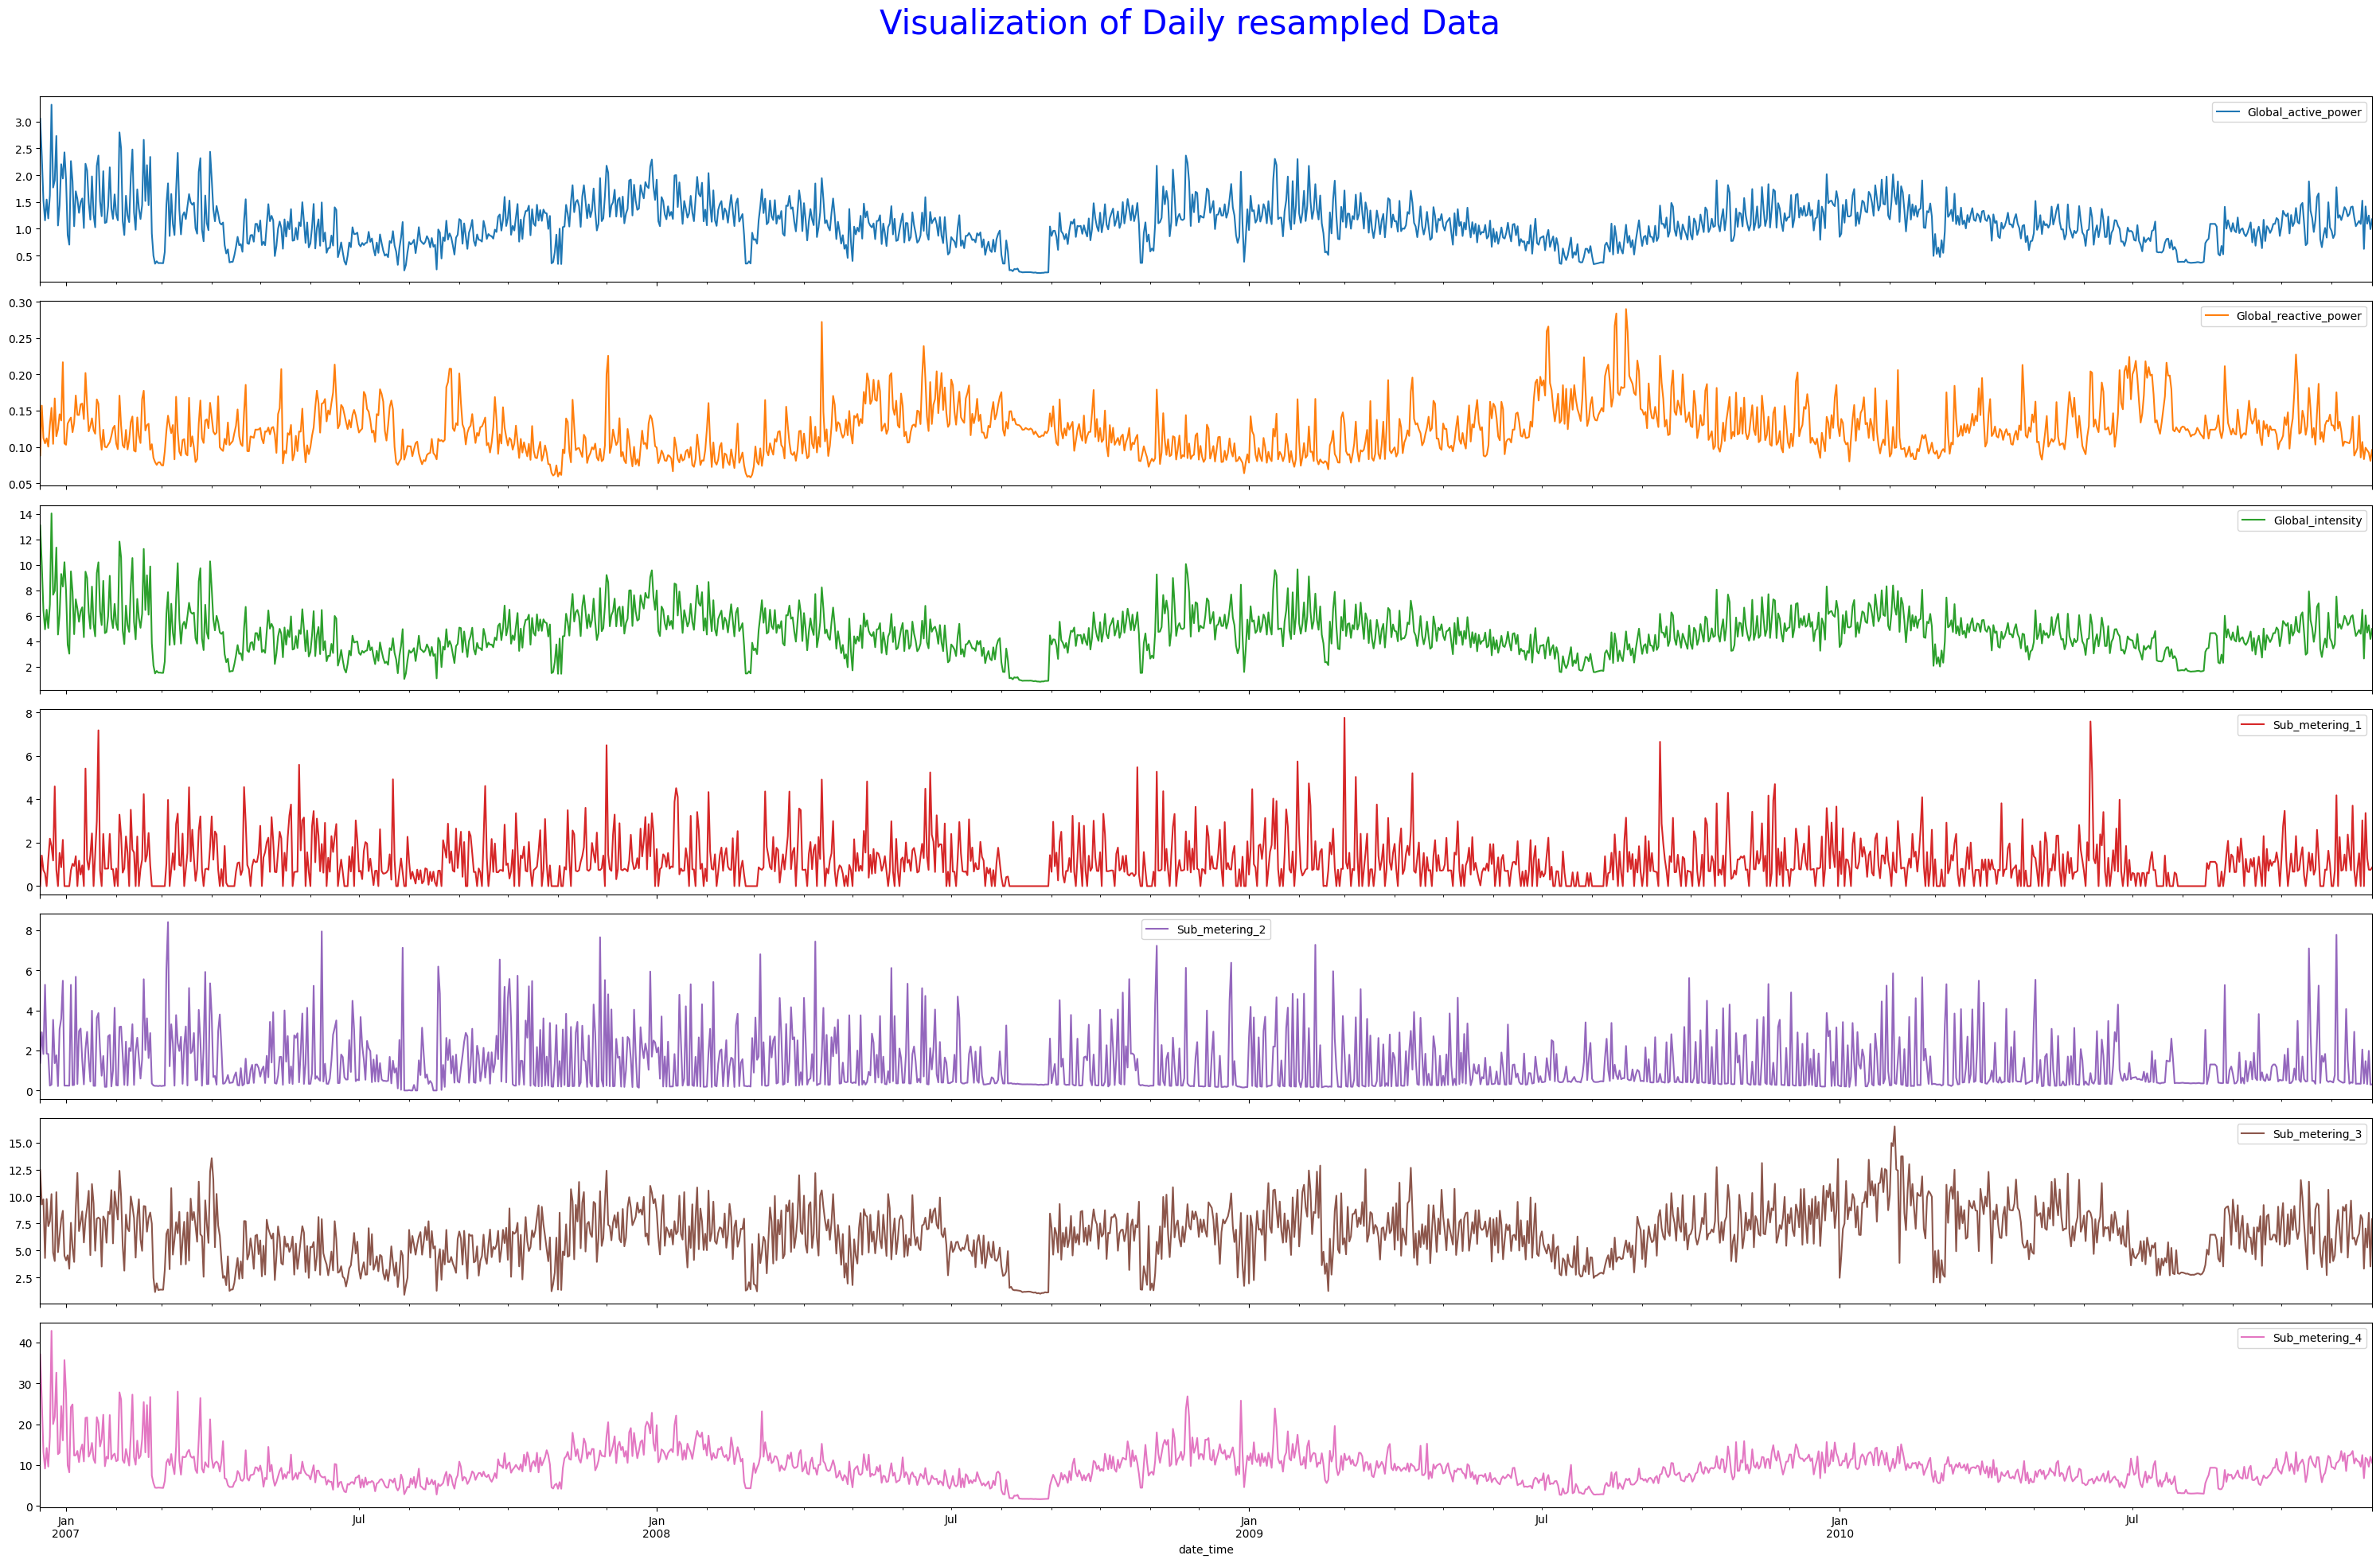

 

************************************************ Daily Resampled distribution Plot **************************************************



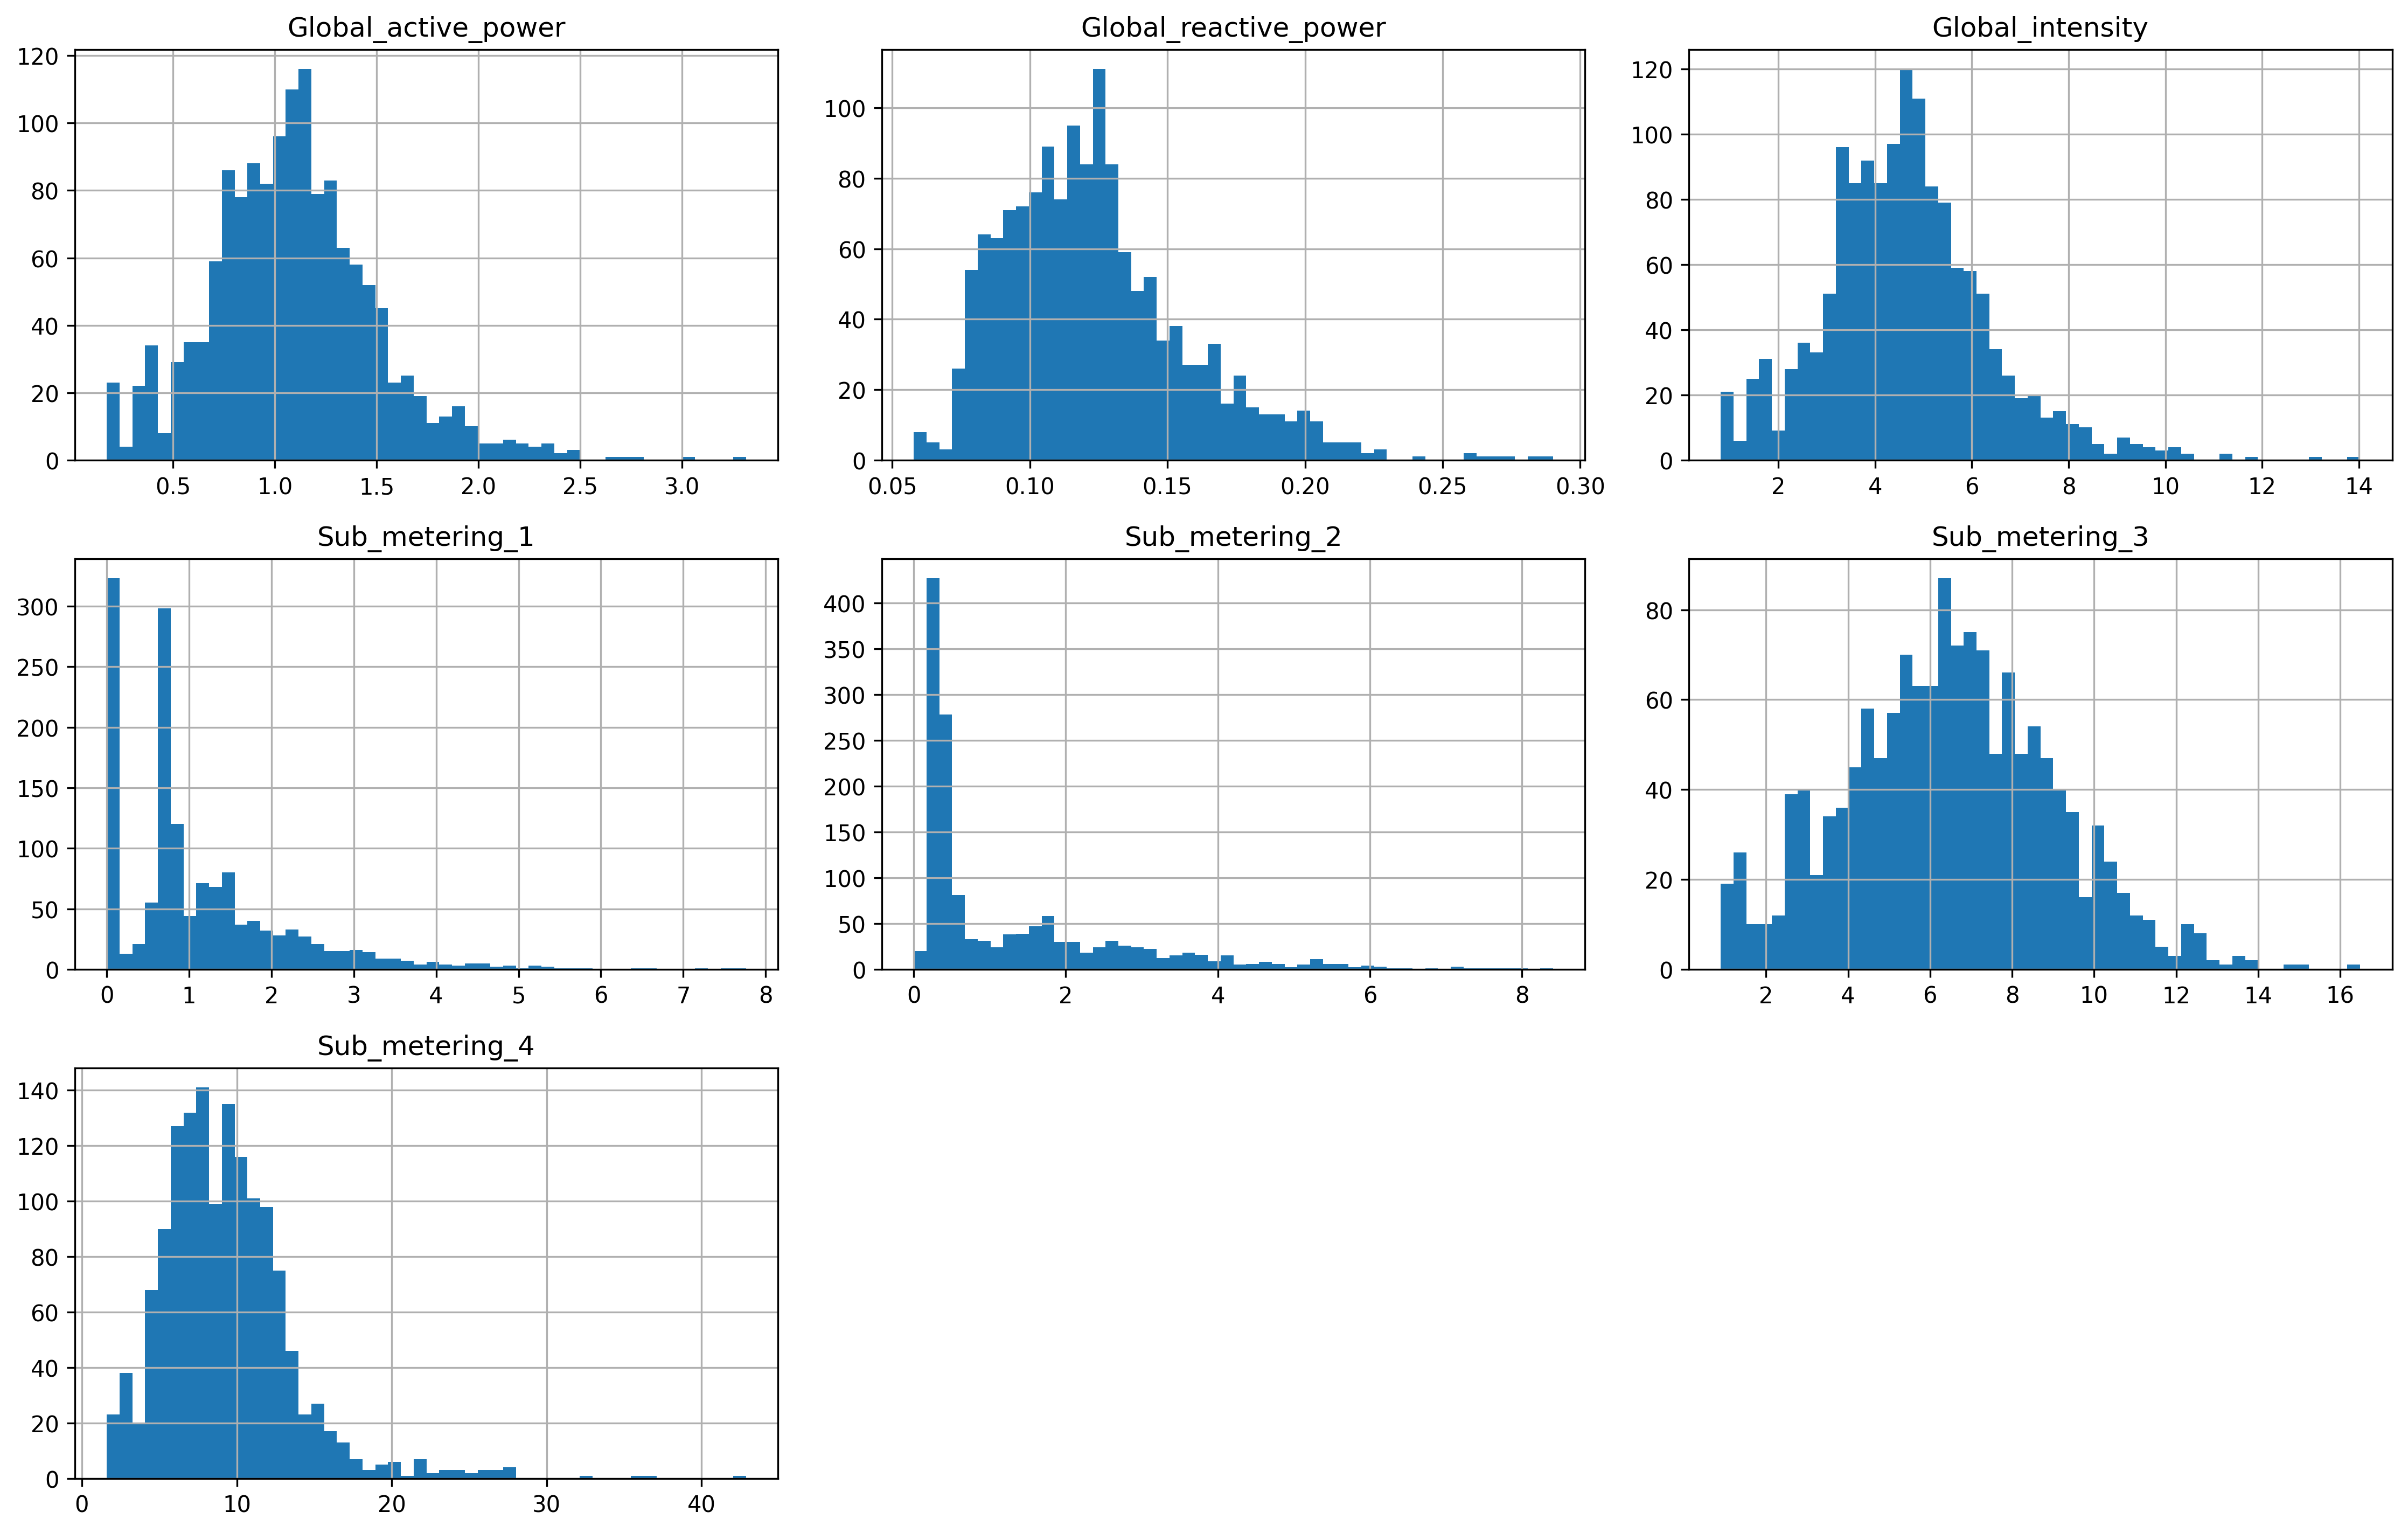

 

************************************************ Daily Resampled correlation Plot **************************************************



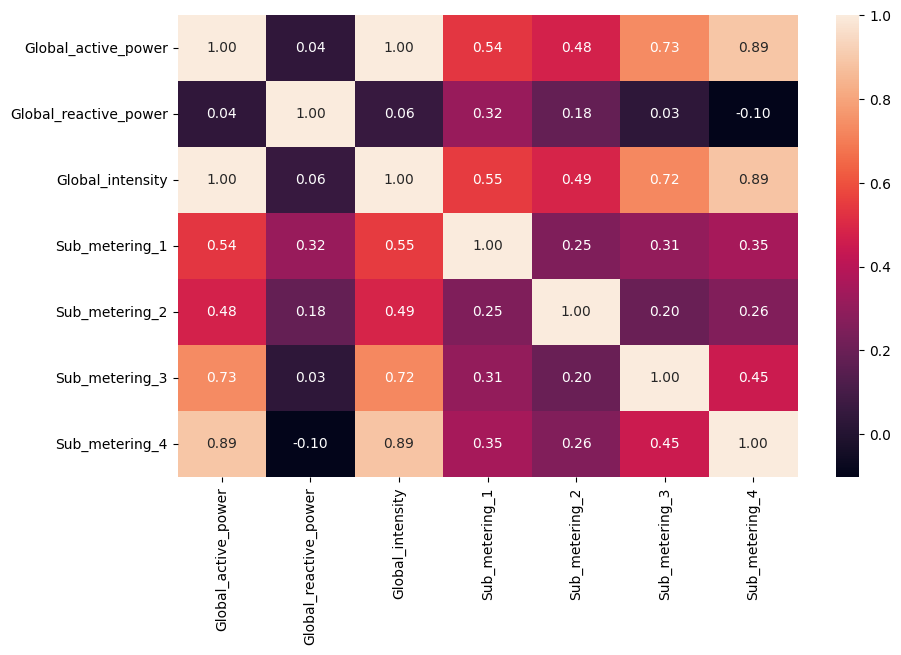

In [23]:
# Plot the visualization, distribution and correlation of Daily resampled data
df_visu_dist_corr(df1, "D", "Daily")

Shape after Weekly resampling of data : (207, 7) 


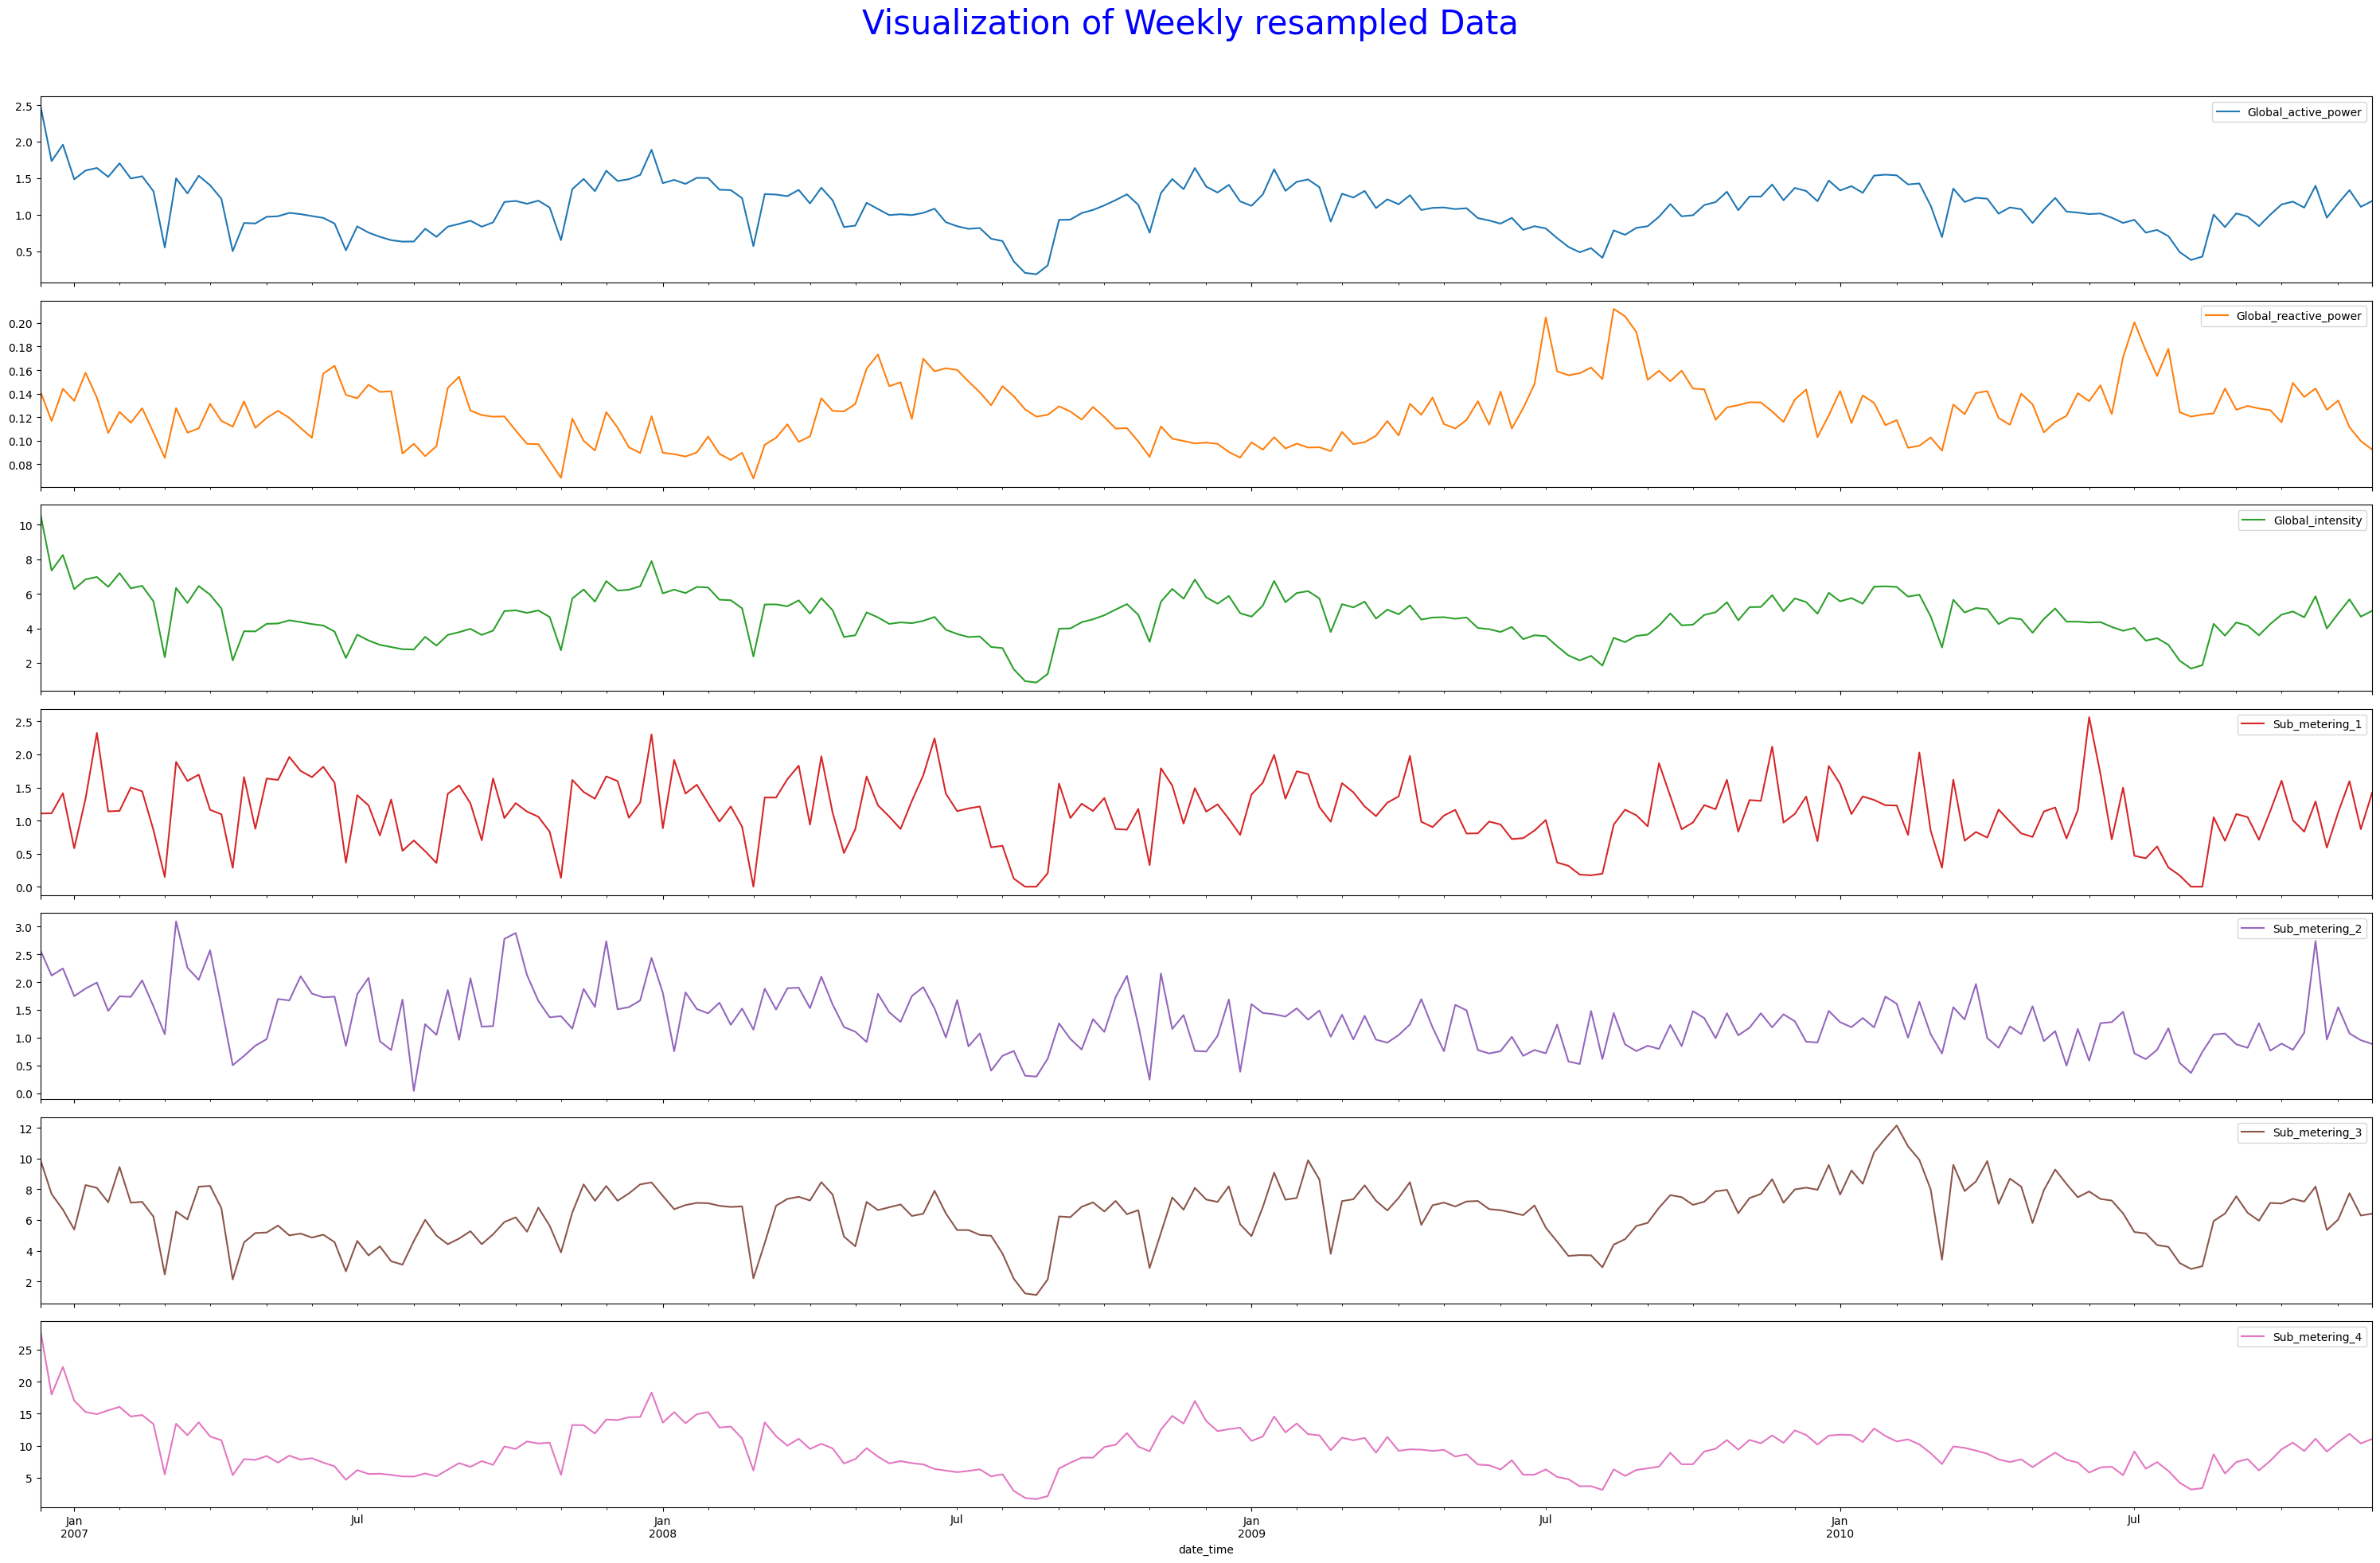

 

************************************************ Weekly Resampled distribution Plot **************************************************



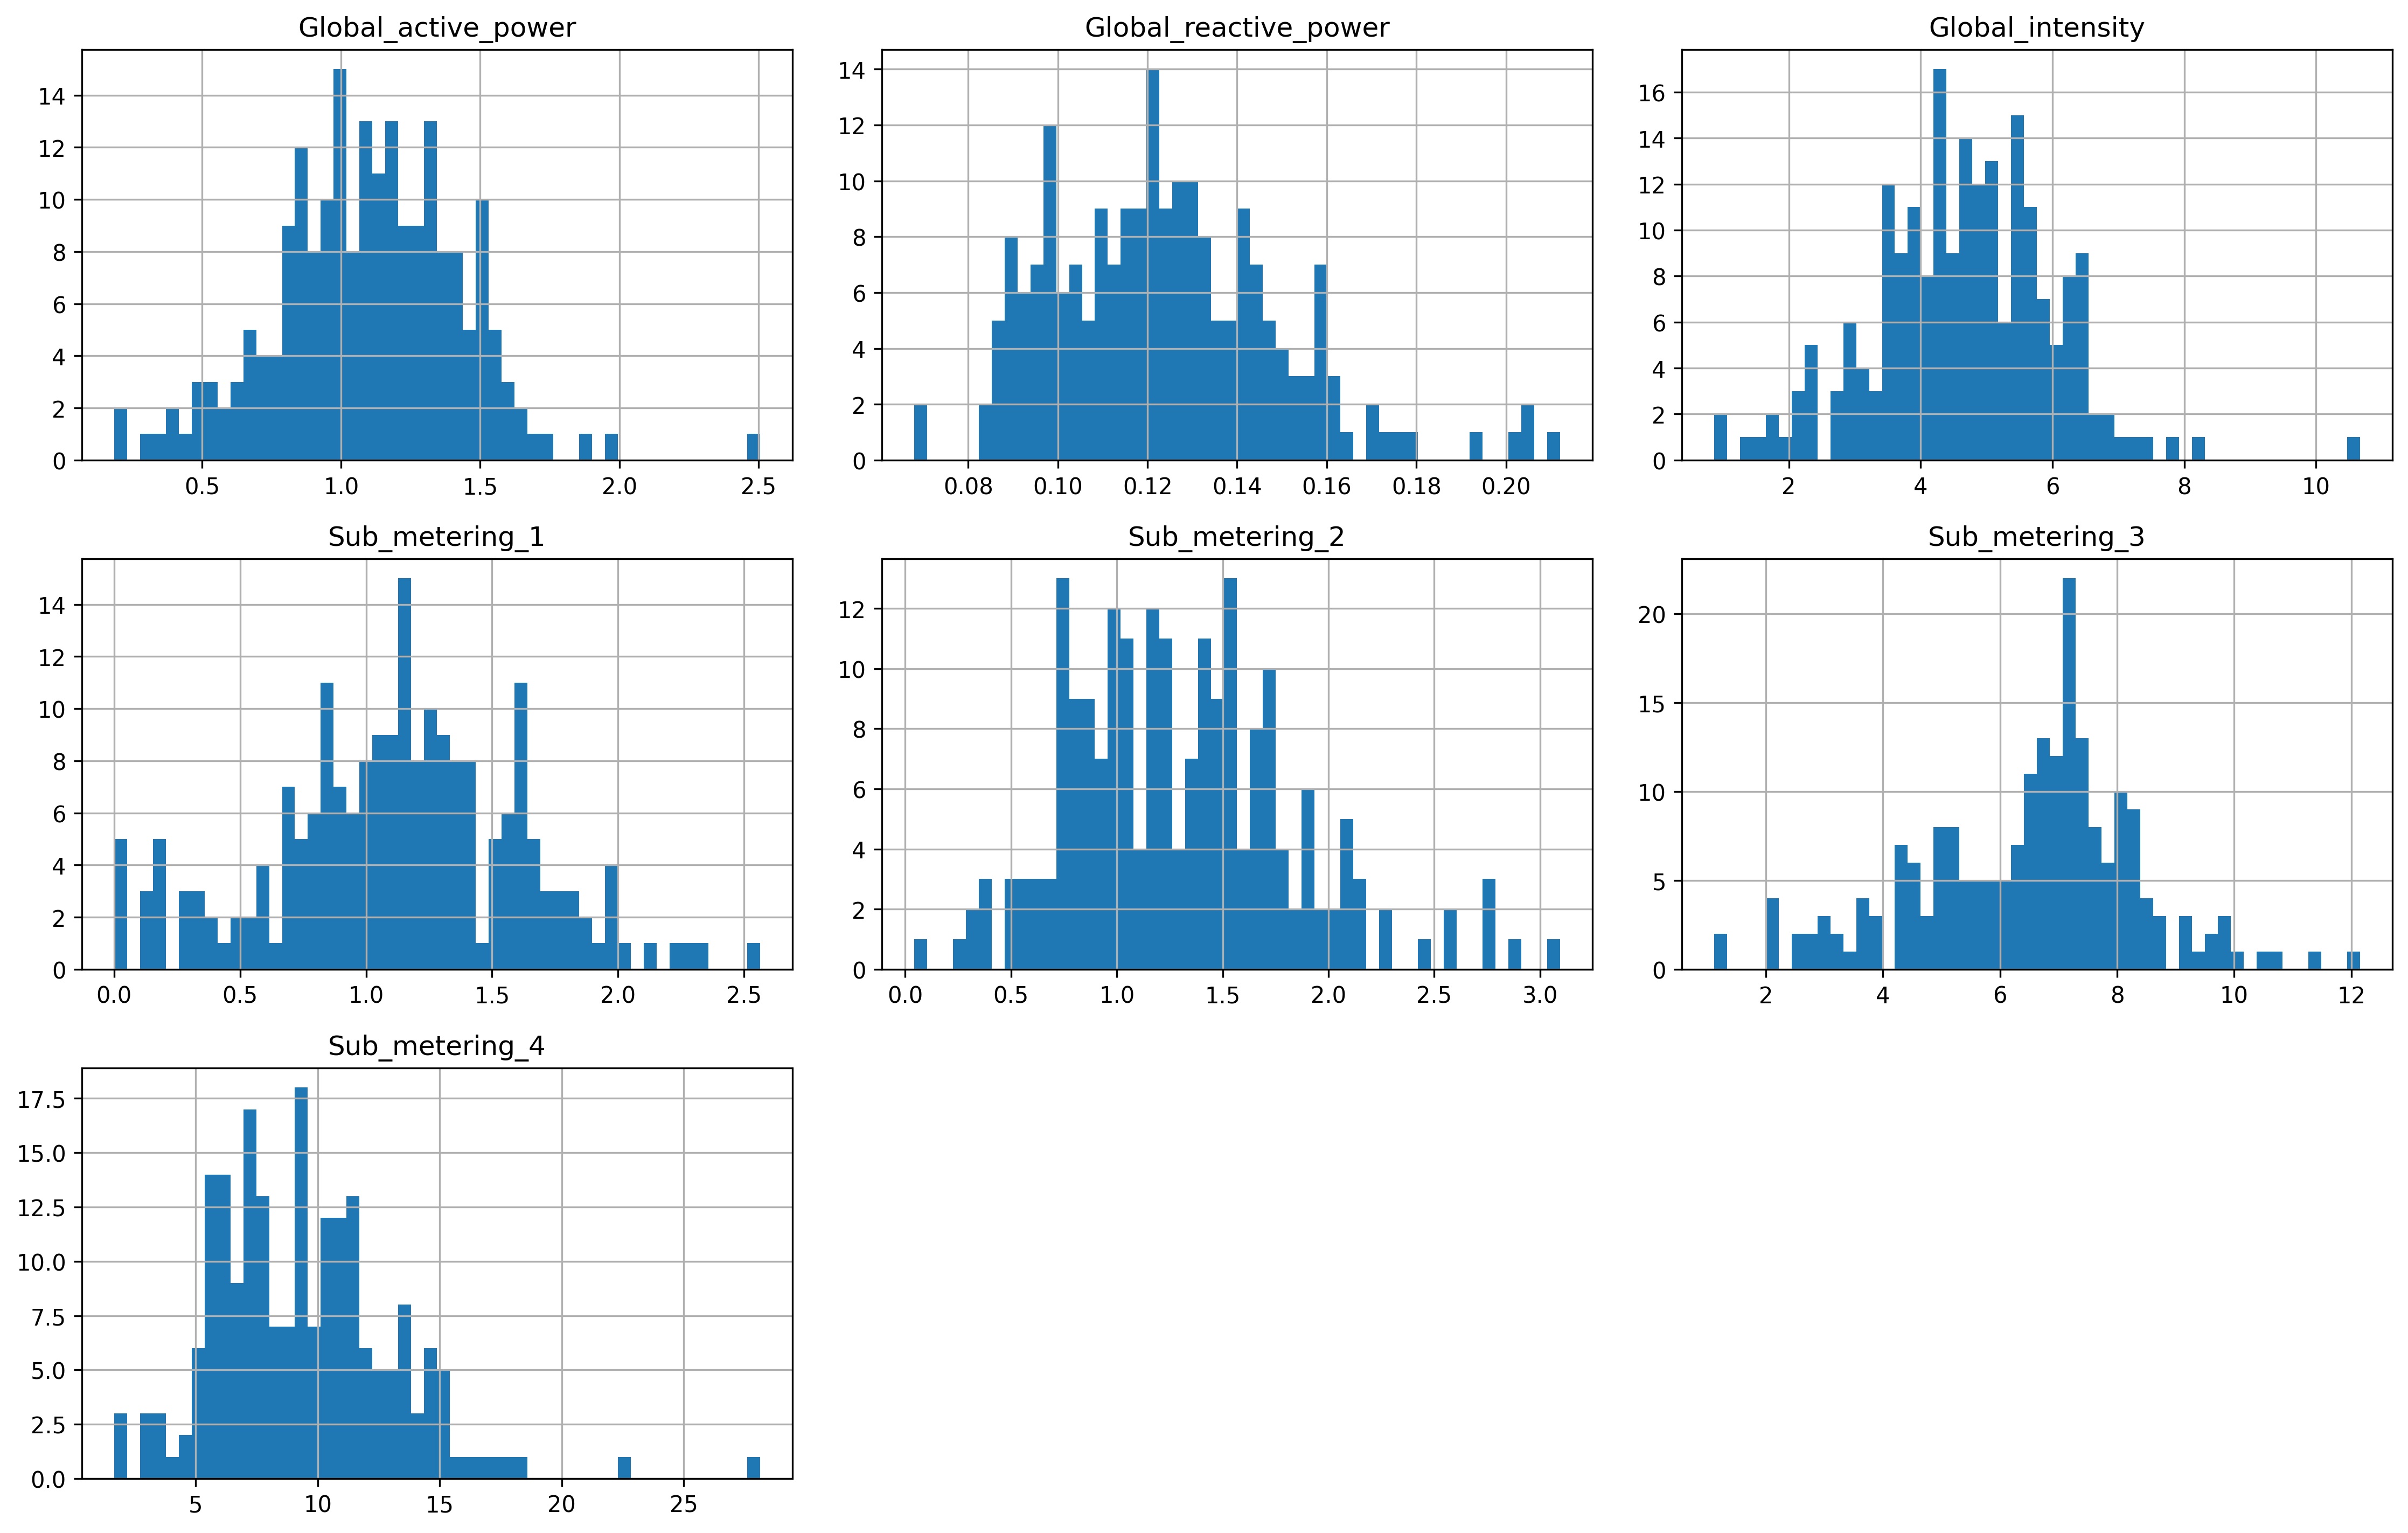

 

************************************************ Weekly Resampled correlation Plot **************************************************



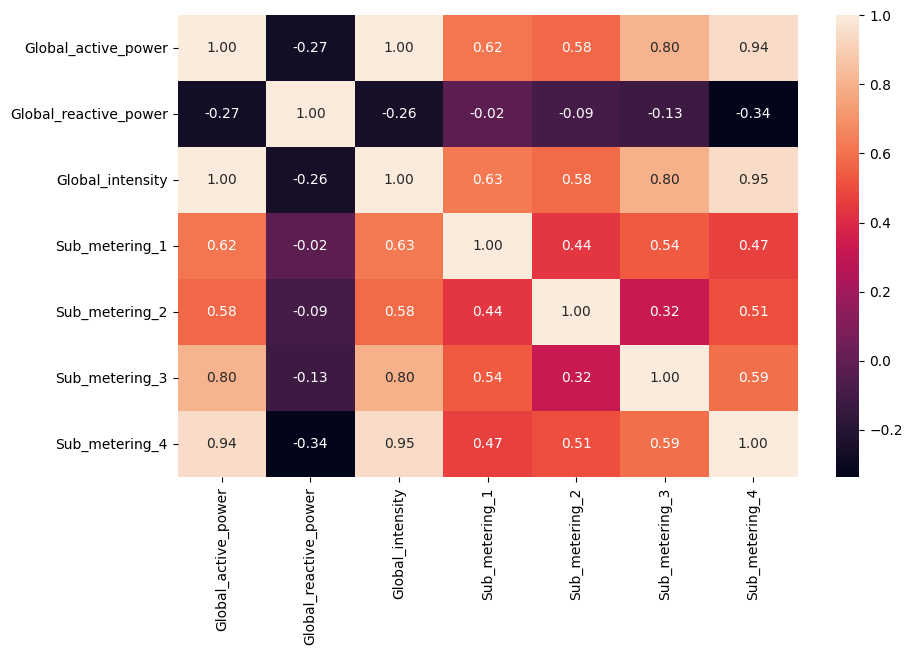

In [24]:
# Plot the visualization, distribution and correlation of Weekly resampled data
df_visu_dist_corr(df1, "W", "Weekly")

Shape after Monthly resampling of data : (48, 7) 


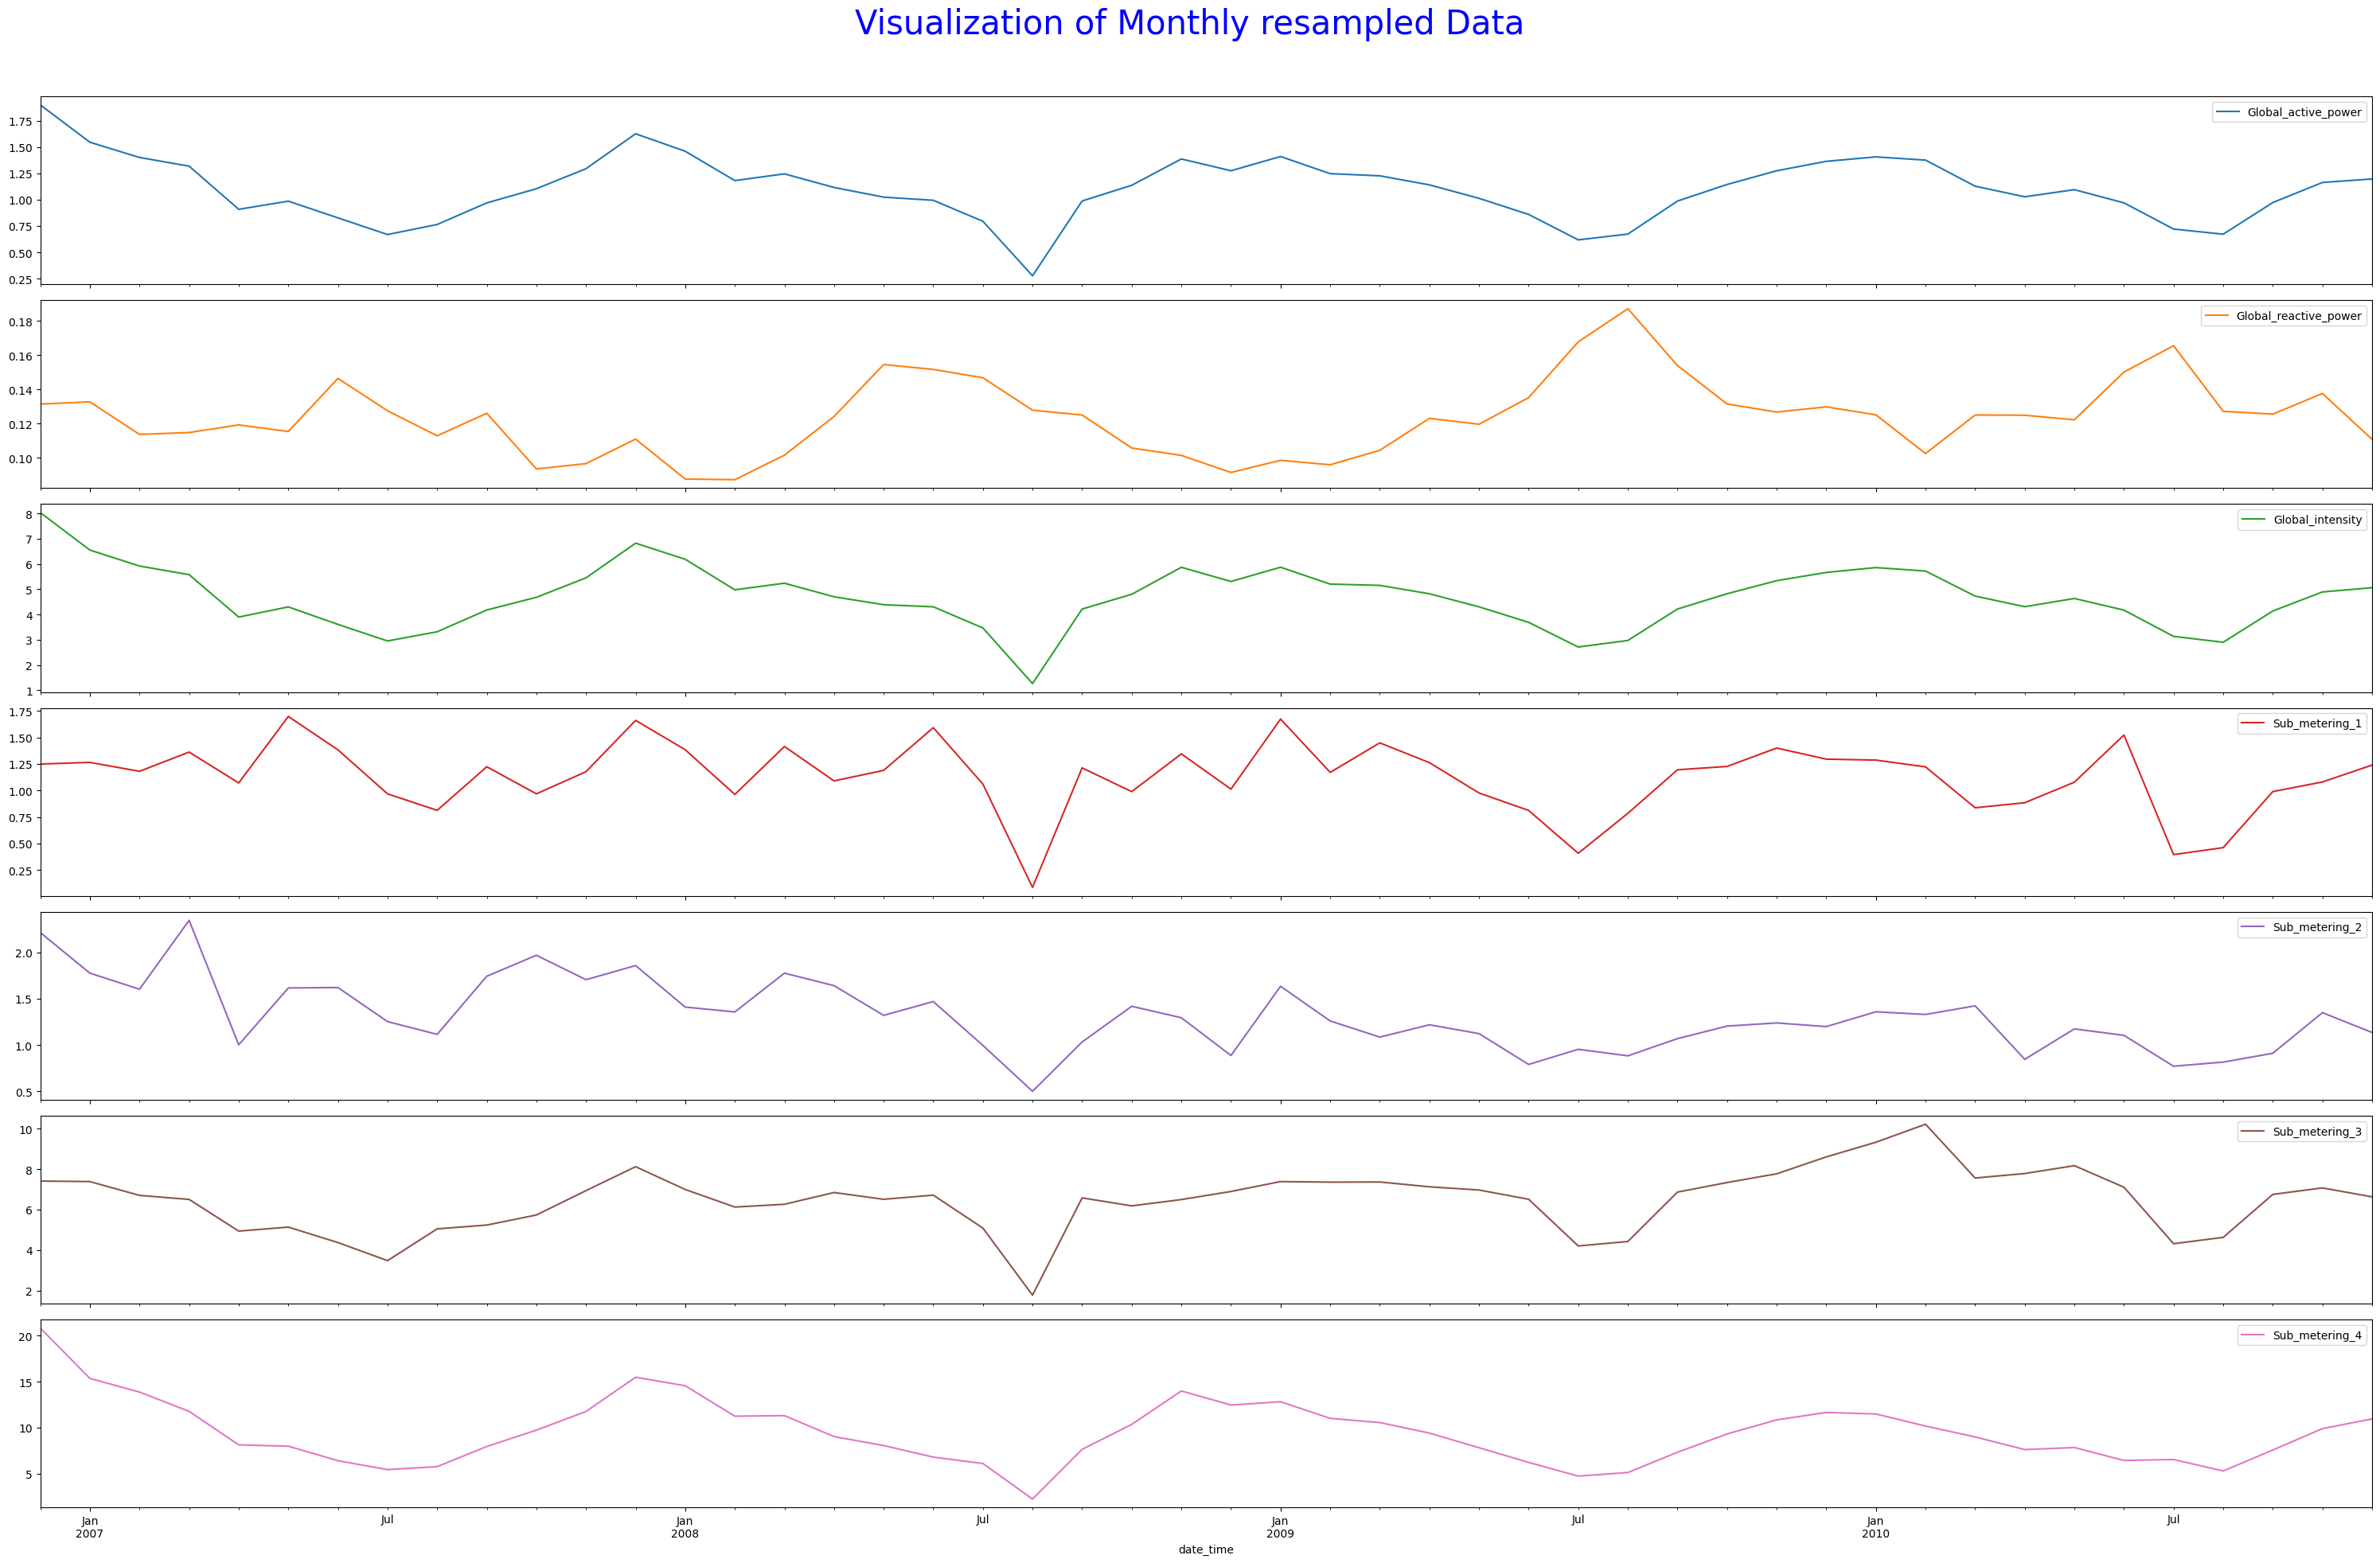

 

************************************************ Monthly Resampled distribution Plot **************************************************



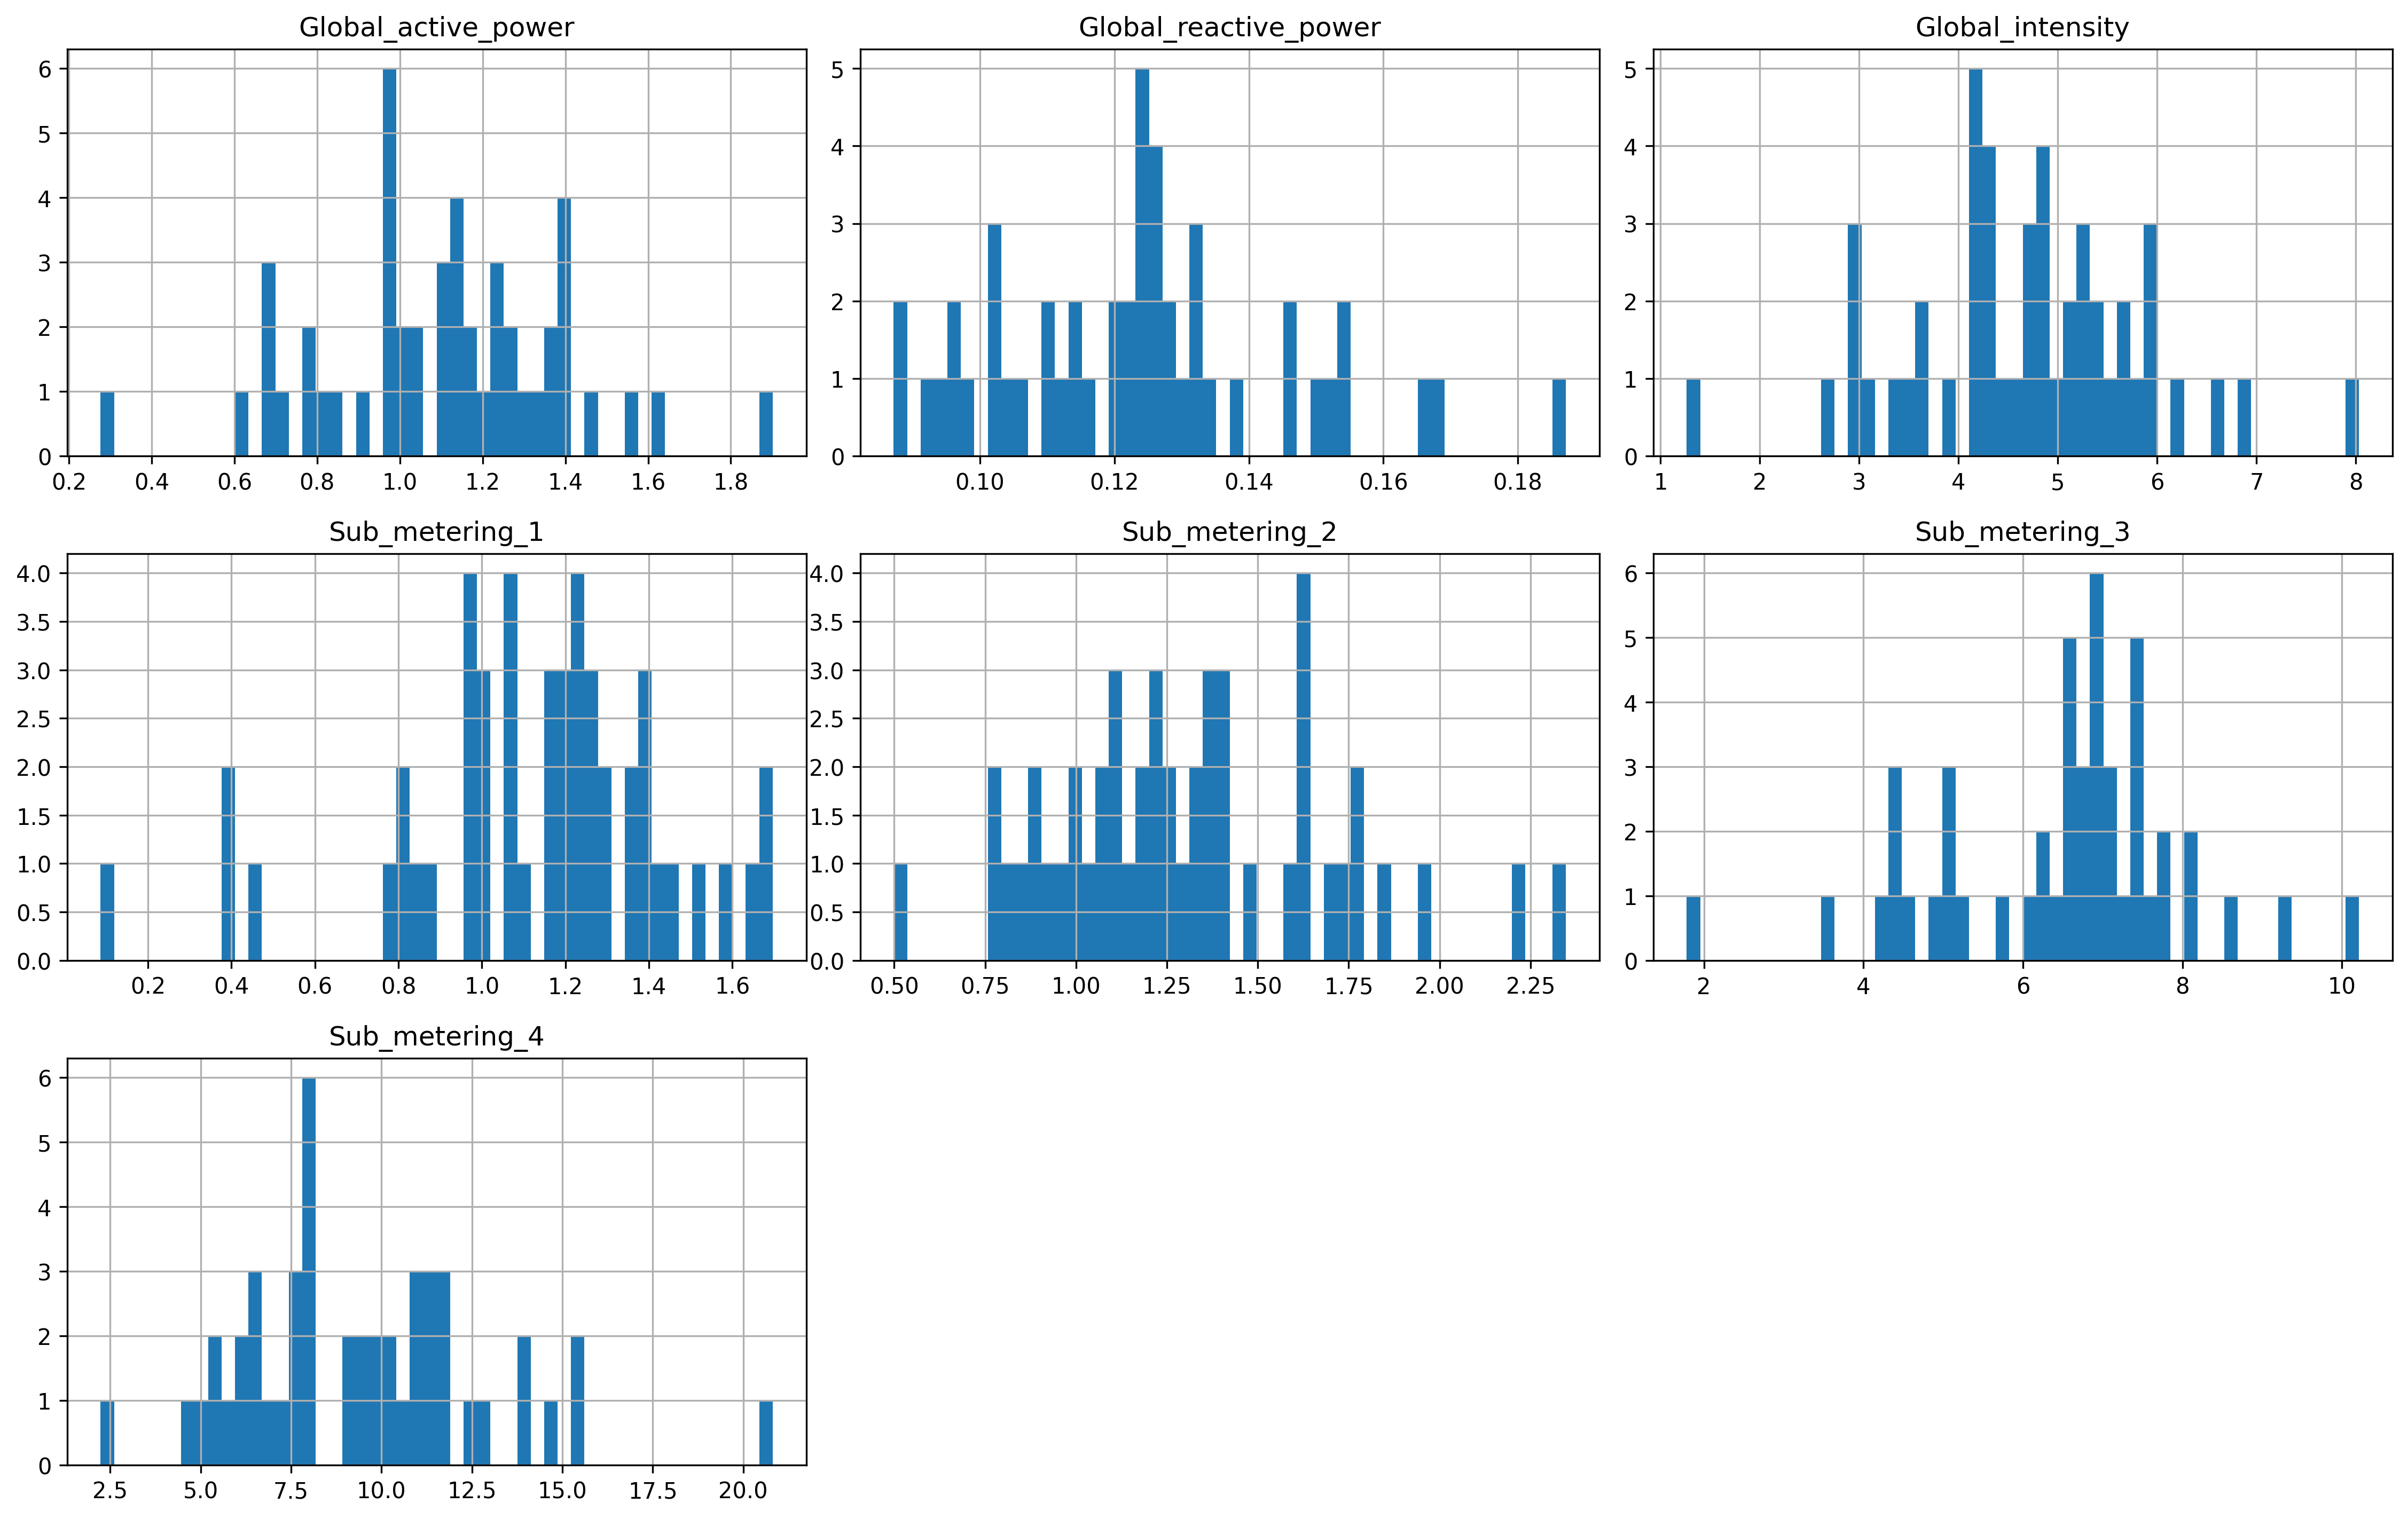

 

************************************************ Monthly Resampled correlation Plot **************************************************



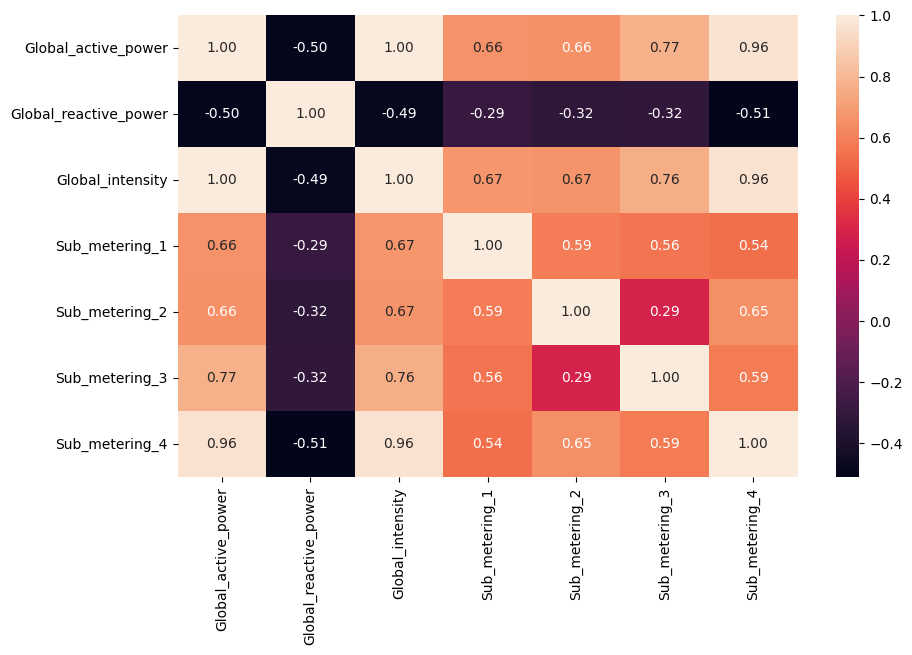

In [25]:
# Plot the visualization, distribution and correlation of Monthly resampled data
df_visu_dist_corr(df1, "M", "Monthly")

Shape after Yearly resampling of data : (5, 7) 


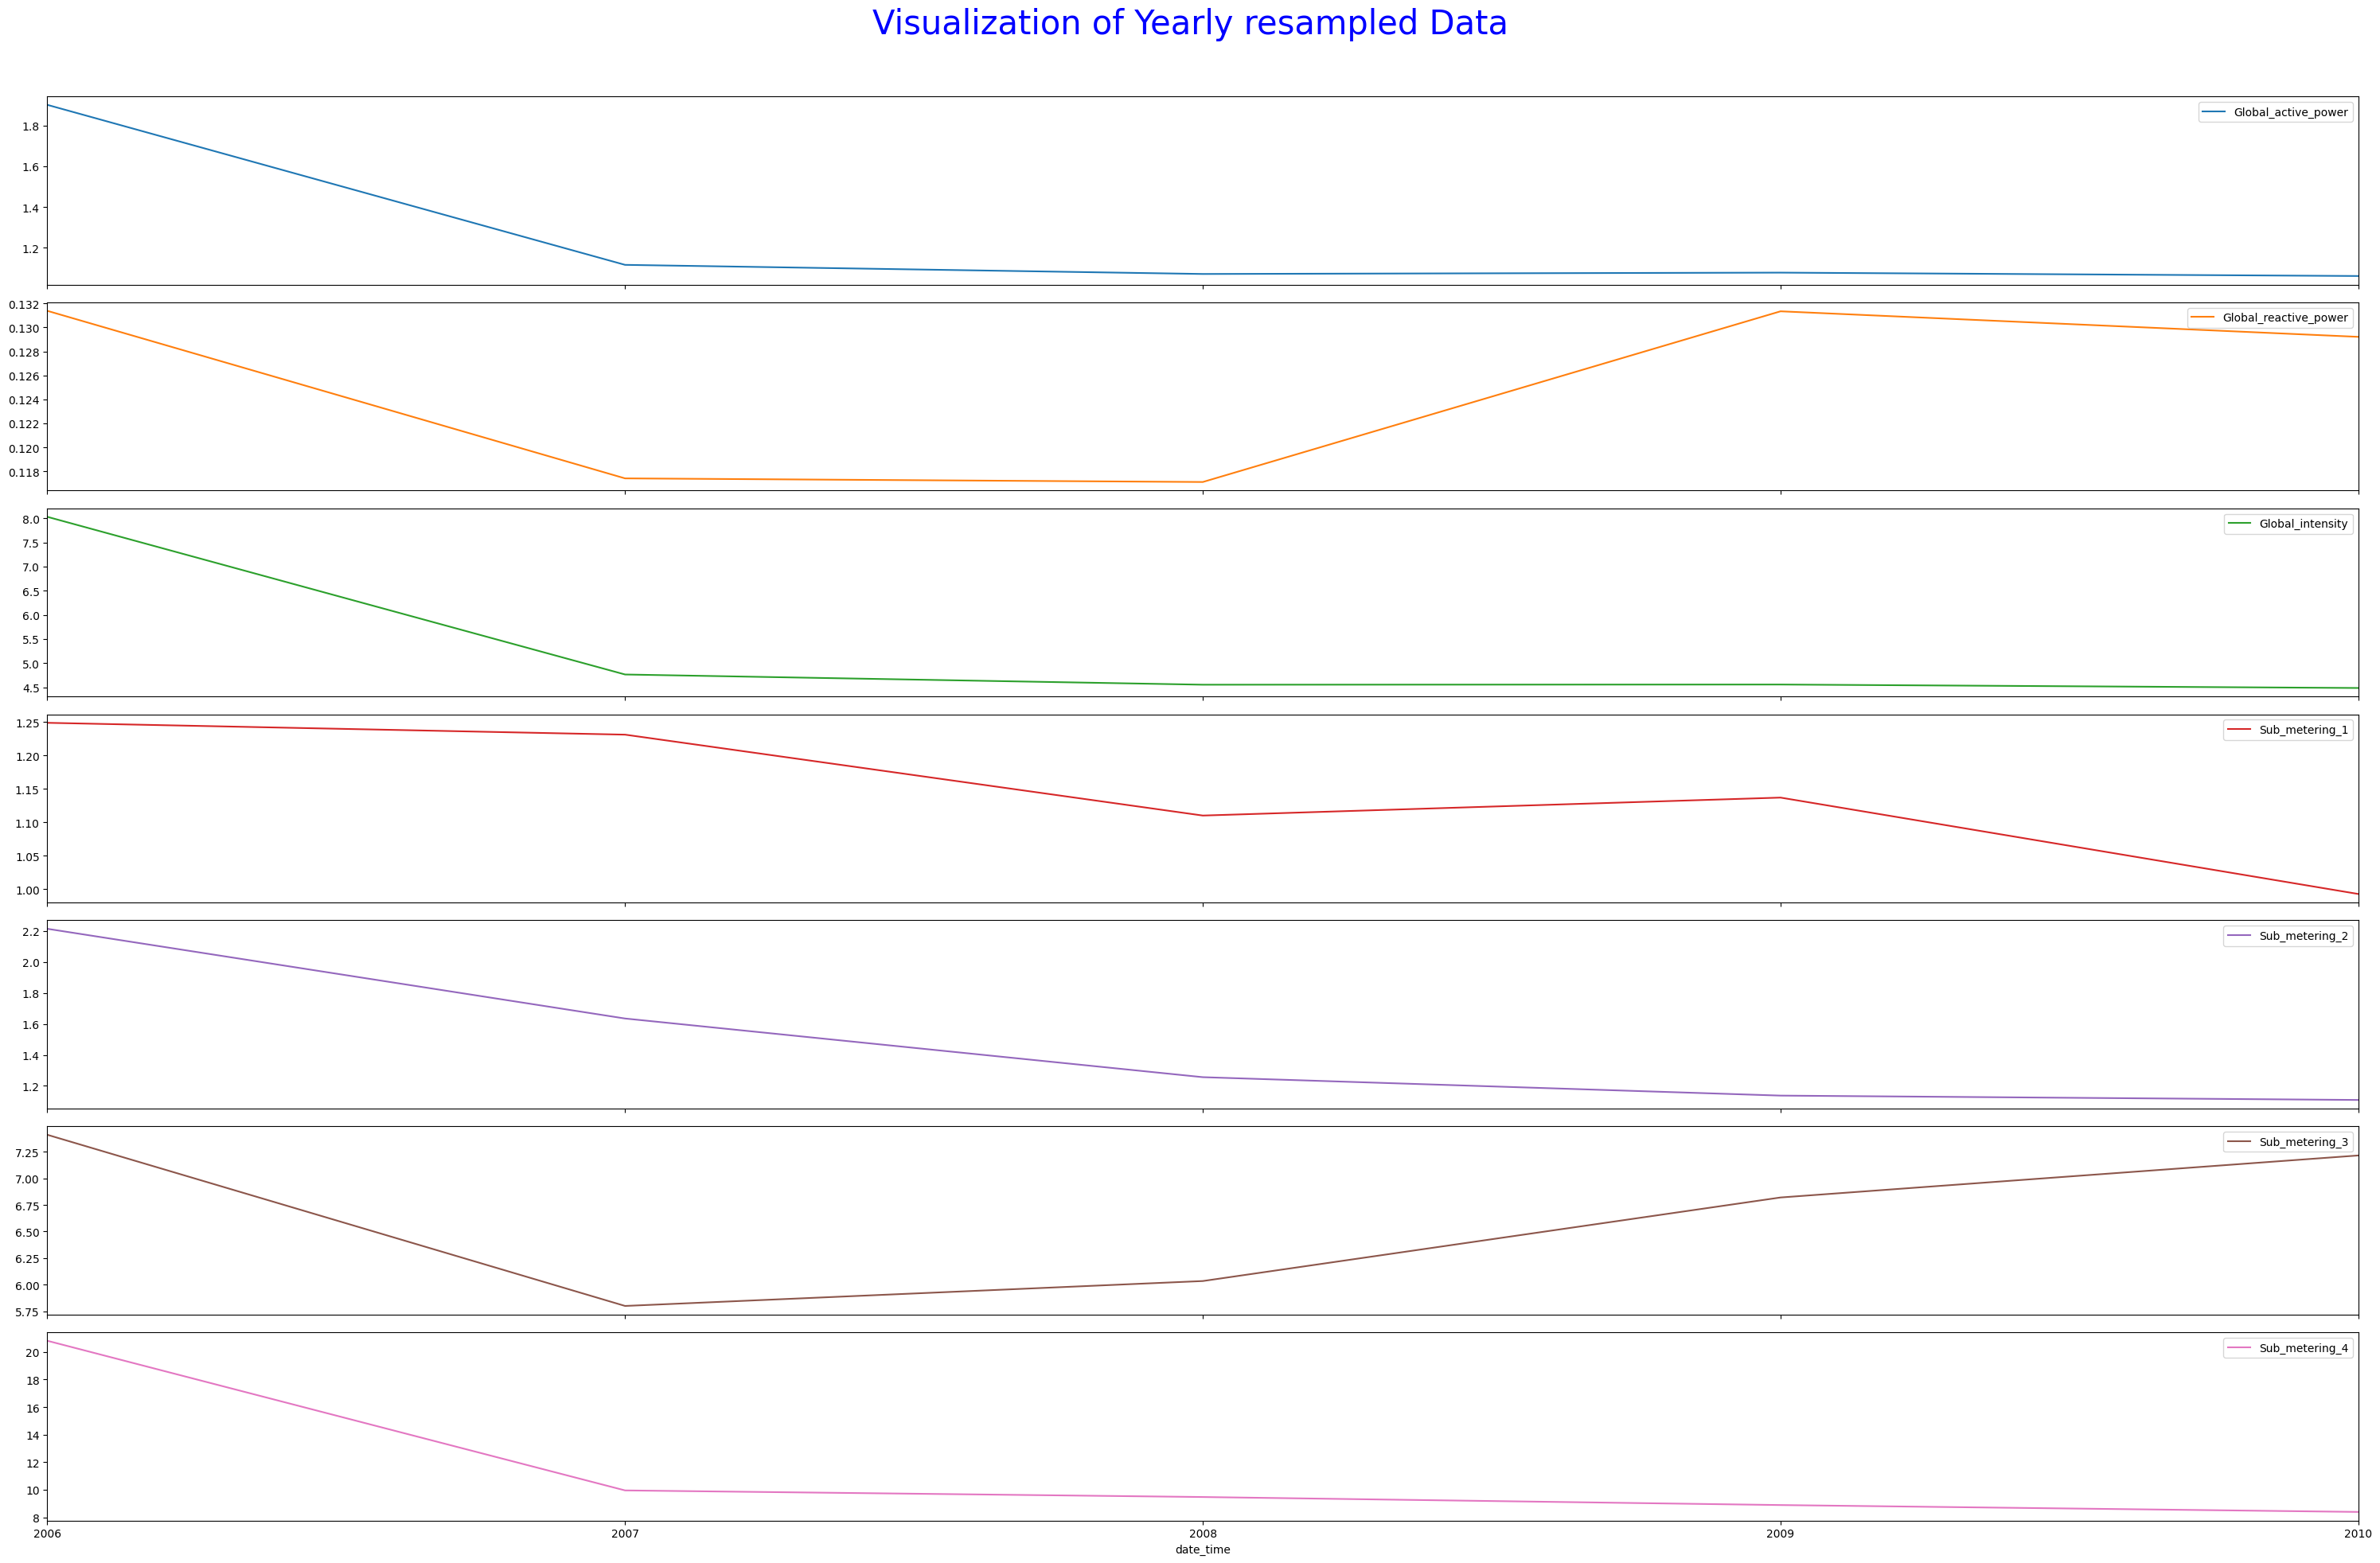

 

************************************************ Yearly Resampled distribution Plot **************************************************



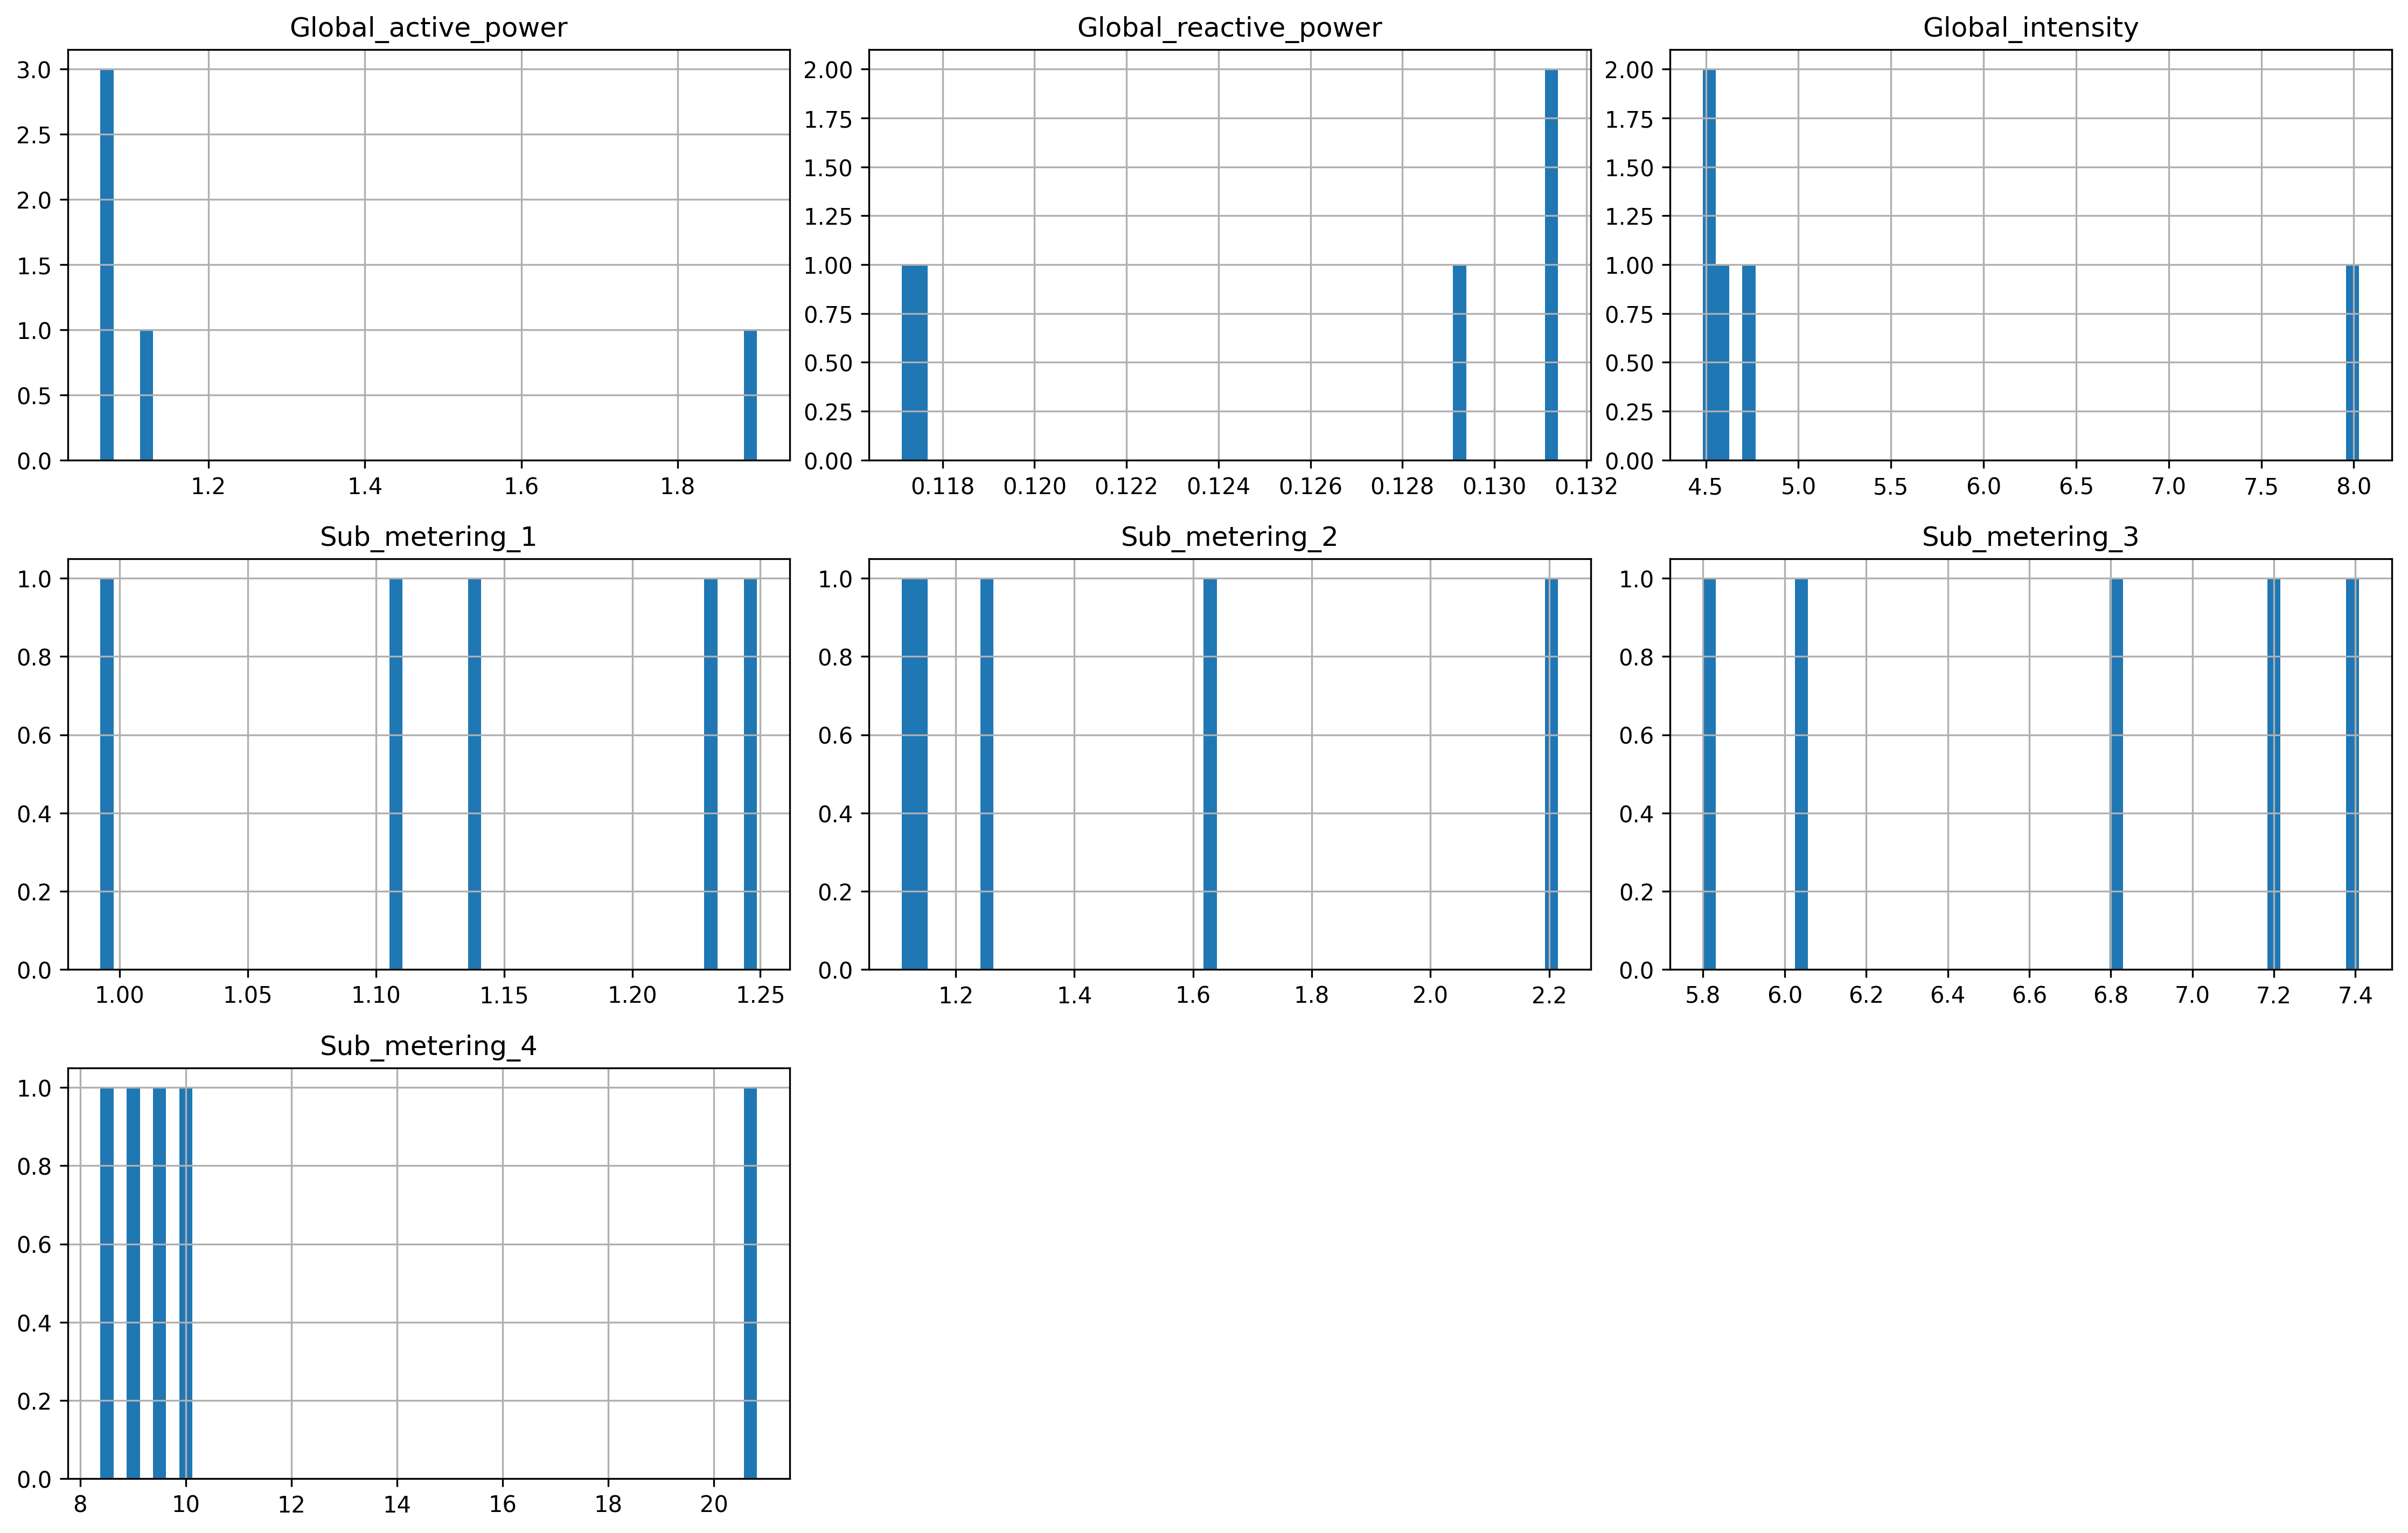

 

************************************************ Yearly Resampled correlation Plot **************************************************



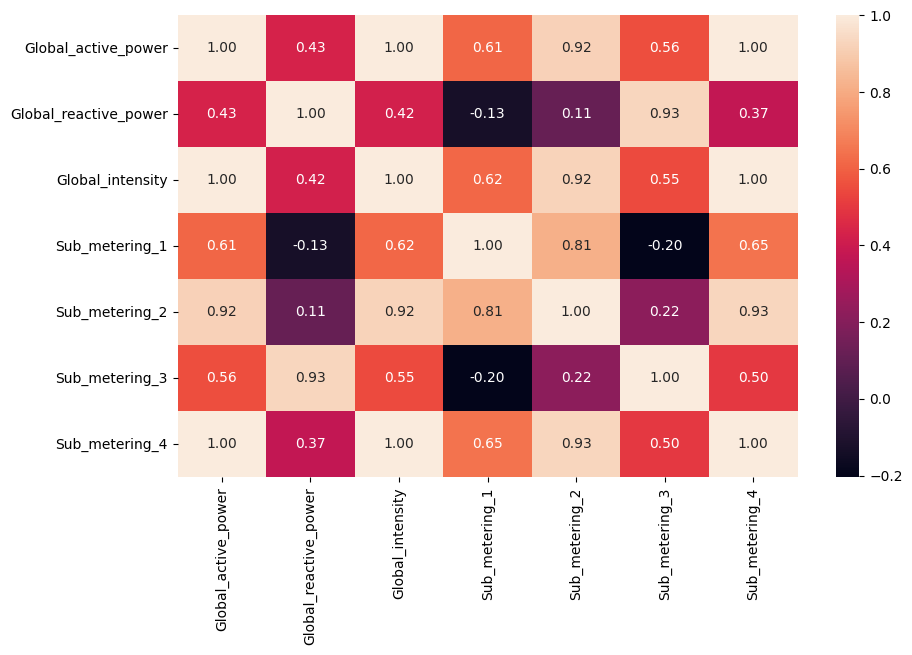

In [26]:
# Plot the visualization, distribution and correlation of Yearly resampled data
df_visu_dist_corr(df1, "Y", "Yearly")

Observation:-
+ It is observed that as we increase the resampling criteria from hour to month and year,
 + There is a drop in seasonal periodicity pattern.
 + The distribution is becoming close to normal (not exactly normal) for some features.
 + An increase in correlation is observed between features.

# Exploratory Data Analysis(EDA) of Global Active Power Consumption and Sub_meterings

## Visualize the Global_active_power using bar chart
Four types of aggregation (Sum, Max, Min, Mean) each for Daily, Weekly, Monthly, Quarterly and Yearly Aanalysis

As there is only 16 records for 2006 year, which may deceive our analysis. so I am removing those 16 records of 2006 and move ahead for analysis of remaining four year data.

Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else.

In [28]:
# Filter out 2006 data, only keep data post 2006
df1 = df1[df1.index.year>2006]

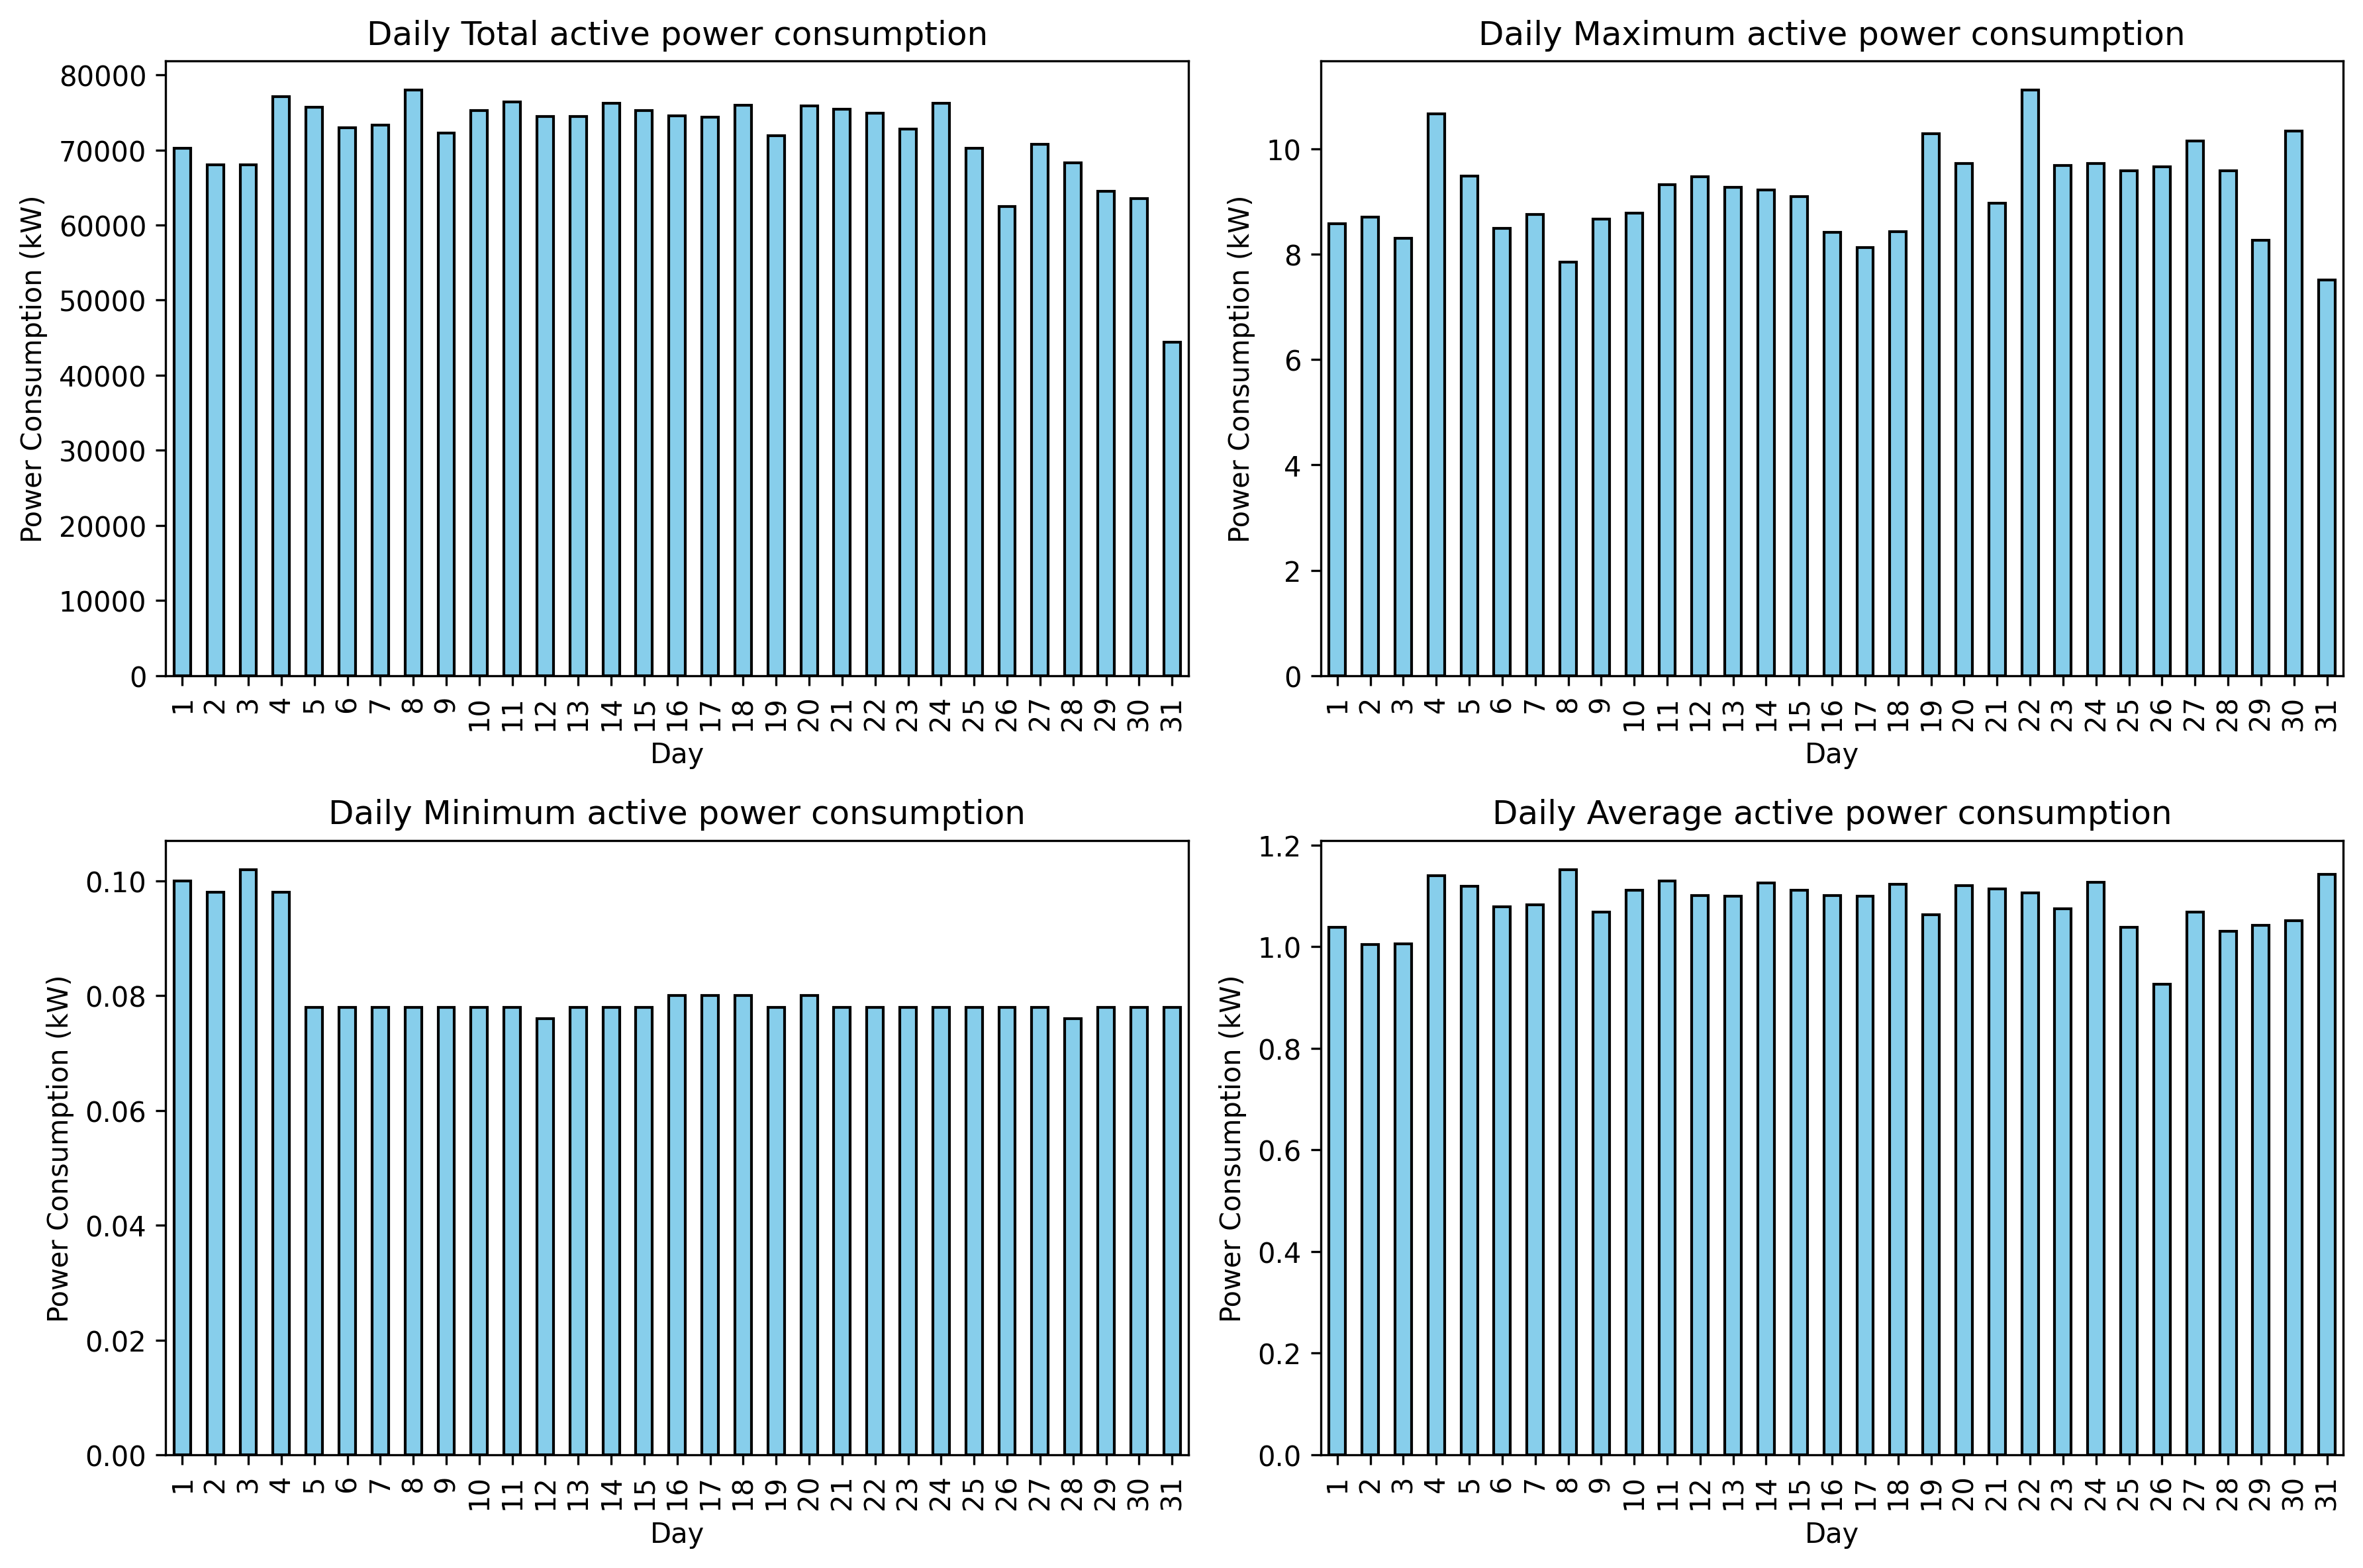

In [70]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for daily total active power consumption
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
df1.Global_active_power.groupby(df1.Global_active_power.index.day).sum().plot(ax=axes[0, 0], kind="bar", xlabel="Day",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Daily Total active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.day).max().plot(ax=axes[0, 1], kind="bar", xlabel="Day",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Daily Maximum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.day).min().plot(ax=axes[1, 0], kind="bar", xlabel="Day",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Daily Minimum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.day).mean().plot(ax=axes[1, 1], kind="bar",
                                                                                xlabel="Day", ylabel="Power Consumption (kW)",
                                                                                title="Daily Average active power consumption",
                                                                                color='skyblue', edgecolor='black')
plt.tight_layout()

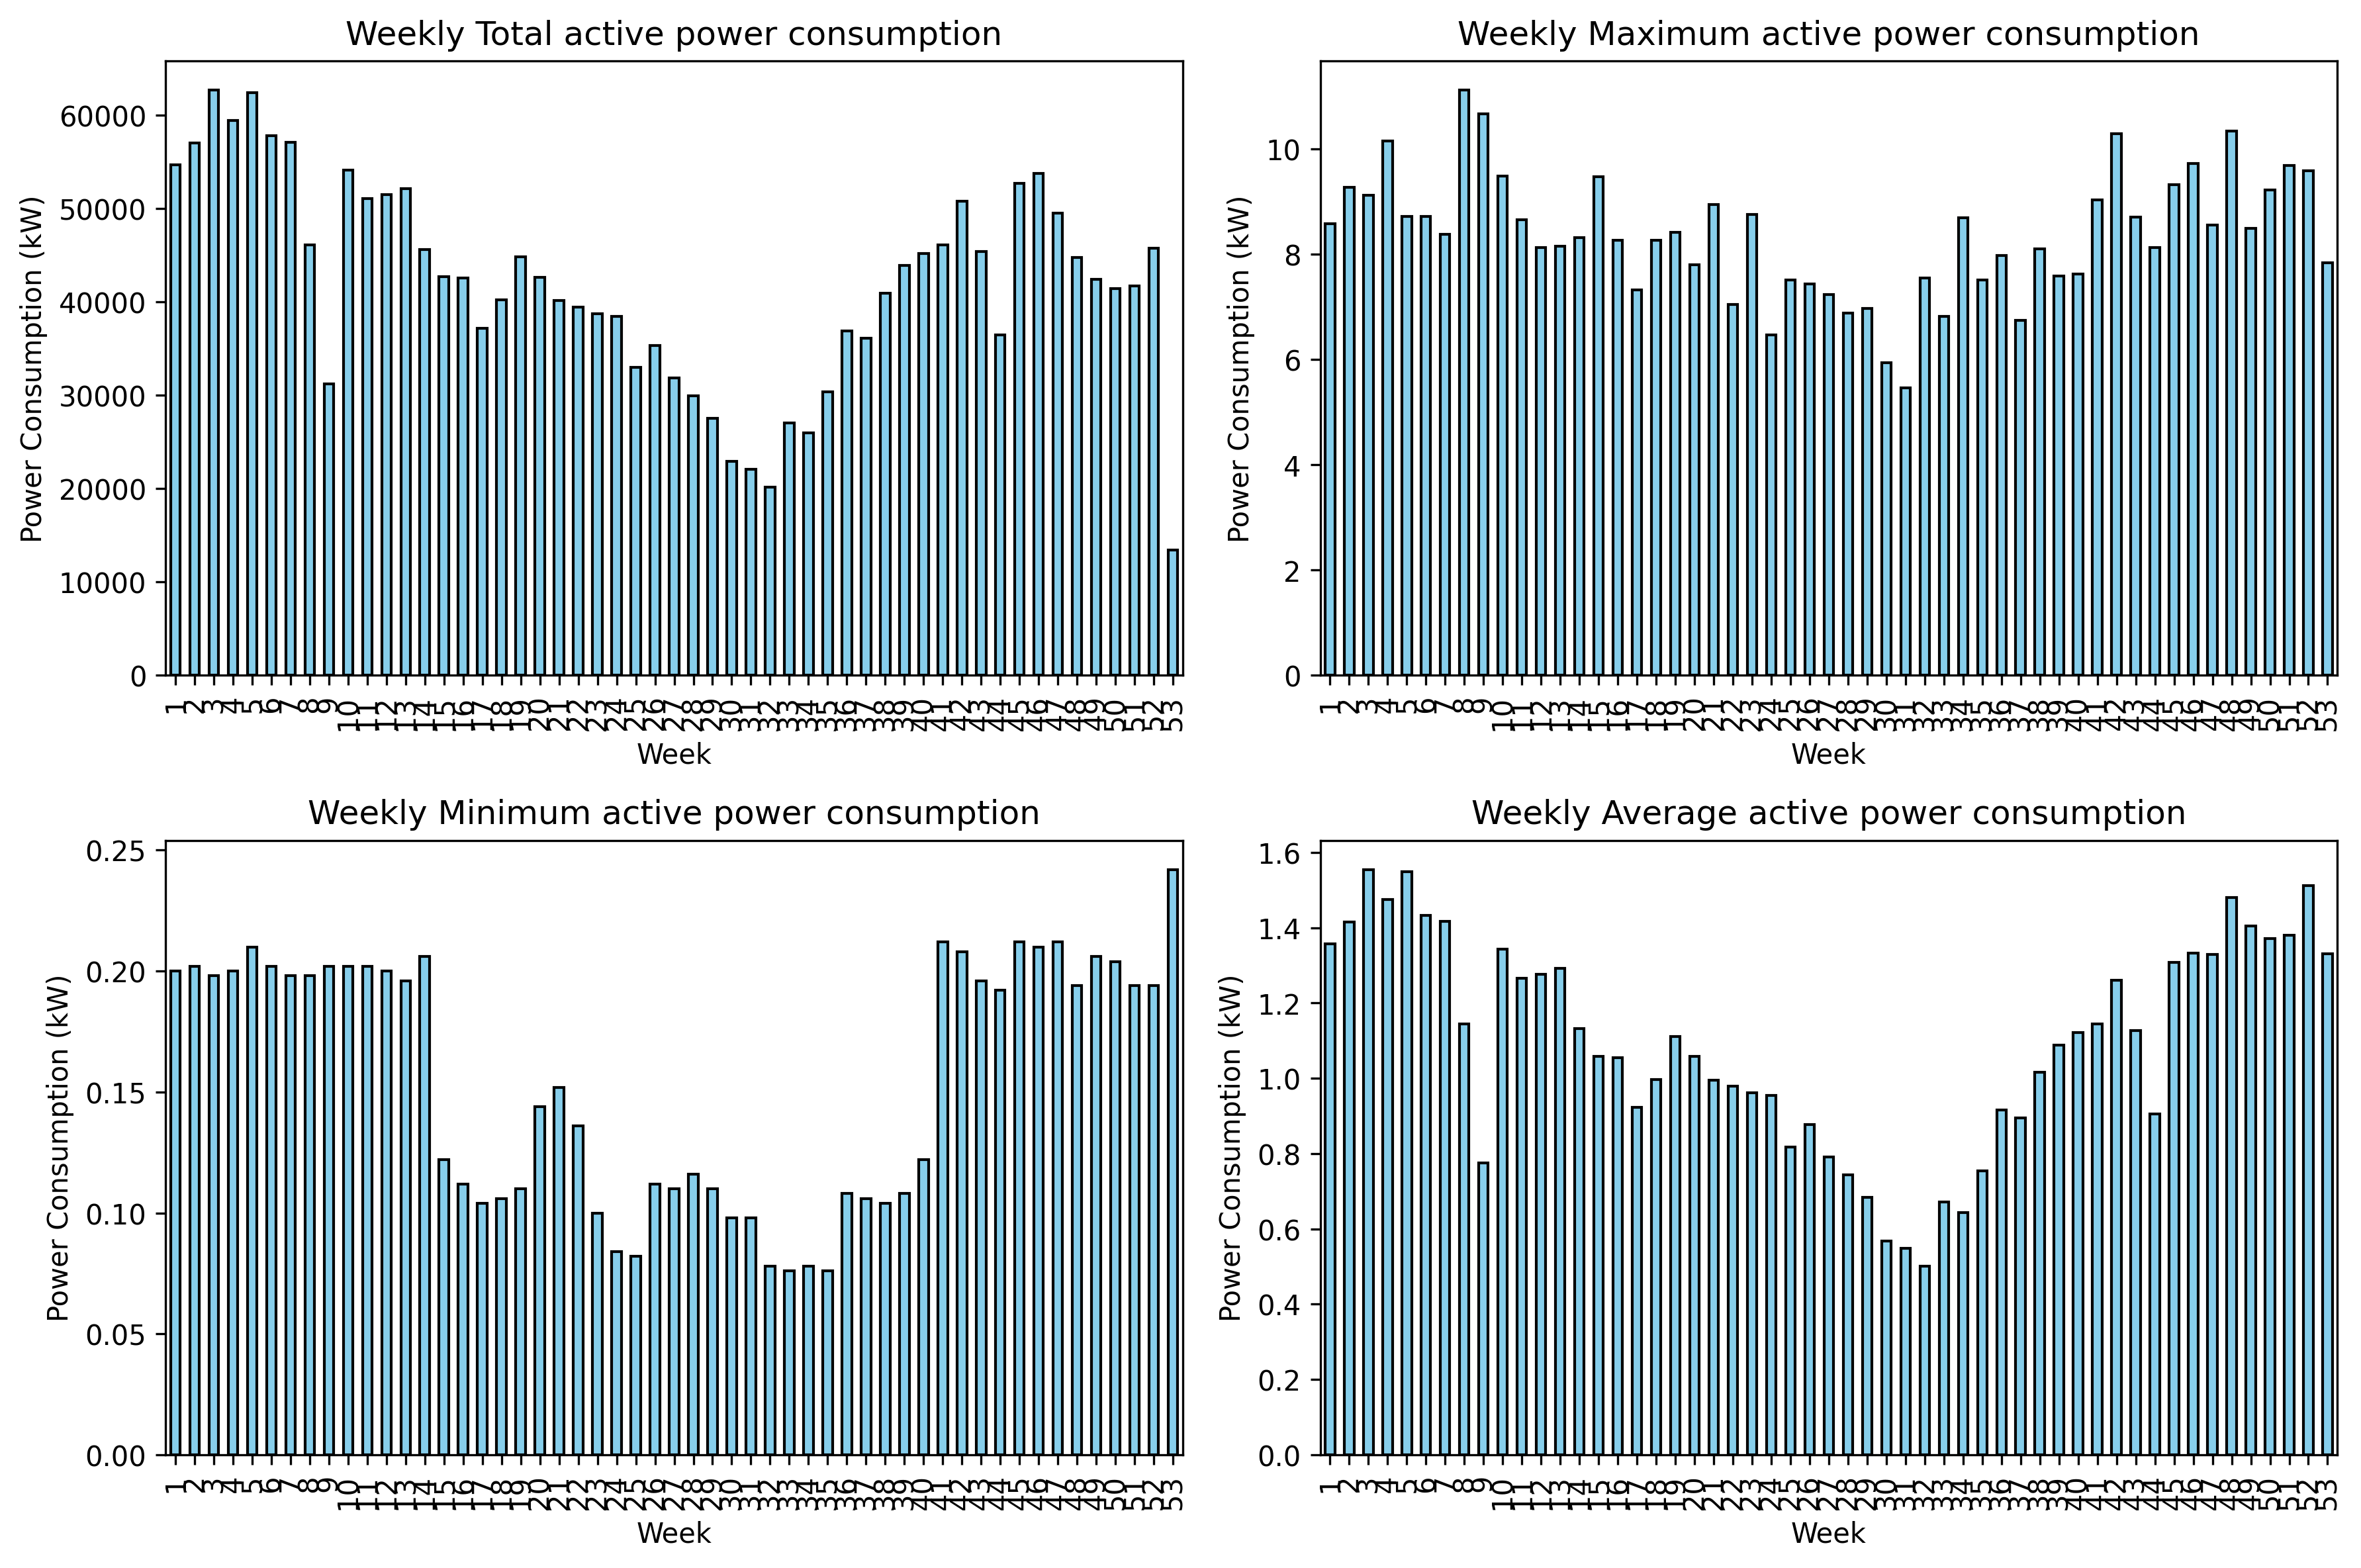

In [71]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for Weekly total active power consumption
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
df1.Global_active_power.groupby(df1.Global_active_power.index.isocalendar().week).sum().plot(ax=axes[0, 0], kind="bar", xlabel="Week",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Weekly Total active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.isocalendar().week).max().plot(ax=axes[0, 1], kind="bar", xlabel="Week",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Weekly Maximum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.isocalendar().week).min().plot(ax=axes[1, 0], kind="bar", xlabel="Week",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Weekly Minimum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.isocalendar().week).mean().plot(ax=axes[1, 1], kind="bar",
                                                                                xlabel="Week", ylabel="Power Consumption (kW)",
                                                                                title="Weekly Average active power consumption",
                                                                                color='skyblue', edgecolor='black')
plt.tight_layout()

Observation for Weekly Power Consumption (in watt hour):-
+ Minumum Power consumption is done in between 28th to 35th week.
+ Maximum power cosumption is done in almost first 12 weeks and in last 50th to 52th week.
+ Avearge power consumption for is comparatively less in from 20th week to almost 38th week as compared to other weeks.

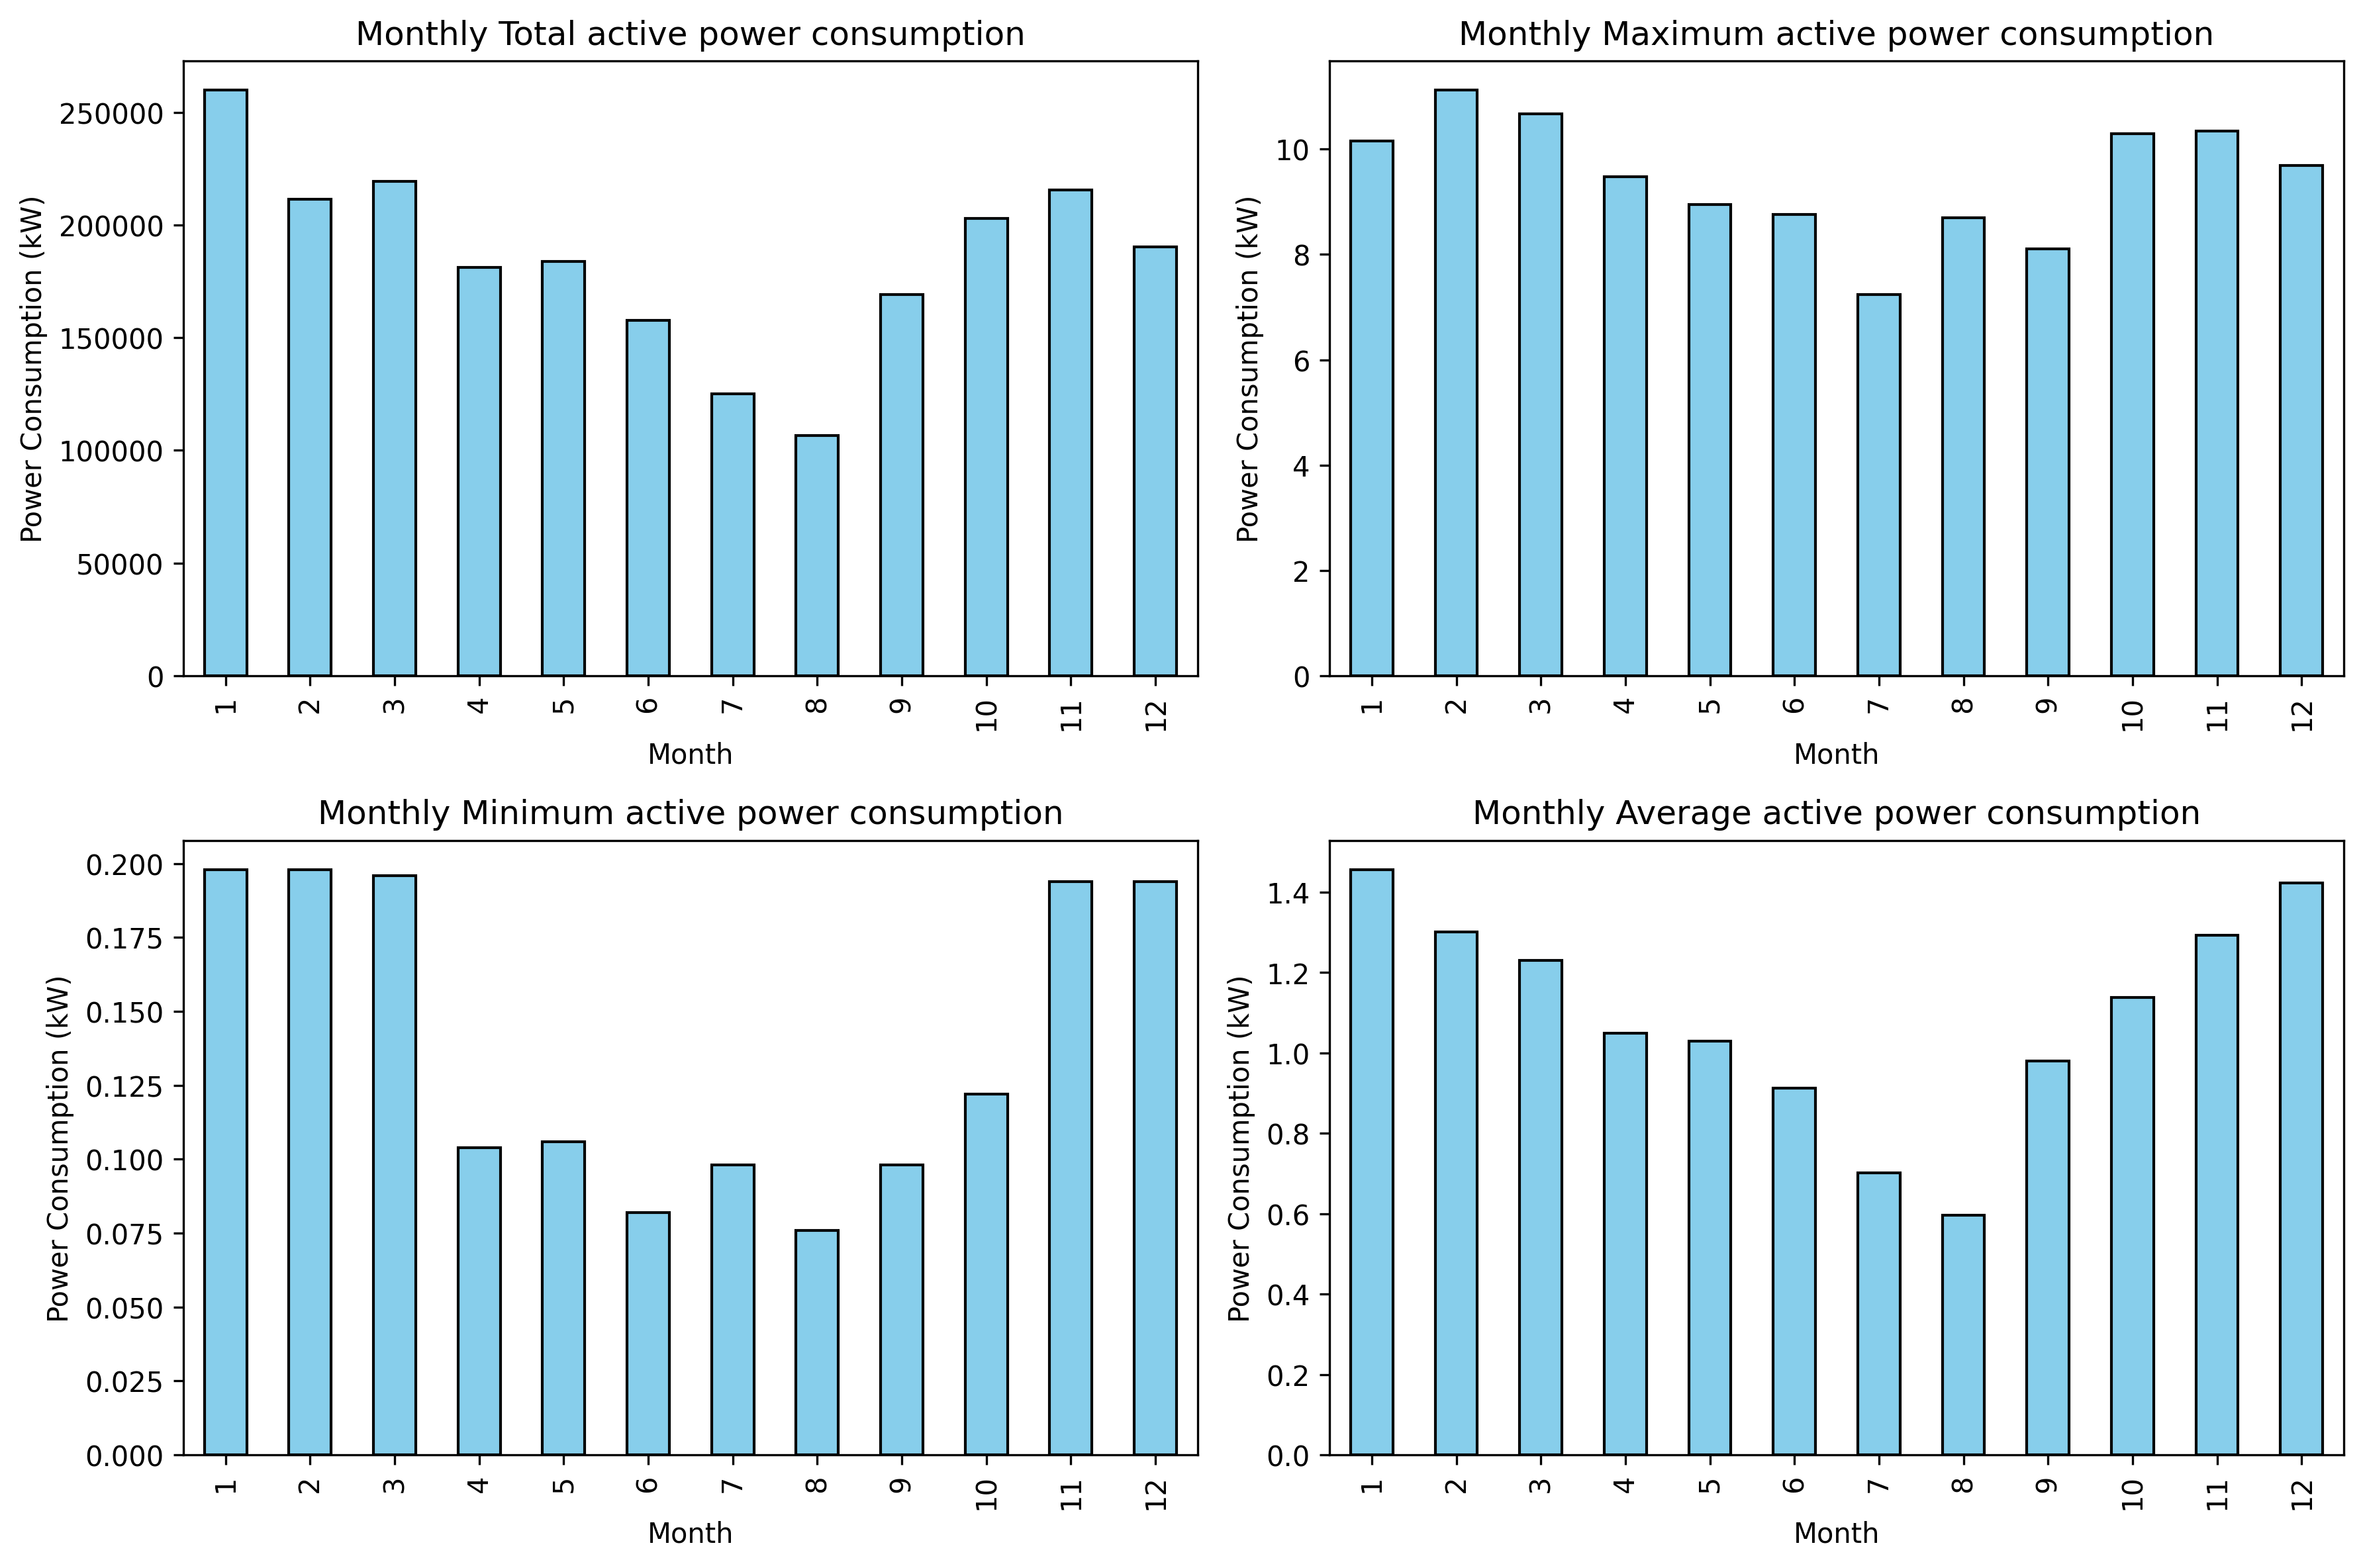

In [72]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for Monthly total active power consumption
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
df1.Global_active_power.groupby(df1.Global_active_power.index.month).sum().plot(ax=axes[0, 0], kind="bar", xlabel="Month",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Monthly Total active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.month).max().plot(ax=axes[0, 1], kind="bar", xlabel="Month",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Monthly Maximum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.month).min().plot(ax=axes[1, 0], kind="bar", xlabel="Month",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Monthly Minimum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.month).mean().plot(ax=axes[1, 1], kind="bar",
                                                                                xlabel="Month", ylabel="Power Consumption (kW)",
                                                                                title="Monthly Average active power consumption",
                                                                                color='skyblue', edgecolor='black')
plt.tight_layout()

Observation for Monthly Power Consumption (in watt hour):-
+ Total power consumption range is 8000000 - ~ 2300000 watt hour. i.e., 800 - ~2300 kWH.
+ Minumum Power consumption is done in september month across all years around 2000 WH.
+ Maximum power cosumption is done in December month across all years around ~ 61000 WH.
+ Avearge power consumption for all 12 months, range is ~7064 WH to ~ 20000 WH.

It can be seen that less power is consumed in June, July, August, September, whereas more power is consumed during December, January, February.
Power consumption starts decreasing almost after March month till August - September post which the power consumption increases gradually.

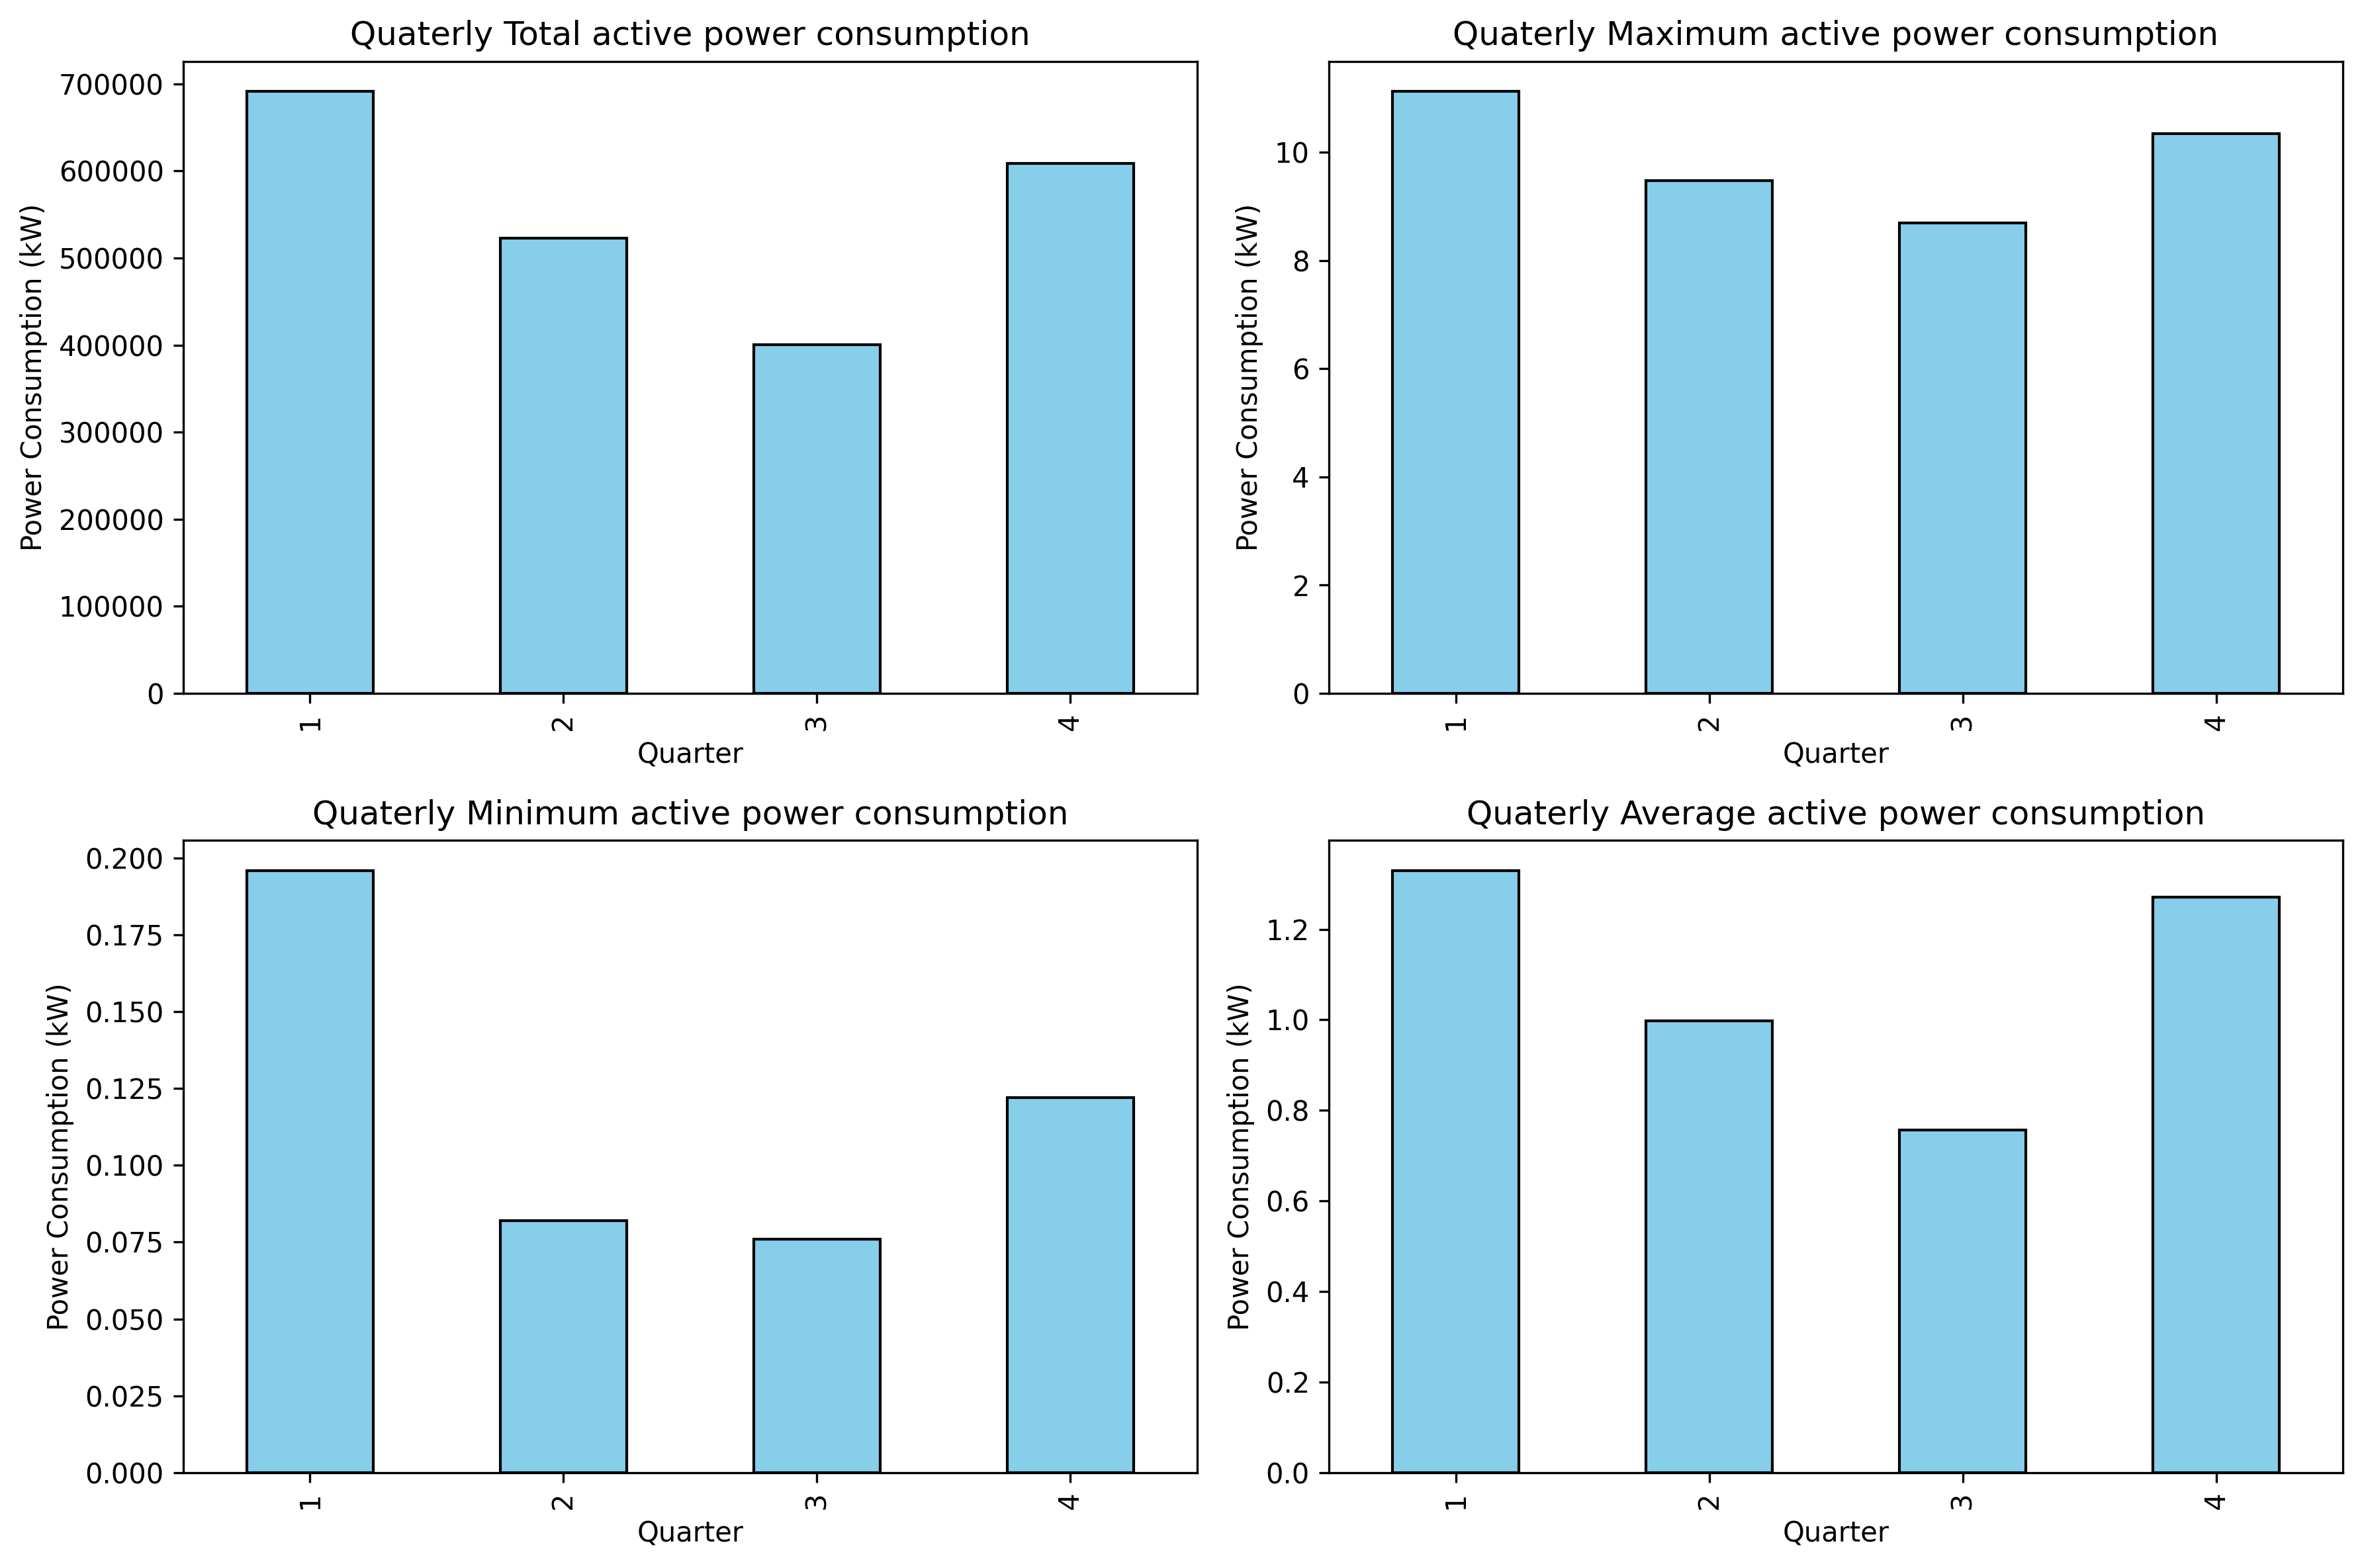

In [73]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for Quaterly total active power consumption
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
df1.Global_active_power.groupby(df1.Global_active_power.index.quarter).sum().plot(ax=axes[0, 0], kind="bar", xlabel="Quarter",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Quaterly Total active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.quarter).max().plot(ax=axes[0, 1], kind="bar", xlabel="Quarter",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Quaterly Maximum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.quarter).min().plot(ax=axes[1, 0], kind="bar", xlabel="Quarter",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Quaterly Minimum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.quarter).mean().plot(ax=axes[1, 1], kind="bar",
                                                                                xlabel="Quarter", ylabel="Power Consumption (kW)",
                                                                                title="Quaterly Average active power consumption",
                                                                                color='skyblue', edgecolor='black')
plt.tight_layout()

Observation for Quarterly Power Consumption (in watt hour):-
+ Minumum Power consumption is done in Third Quarter across all years around 2100 WH
+ Maximum power cosumption is done in Fourth Quarter across all years around ~ 6100 WH
+ Avearge power consumption for Second and third Quarter is comparatively less than First and fourth Quarter, which proves our above observation.

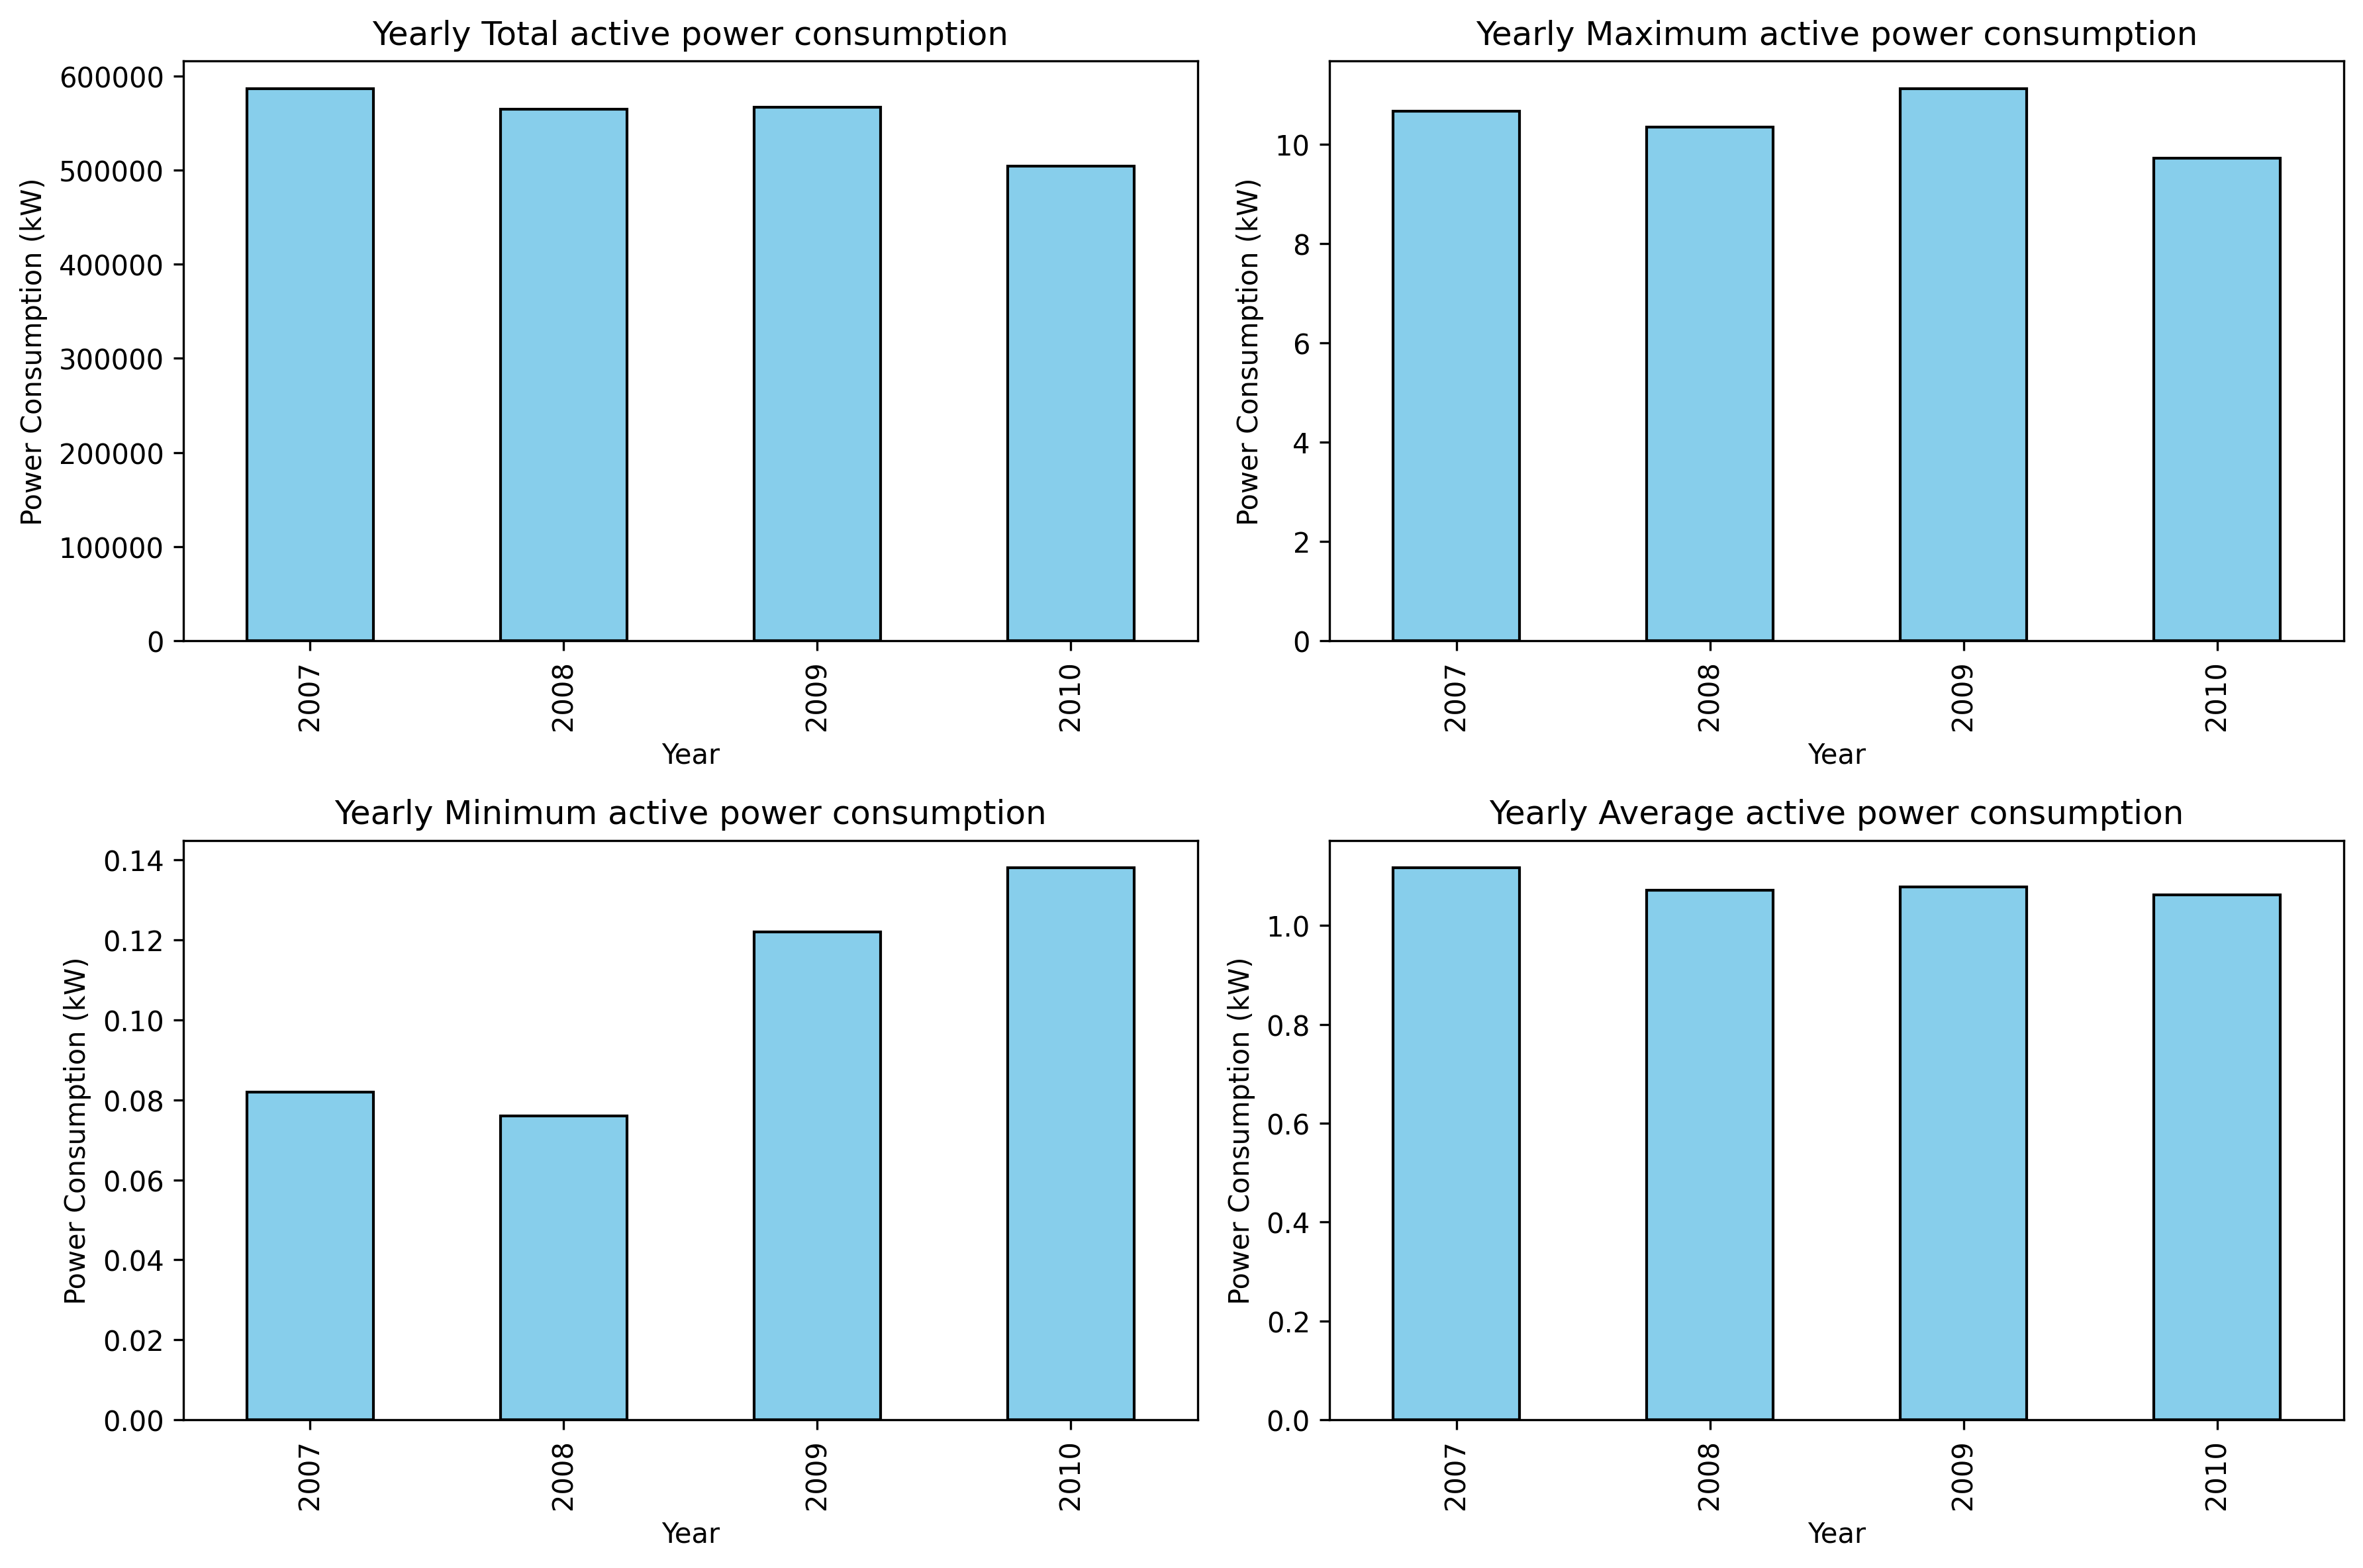

In [74]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for Yearly total active power consumption
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
df1.Global_active_power.groupby(df1.Global_active_power.index.year).sum().plot(ax=axes[0, 0], kind="bar", xlabel="Year",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Yearly Total active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.year).max().plot(ax=axes[0, 1], kind="bar", xlabel="Year",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Yearly Maximum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.year).min().plot(ax=axes[1, 0], kind="bar", xlabel="Year",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Yearly Minimum active power consumption",
                                                                               color='skyblue', edgecolor='black')
df1.Global_active_power.groupby(df1.Global_active_power.index.year).mean().plot(ax=axes[1, 1], kind="bar",
                                                                                xlabel="Year", ylabel="Power Consumption (kW)",
                                                                                title="Yearly Average active power consumption",
                                                                                color='skyblue', edgecolor='black')
plt.tight_layout()

Observation for Yearly Power Consumption (in watt hour)
(Ignoring 2006 year):-

+ Total power consumption range is 4000000 - ~5500000 watt hour. i.e., 4000 - ~5500 kWH.
+ Maximum Power consumption was done in year 2007.
+ Minimum power cosumption was done in year 2010.
+ Avearge power consumption is almost same across all years, range is ~12000 WH to ~ 14000 WH.

## Visualize the Sub_metering using bar chart
Four types of aggregation (Sum, Max, Min, Mean) each for Daily, Weekly, Monthly, Quarterly and Yearly Aanalysis

In [75]:
# Creating sub-dataframe of sub-metering 1, sub-metering 2, sub-metering 3 (measured in watt-hour)
df1_sub_meterings = df1[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]

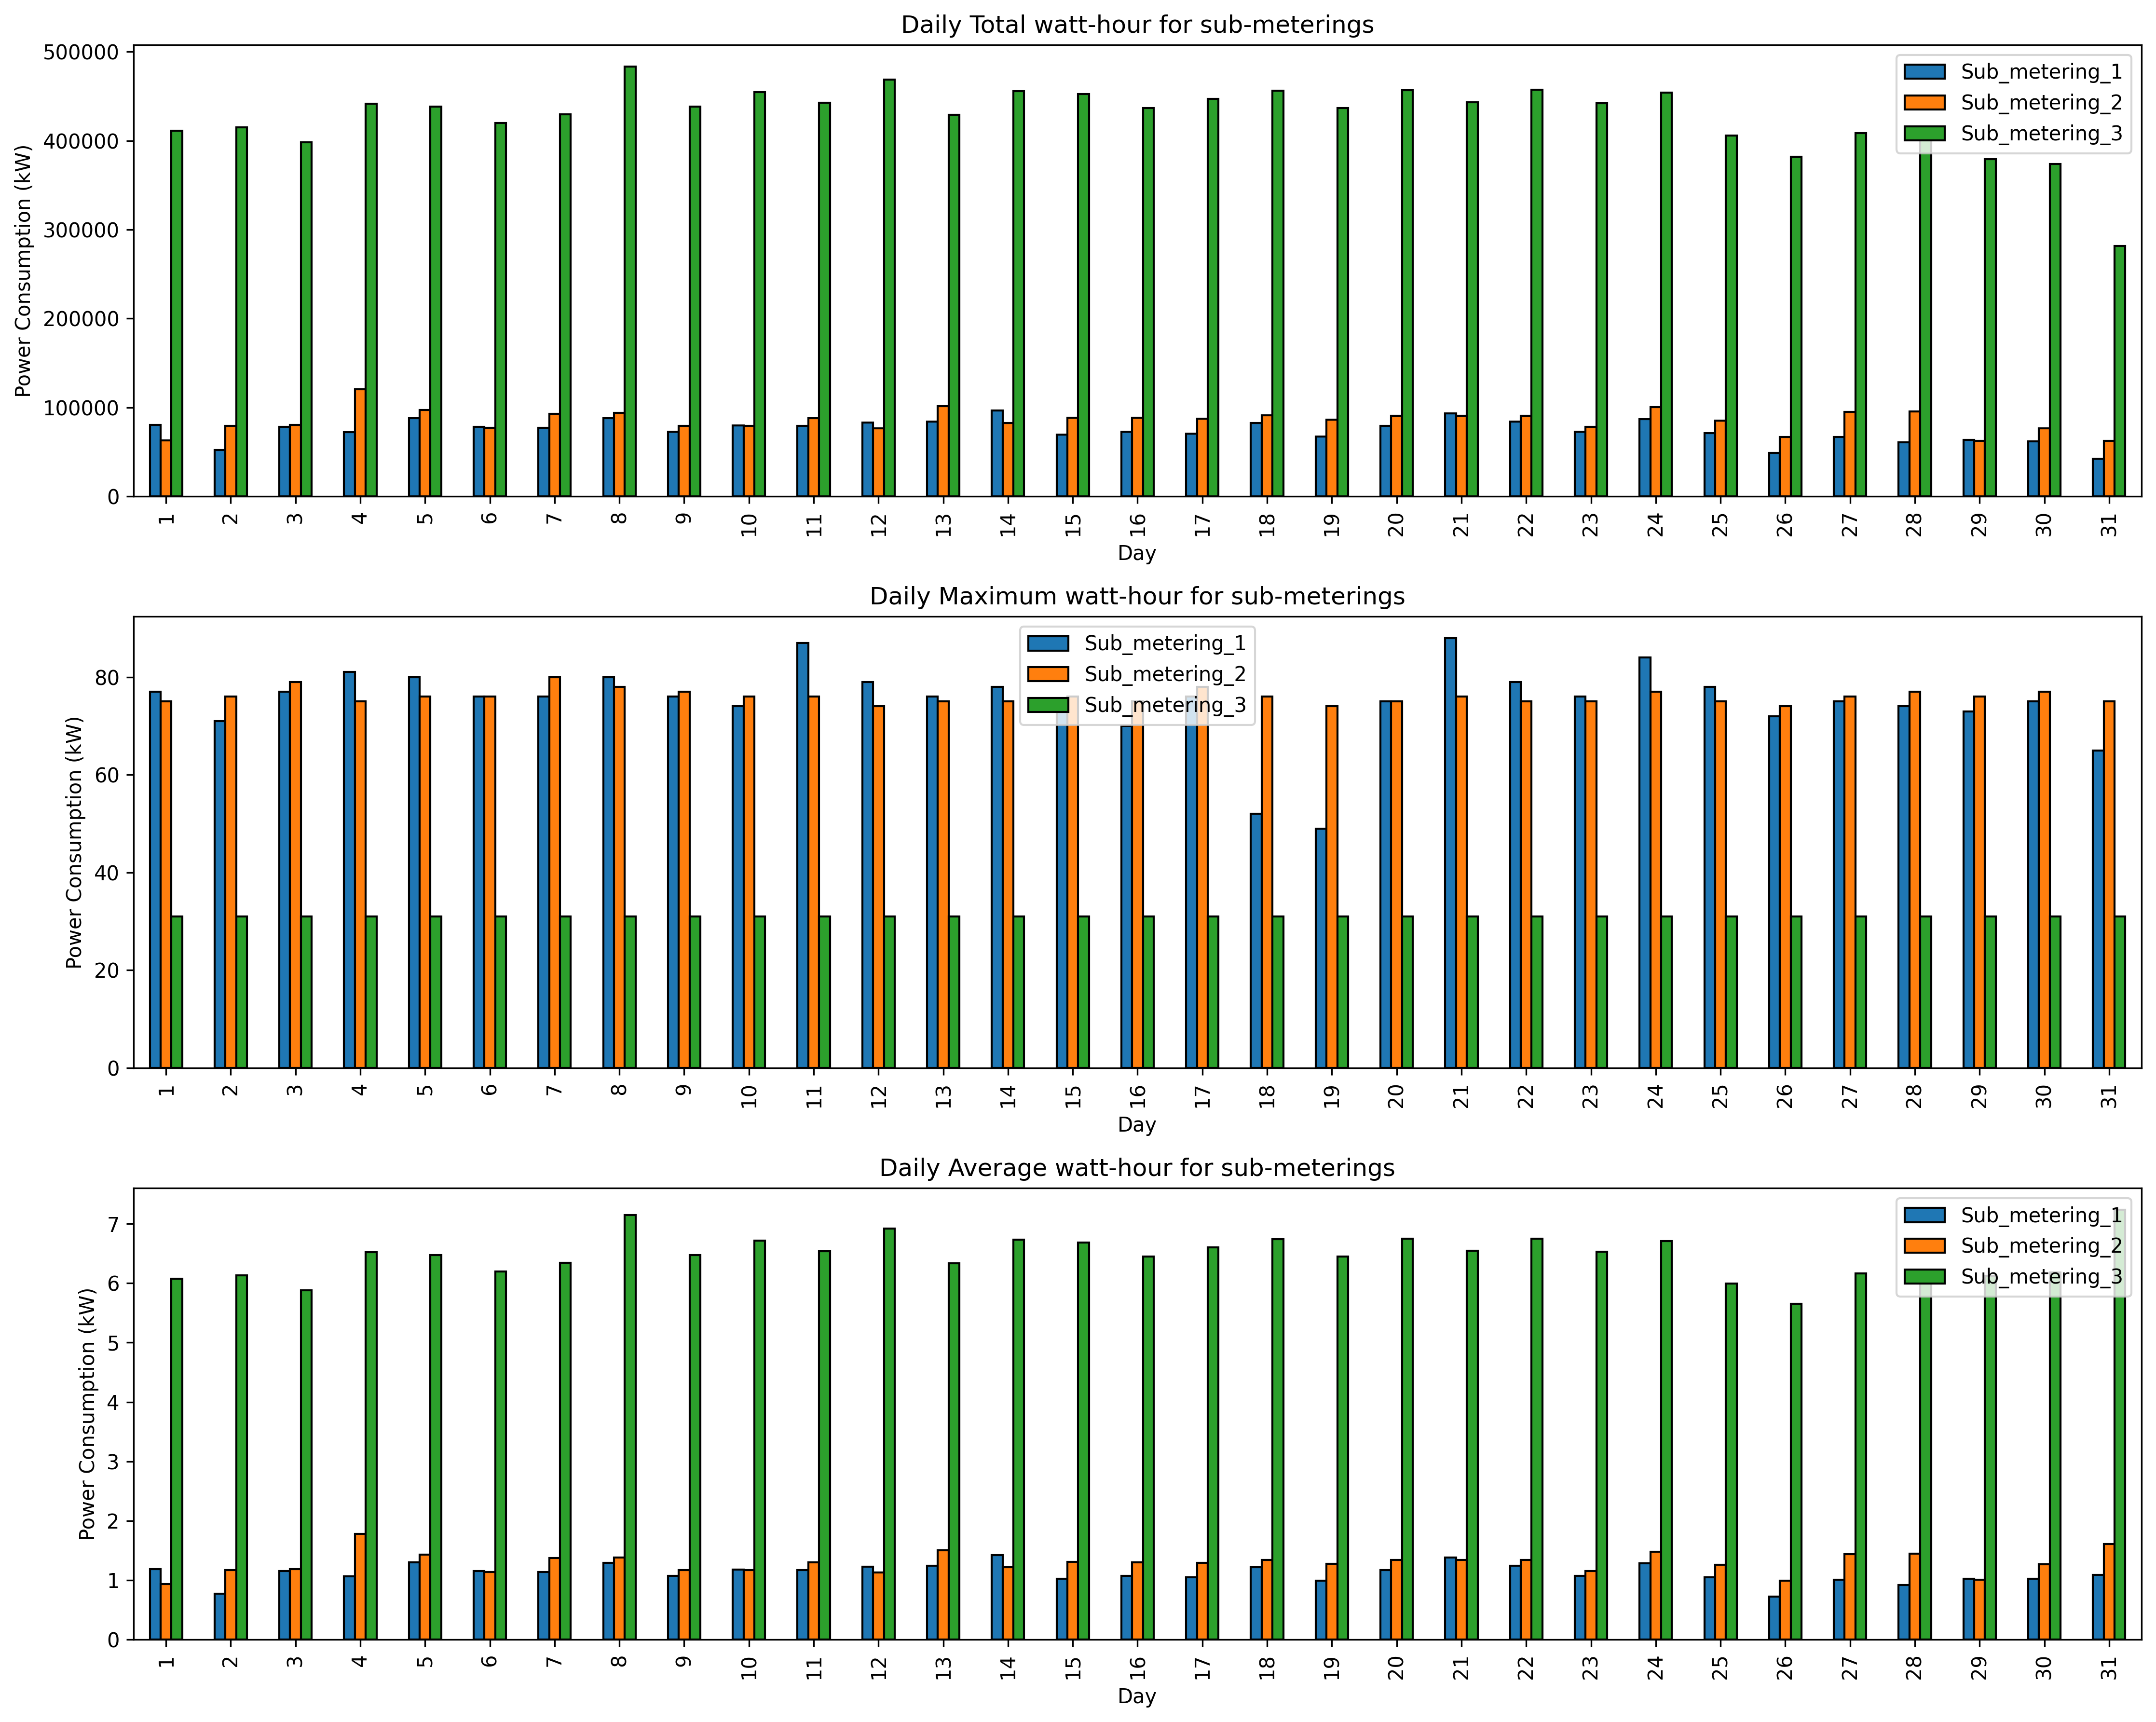

In [76]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for daily total active power consumption
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), dpi=300)
df1_sub_meterings.groupby(df1_sub_meterings.index.day).sum().plot(ax=axes[0], kind="bar", xlabel="Day",
                                                                  ylabel="Power Consumption (kW)",
                                                                  title="Daily Total watt-hour for sub-meterings",
                                                                  edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.day).max().plot(ax=axes[1], kind="bar", xlabel="Day",
                                                                  ylabel="Power Consumption (kW)",
                                                                  title="Daily Maximum watt-hour for sub-meterings",
                                                                  edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.day).mean().plot(ax=axes[2], kind="bar", xlabel="Day",
                                                                   ylabel="Power Consumption (kW)",
                                                                   title="Daily Average watt-hour for sub-meterings",
                                                                   edgecolor='black')
plt.tight_layout()

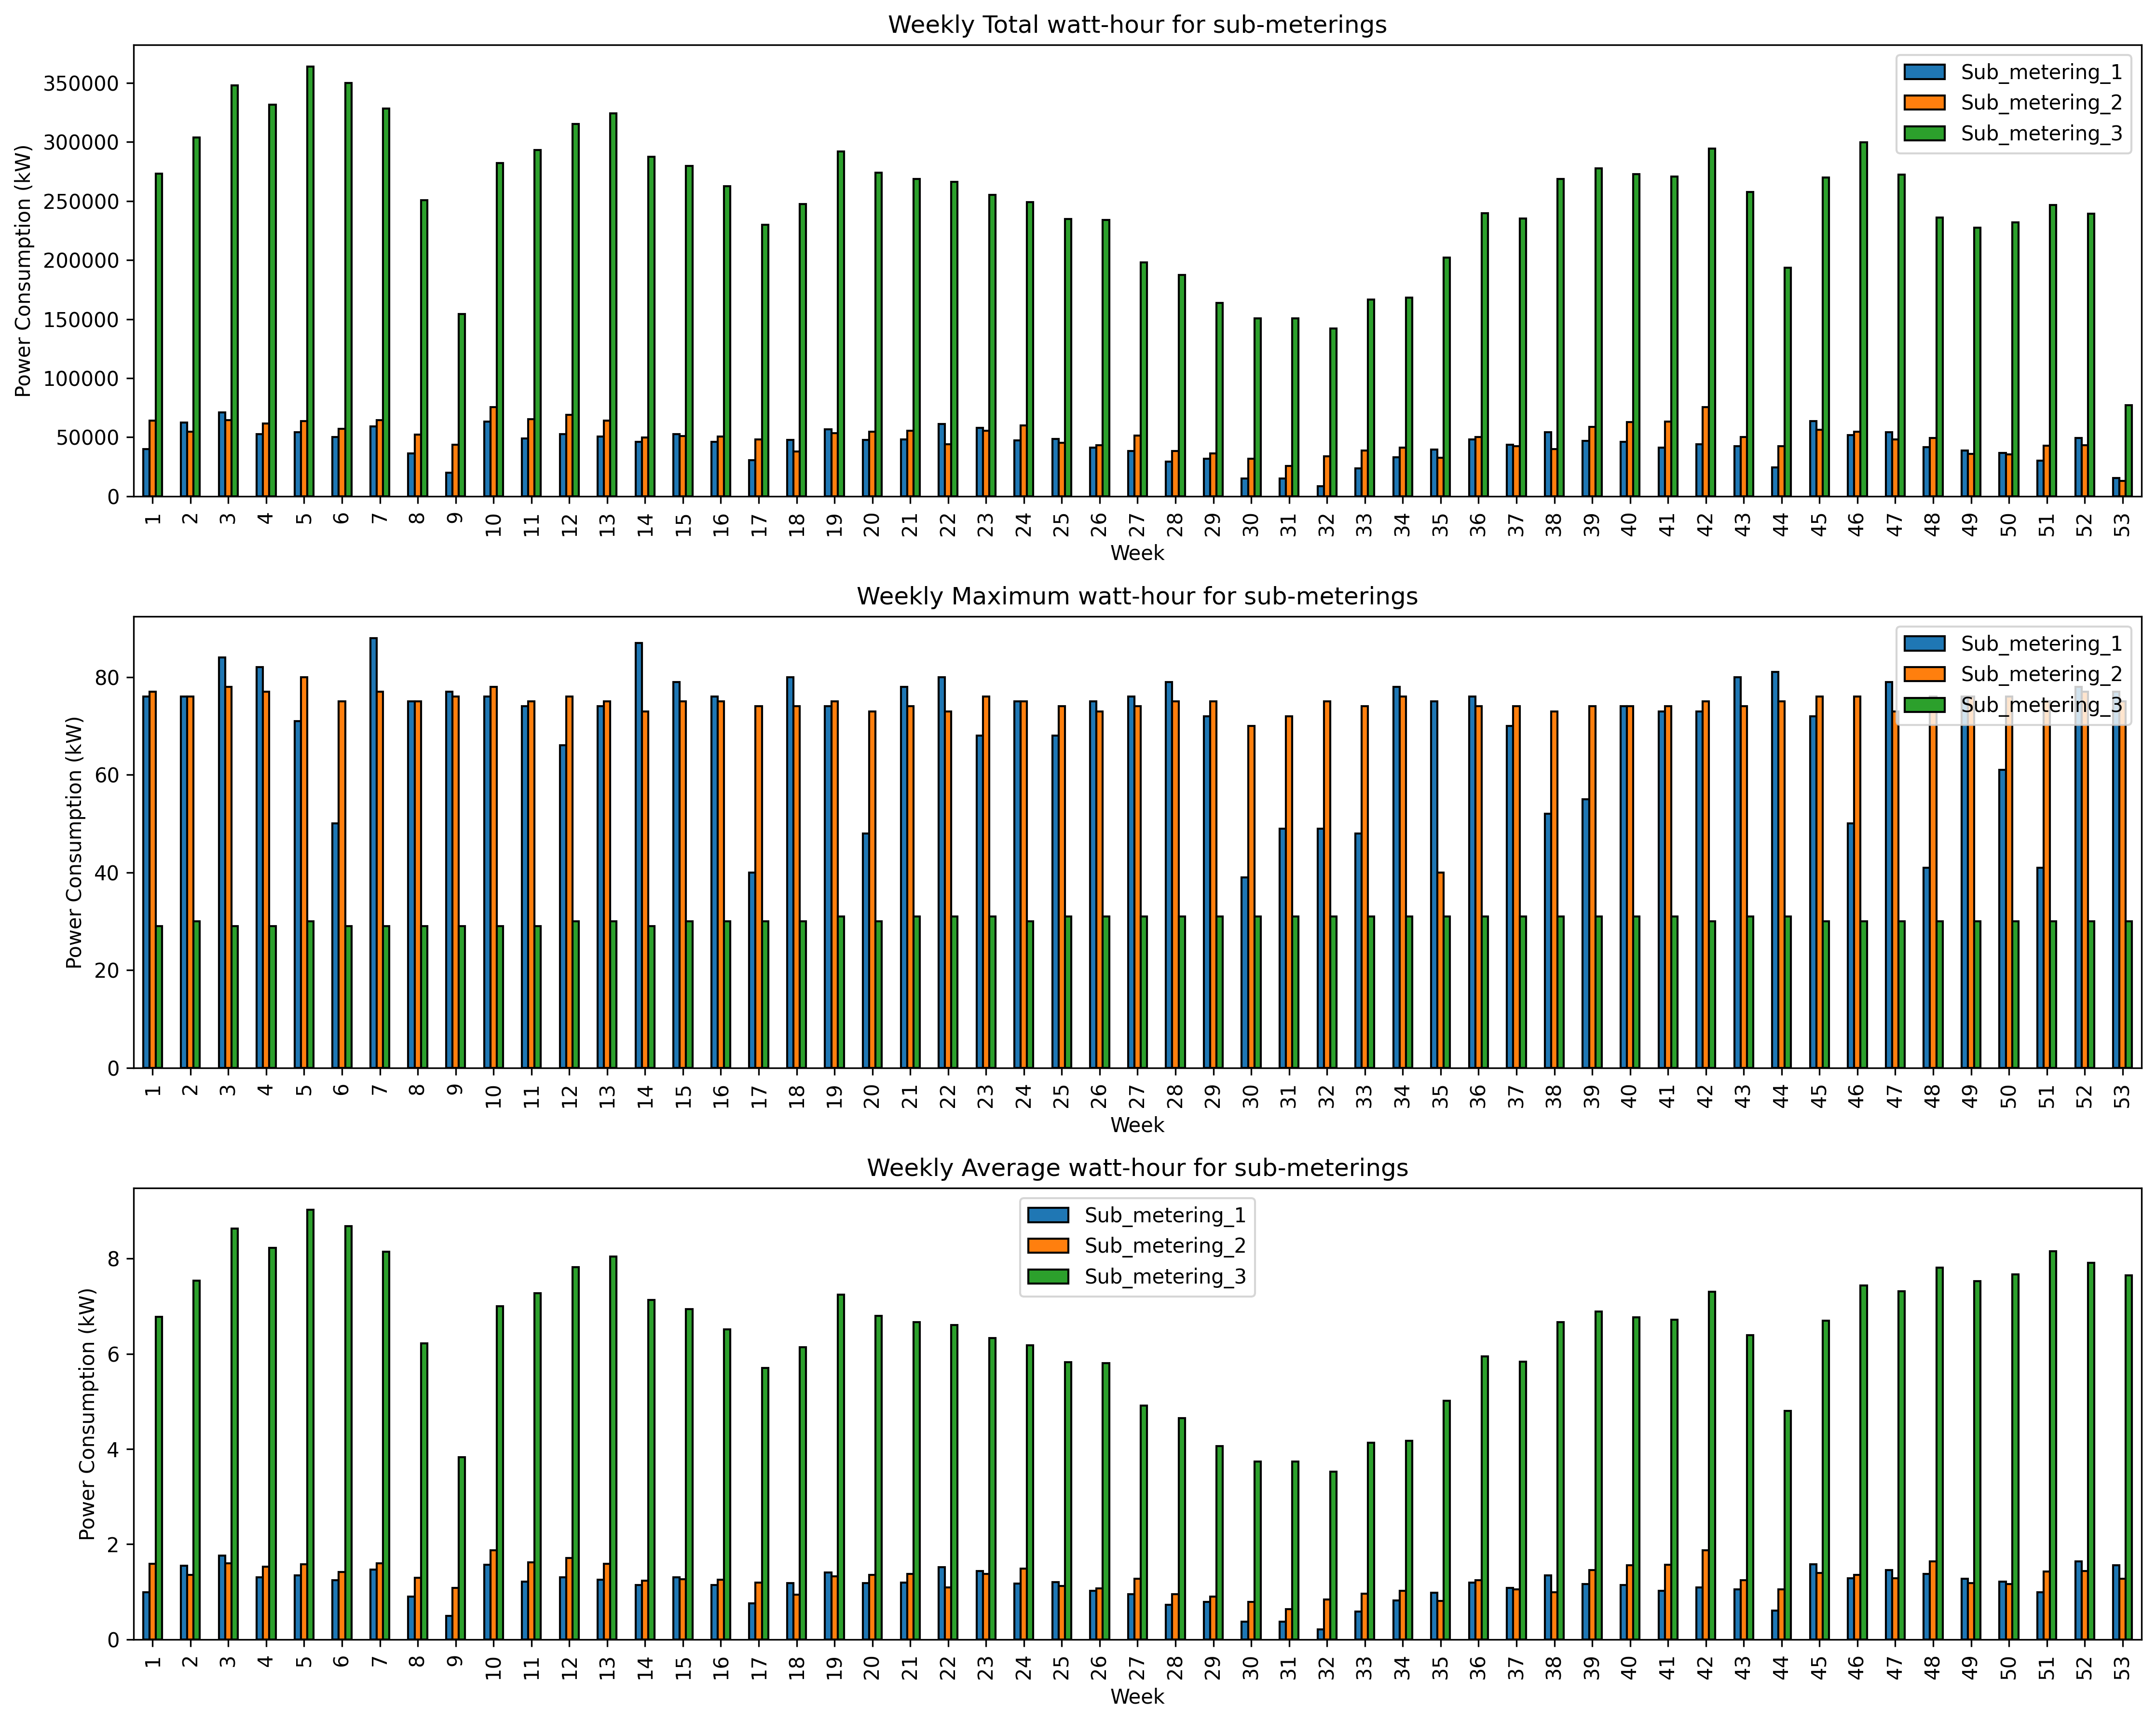

In [77]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for weekly total active power consumption
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), dpi=300)
df1_sub_meterings.groupby(df1_sub_meterings.index.isocalendar().week).sum().plot(ax=axes[0], kind="bar", xlabel="Week",
                                                                                 ylabel="Power Consumption (kW)",
                                                                                 title="Weekly Total watt-hour for sub-meterings",
                                                                                 edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.isocalendar().week).max().plot(ax=axes[1], kind="bar", xlabel="Week",
                                                                                 ylabel="Power Consumption (kW)",
                                                                                 title="Weekly Maximum watt-hour for sub-meterings",
                                                                                 edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.isocalendar().week).mean().plot(ax=axes[2], kind="bar", xlabel="Week",
                                                                                  ylabel="Power Consumption (kW)",
                                                                                  title="Weekly Average watt-hour for sub-meterings",
                                                                                  edgecolor='black')
plt.tight_layout()

Observation for Weekly Sub-Meterings: 1,2,3 (in watt hour):-
+ Consumption of energy for all submetering on average remains high in almost all weeks except weeks betwwen 28th to 33rd.

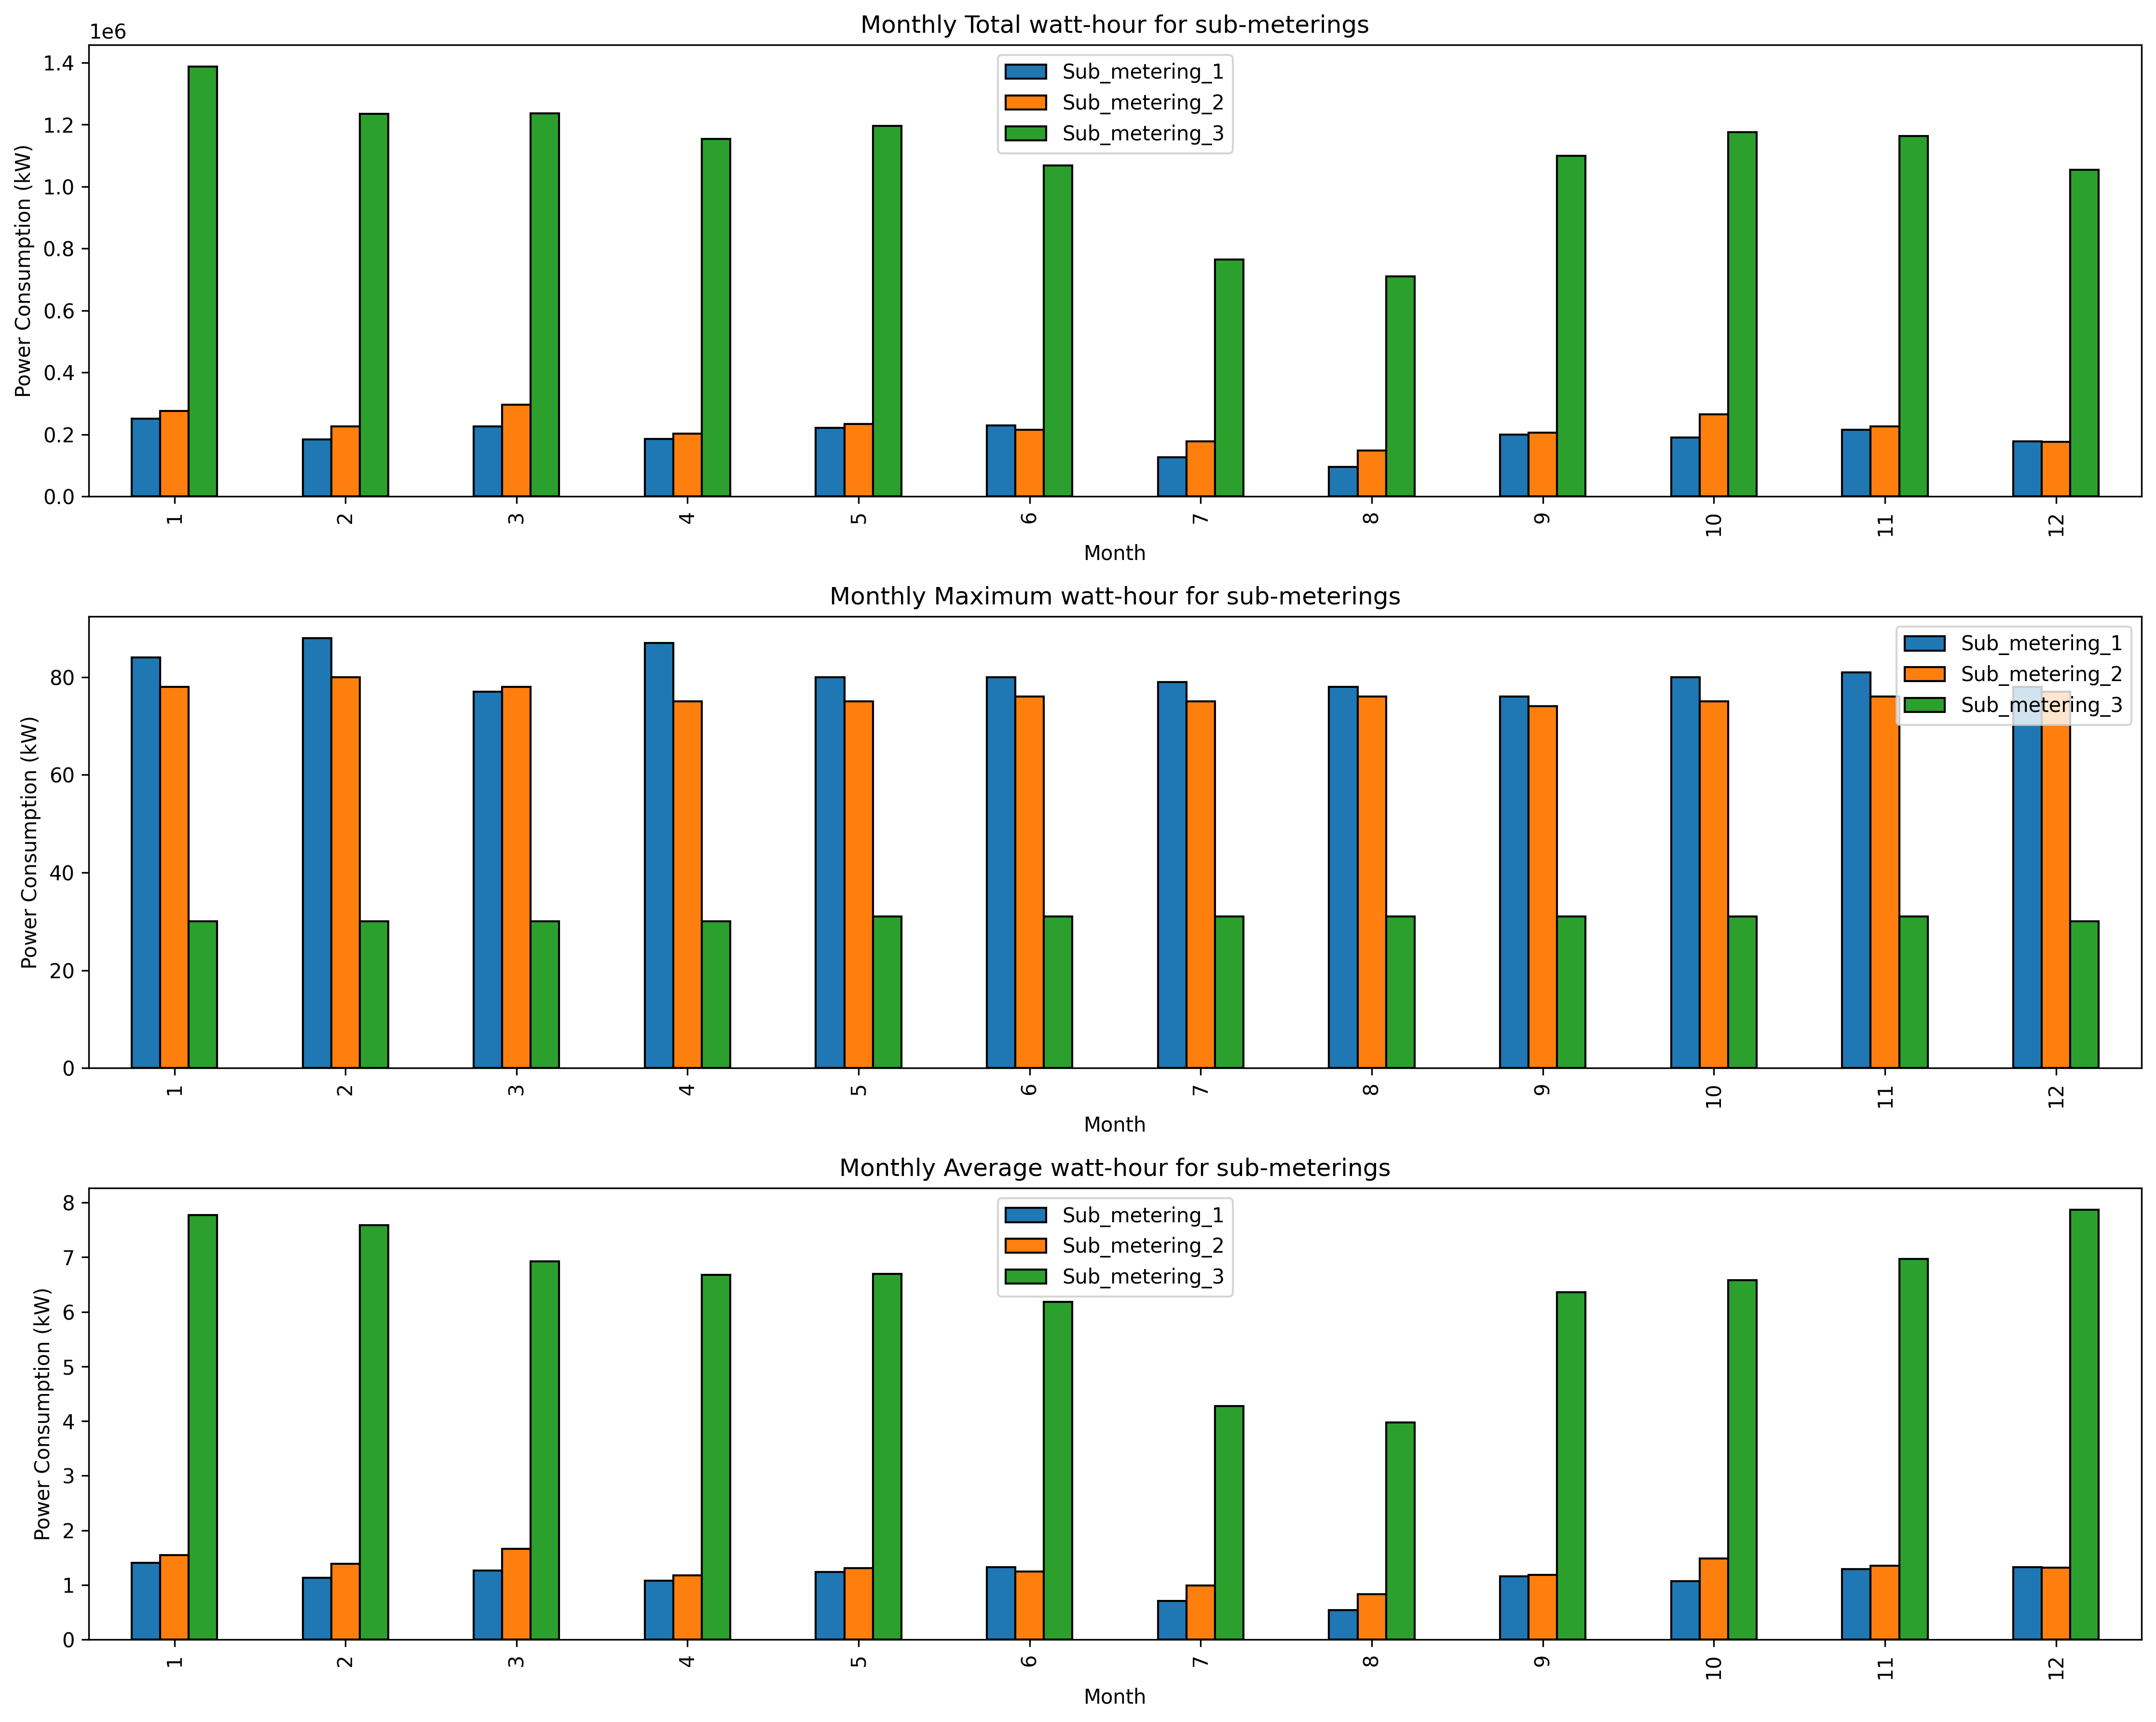

In [78]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for monthly total active power consumption
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), dpi=300)
df1_sub_meterings.groupby(df1_sub_meterings.index.month).sum().plot(ax=axes[0], kind="bar", xlabel="Month",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Monthly Total watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.month).max().plot(ax=axes[1], kind="bar", xlabel="Month",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Monthly Maximum watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.month).mean().plot(ax=axes[2], kind="bar",
                                                                                xlabel="Month", ylabel="Power Consumption (kW)",
                                                                                title="Monthly Average watt-hour for sub-meterings",
                                                                                edgecolor='black')
plt.tight_layout()

Observation for Monthly Sub-Meterings: 1,2,3 (in watt hour):-
+ Consumption of sub-metering 3 enerygy is comparatively low in july and august month.
+ Sub-metering 1 and 2 consumes almost same amount of energy on average as compared to submetering 3...it increases from around september till january february month.

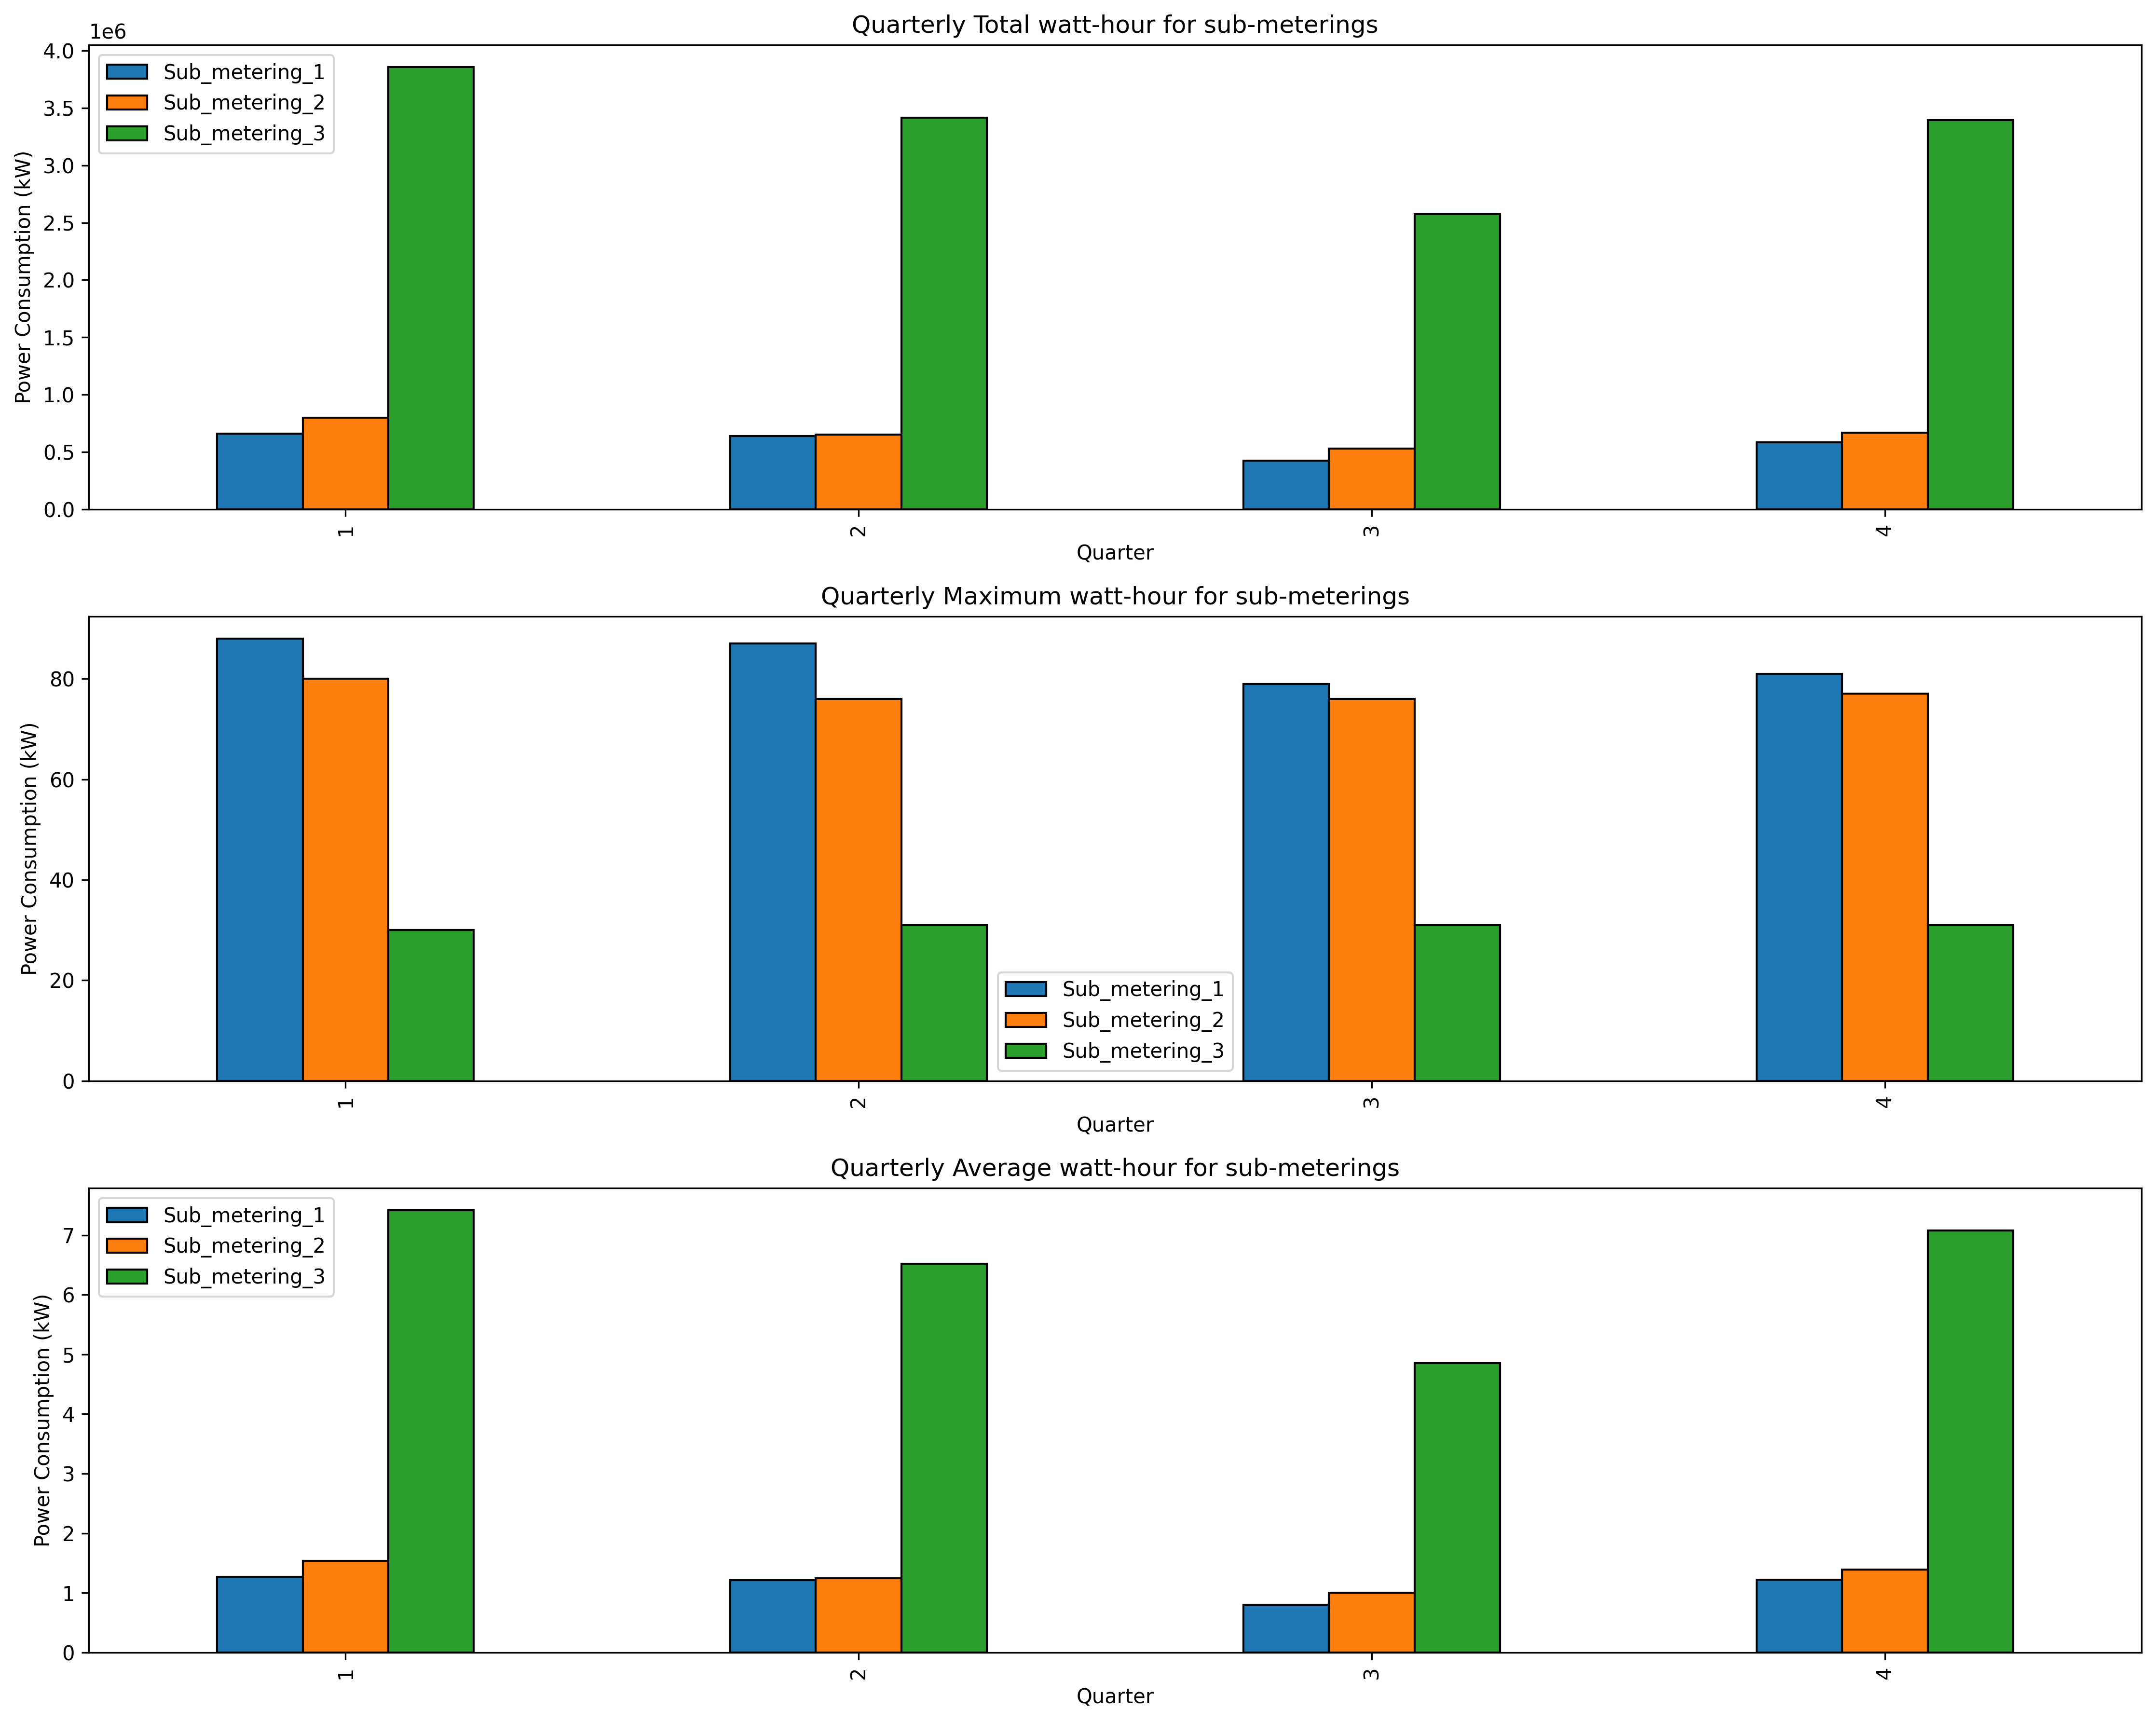

In [79]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for quarterly total active power consumption
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), dpi=300)
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).sum().plot(ax=axes[0], kind="bar", xlabel="Quarter",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Quarterly Total watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).max().plot(ax=axes[1], kind="bar", xlabel="Quarter",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Quarterly Maximum watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).mean().plot(ax=axes[2], kind="bar",
                                                                                xlabel="Quarter", ylabel="Power Consumption (kW)",
                                                                                title="Quarterly Average watt-hour for sub-meterings",
                                                                                edgecolor='black')
plt.tight_layout()

Observation for Quarterly Sub-Meterings: 1,2,3 (in watt hour):-
+ Consumption of submetering 1 and 2 is almost same in Second Quarter, whereas submetering 3 consumes less energy in 2nd and 3rd quarter as compared to 1st and 4th quarter.
+ Average consumption of submetering 1,2 and 3 is almost same in quarter 1st and 4th quarter.

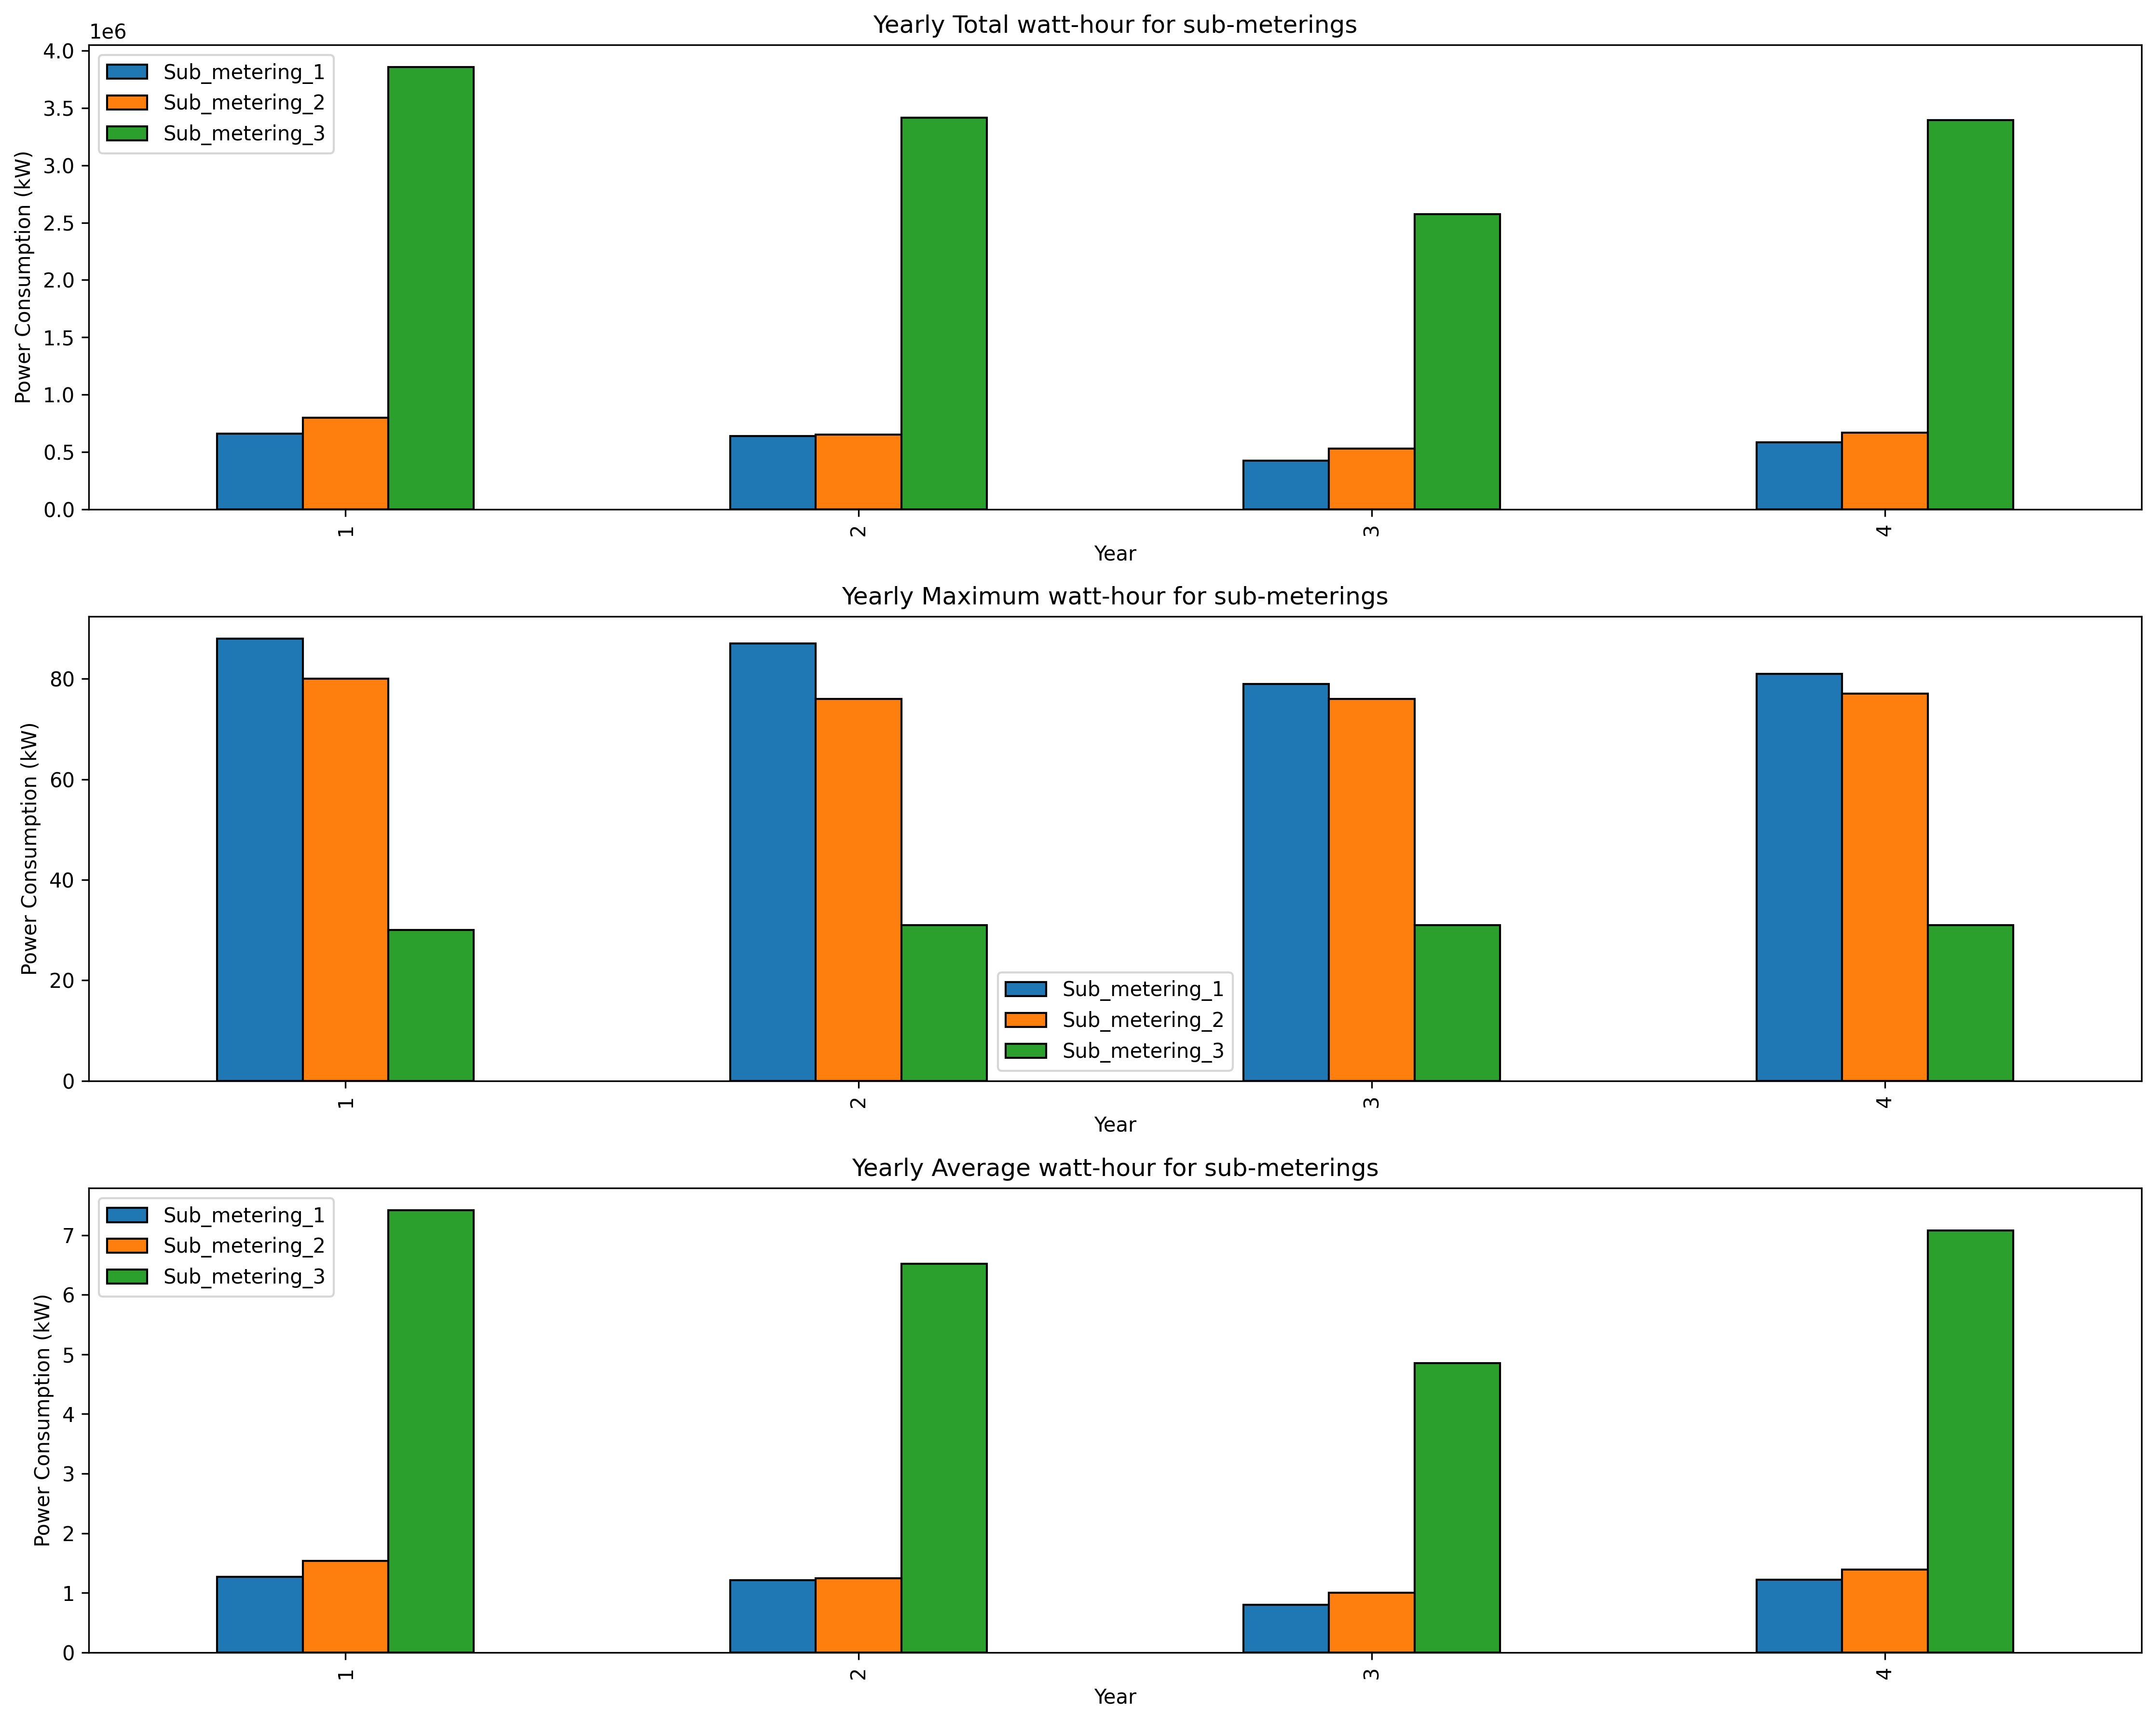

In [80]:
# Plot Four types of aggregation (Sum, Max, Min, Mean) for yearly total active power consumption
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), dpi=300)
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).sum().plot(ax=axes[0], kind="bar", xlabel="Year",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Yearly Total watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).max().plot(ax=axes[1], kind="bar", xlabel="Year",
                                                                               ylabel="Power Consumption (kW)",
                                                                               title="Yearly Maximum watt-hour for sub-meterings",
                                                                               edgecolor='black')
df1_sub_meterings.groupby(df1_sub_meterings.index.quarter).mean().plot(ax=axes[2], kind="bar",
                                                                                xlabel="Year", ylabel="Power Consumption (kW)",
                                                                                title="Yearly Average watt-hour for sub-meterings",
                                                                                edgecolor='black')
plt.tight_layout()

Observation for Yearly Sub-Meterings: 1,2,3 (in watt hour)
(Ignoring year 2006):-
+ Maximum enerygy is taken by submetering 3 in all years followed by submetering 2 and then submetering 3.
+ consumption of energy is increasing every year by submetering 3 (comprises of AC and water heater).
+ After submetering 3, it is followed by submetering 2 (comprises of laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.), followed by submetering 1 (comprises of kitchen, containing mainly a dishwasher, an oven and a microwave).

Reasons could be understood for sub metering 3 might be increasing Global Warming, increased humidity or so, families with more percentage of teenagers, youth or toddlers at home makes submetering 2 to consume energy, for sub-metring 1 not more families might be having kitchen applicances working on electricity.